# This notebook contains the code to reproduce the main figures of the manuscript titled "_Blood RNA Signatures Predict Recent Tuberculosis Exposure in Mice, Macaques and Humans_"

Only Ingenuity Pathway Analysis for Figure 4E is excluded (commercial software)

It is recommended that jupyter extensions are used to allow easy display and review of the code:
    - https://github.com/ipython-contrib/jupyter_contrib_nbextensions
    
All code was run with access to a 128 GB RAM machine with 48 CPU cores. This amount of memory and CPU-cores is not necessary for all calculations, but may be necessary to some of the calls to the caret package (machine learning hyperparameter searches).
    

There are very small differences in p-values between Figures 2-3 herein compared to the original analysis reported in the paper, due the absence of setting a random seed before several random hyperparameter searches on training sets. The ultimate results are insensitive to these very small differences in random parameter settings.

In [1]:
path="."  # this is the TB repository folder

In [7]:
# These options can be adjusted as desired for best viewing of each of the figures within the notebook
options(repr.plot.width=4, repr.plot.height=3)

## The following code shows the software packages installed in the environment used to produce the analyses of the paper. In each section of the analysis, code is provided for installing needed R dependencies

### R environment (R 3.4.3)

In [44]:
ipacks = installed.packages()
ipacks

# To access a specific package's version info:
ipacks["pROC",]

Package       LibPath                                      
acepack       acepack       /master/rault/anaconda3/envs/TB/lib/R/library
akima         akima         /master/rault/anaconda3/envs/TB/lib/R/library
annotate      annotate      /master/rault/anaconda3/envs/TB/lib/R/library
AnnotationDbi AnnotationDbi /master/rault/anaconda3/envs/TB/lib/R/library
assertthat    assertthat    /master/rault/anaconda3/envs/TB/lib/R/library
backports     backports     /master/rault/anaconda3/envs/TB/lib/R/library
base          base          /master/rault/anaconda3/envs/TB/lib/R/library
base64        base64        /master/rault/anaconda3/envs/TB/lib/R/library
base64enc     base64enc     /master/rault/anaconda3/envs/TB/lib/R/library
BH            BH            /master/rault/anaconda3/envs/TB/lib/R/library
BiasedUrn     BiasedUrn     /master/rault/anaconda3/envs/TB/lib/R/library
bindr         bindr         /master/rault/anaconda3/envs/TB/lib/R/library
bindrcpp      bindrcpp      /master/rault/anaconda3/envs/TB/lib/R/library
Biobase       Biobase       /master/rault/anaconda3/envs/TB/lib/R/library
BiocGenerics  BiocGenerics  /master/rault/anaconda3/envs/TB/lib/R/library
BiocInstaller BiocInstaller /master/rault/anaconda3/envs/TB/lib/R/library
BiocParallel  BiocParallel  /master/rault/anaconda3/envs/TB/lib/R/library
biomaRt       biomaRt       /master/rault/anaconda3/envs/TB/lib/R/library
bit           bit           /master/rault/anaconda3/envs/TB/lib/R/library
bit64         bit64         /master/rault/anaconda3/envs/TB/lib/R/library
bitops        bitops        /master/rault/anaconda3/envs/TB/lib/R/library
blob          blob          /master/rault/anaconda3/envs/TB/lib/R/library
bmp           bmp           /master/rault/anaconda3/envs/TB/lib/R/library
boot          boot          /master/rault/anaconda3/envs/TB/lib/R/library
brew          brew          /master/rault/anaconda3/envs/TB/lib/R/library
broom         broom         /master/rault/anaconda3/envs/TB/lib/R/library
Cairo         Cairo         /master/rault/anaconda3/envs/TB/lib/R/library
callr         callr         /master/rault/anaconda3/envs/TB/lib/R/library
caret         caret         /master/rault/anaconda3/envs/TB/lib/R/library
caTools       caTools       /master/rault/anaconda3/envs/TB/lib/R/library
⋮             ⋮             ⋮                                            
tcltk         tcltk         /master/rault/anaconda3/envs/TB/lib/R/library
tensorflow    tensorflow    /master/rault/anaconda3/envs/TB/lib/R/library
testthat      testthat      /master/rault/anaconda3/envs/TB/lib/R/library
tfruns        tfruns        /master/rault/anaconda3/envs/TB/lib/R/library
tibble        tibble        /master/rault/anaconda3/envs/TB/lib/R/library
tidyr         tidyr         /master/rault/anaconda3/envs/TB/lib/R/library
tidyselect    tidyselect    /master/rault/anaconda3/envs/TB/lib/R/library
tidyverse     tidyverse     /master/rault/anaconda3/envs/TB/lib/R/library
timeDate      timeDate      /master/rault/anaconda3/envs/TB/lib/R/library
tools         tools         /master/rault/anaconda3/envs/TB/lib/R/library
TTR           TTR           /master/rault/anaconda3/envs/TB/lib/R/library
utf8          utf8          /master/rault/anaconda3/envs/TB/lib/R/library
utils         utils         /master/rault/anaconda3/envs/TB/lib/R/library
uuid          uuid          /master/rault/anaconda3/envs/TB/lib/R/library
vcd           vcd           /master/rault/anaconda3/envs/TB/lib/R/library
verification  verification  /master/rault/anaconda3/envs/TB/lib/R/library
viridis       viridis       /master/rault/anaconda3/envs/TB/lib/R/library
viridisLite   viridisLite   /master/rault/anaconda3/envs/TB/lib/R/library
visNetwork    visNetwork    /master/rault/anaconda3/envs/TB/lib/R/library
whisker       whisker       /master/rault/anaconda3/envs/TB/lib/R/library
withr         withr         /master/rault/anaconda3/envs/TB/lib/R/library
xgboost       xgboost       /master/rault/anaconda3/envs/TB/lib/R/library
XML           XML 

Package 
                                                                  "pROC" 
                                                                 LibPath 
                         "/master/rault/anaconda3/envs/TB/lib/R/library" 
                                                                 Version 
                                                                "1.12.0" 
                                                                Priority 
                                                                      NA 
                                                                 Depends 
                                                           "R (>= 2.14)" 
                                                                 Imports 
                      "plyr, utils, methods, Rcpp (>= 0.11.1), ggplot2," 
                                                               LinkingTo 
                                                                  "Rcpp" 
                                                                Suggests 
"microbenchmark, tcltk, MASS, logcondens, doParallel,\ntestthat, vdiffr" 
                                                                Enhances 
                                                                      NA 
                                                                 License 
                                                            "GPL (>= 3)" 
                                                         License_is_FOSS 
                                                                      NA 
                                                   License_restricts_use 
                                                                      NA 
                                                                 OS_type 
                                                                      NA 
                                                                  MD5sum 
                                                                      NA 
                                                        NeedsCompilation 
                                                                   "yes" 
                                                                   Built 
                                                                 "3.4.3"

In [45]:
print(ipacks)

                      Package                
acepack               "acepack"              
akima                 "akima"                
annotate              "annotate"             
AnnotationDbi         "AnnotationDbi"        
assertthat            "assertthat"           
backports             "backports"            
base                  "base"                 
base64                "base64"               
base64enc             "base64enc"            
BH                    "BH"                   
BiasedUrn             "BiasedUrn"            
bindr                 "bindr"                
bindrcpp              "bindrcpp"             
Biobase               "Biobase"              
BiocGenerics          "BiocGenerics"         
BiocInstaller         "BiocInstaller"        
BiocParallel          "BiocParallel"         
biomaRt               "biomaRt"              
bit                   "bit"                  
bit64                 "bit64"                
bitops                "bitops"    

### Conda environment (for both python and R packages)
 - Most of the python packages are not needed for this paper's analyses
 - The conda environment (including both python and R packages) is described in the env_list.txt and environment.yml files

## Figure 1 Mouse Analysis

- This code reproduces the analysis of Figure 1, showing that "Blood genome-wide RNA expression accurately discriminates early vs. late M.tb infection time periods in C57BL/6 mice"

    - For review, this code requires reviewer access for the accession number of this paper. To reproduce this analysis with these data, please download the SOFT file for the full family data from the accession page (Scope: Family; Format: SOFT; Amount: Full; GEO accession: GSE124688; click "GO") using the Reviewer access token.

    - Place this SOFT file in the data/GSE124688 folder and rename it "GSE124688_family.soft"

### Load Libraries

In [3]:
if (!require("preprocessCore")) {
  source("https://bioconductor.org/biocLite.R")
  biocLite("preprocessCore")
  library("preprocessCore")
}

source("https://bioconductor.org/biocLite.R")
if (!require("Biobase")) {
  biocLite("Biobase")
  library("Biobase")
}

if (!require("biomaRt")) {
  biocLite("biomaRt")
  library("biomaRt")
}

if (!require("GEOquery")) {
  biocLite("GEOquery")
  library("GEOquery")
}

if (!require("ggplot2")) {
  install.packages("ggplot2")
  library("ggplot2")
}

if (!require("randomForest")) {
  install.packages("randomForest")
  library("randomForest")
}

if (!require("cowplot")) {
  install.packages("cowplot")
  library("cowplot")
}

if (!require("pROC")) {
    # pROC 1.12.0 is required, and may not be the default installation:
    packageUrl<- "https://cran.r-project.org/src/contrib/Archive/pROC/pROC_1.12.0.tar.gz"
    install.packages(packageUrl, repos=NULL, type='source')
    library("pROC")
}

Loading required package: preprocessCore
Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, 

### Load and preprocess the data

In [4]:
# In case this variable was not defined above, please do so here.
path="."  # this is the TB repository folder

In [5]:
source("utils_submission.R")

mouse.path = paste(path, "/data/GSE124688", sep="")
soft.mouse.file.name = "GSE124688_family.soft"
mouse.soft = getGEO(filename=paste(mouse.path, soft.mouse.file.name, sep="/"))
gsmlist = GSMList(mouse.soft)


Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following object is masked from ‘package:biomaRt’:

    select

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: verification
Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-2 (2017-12-21) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by a

In [6]:
# Make the data matrix from the VALUE columns from each GSM, a matrix of detection Pvalues and the pheno data

# Parse the expression matrix
mouse.exprs <- do.call('cbind',lapply(gsmlist,function(x) 
                                      {tab <- Table(x)
                                       return(tab$VALUE)
                                     }))
mouse.exprs <- data.frame(apply(mouse.exprs,2,function(x) {as.numeric(as.character(x))}))
rownames(mouse.exprs) = Table(gsmlist[[1]])$ID_REF

# Parse the Detection P value matrix
detectPval.matrix = do.call('cbind',lapply(gsmlist,function(x) 
                                      {tab <- Table(x)
                                       return(tab[, "Detection Pval"])
                                     }))
detectPval.matrix <- data.frame(apply(detectPval.matrix,2,function(x) {as.numeric(as.character(x))}))
rownames(detectPval.matrix) = Table(gsmlist[[1]])$ID_REF       

# Parse the pheno table
pheno = do.call('rbind', lapply(gsmlist, function(x)
    {chars = Meta(x)$characteristics_ch1
     newchars = chars
     newnames = chars
     i = 1
     for (char in chars) {
         new.name = strsplit(char, split=":")[[1]][1]
        new.data = as.character(sapply(char, function(x) {return(trimws(strsplit(x, split=":")[[1]][2]))}))
         newchars[i] = new.data
         newnames[i] = new.name
         i = i + 1
     }
     return(newchars)}
))

colnames(pheno) = c("strain", "infection.status", "time.point.days", "tissue", "gender")
pheno.data = data.frame(pheno)
pheno.data$time.point.days = as.numeric(as.character(pheno.data$time.point.days))

In [7]:
# Filter probes with a detection P value <= 0.01 in at least 10% of mice
det_pval_thresh = 0.01
PAL.10  = apply(detectPval.matrix <= det_pval_thresh, 1, mean) >= 0.10
mouse.exprs.fil = mouse.exprs[PAL.10,]

# Quantile normalize the data
mouse.exprs.qn = as.data.frame(normalize.quantiles(as.matrix(mouse.exprs.fil)))
colnames(mouse.exprs.qn) = colnames(mouse.exprs.fil)
rownames(mouse.exprs.qn) = rownames(mouse.exprs.fil)

# Set all values <10 to 10
mouse.exprs.qn[mouse.exprs.qn < 10] = 10

# Filter probes by two-fold change in expression from the median in at least 10% of samples (10% 2 fold above, or 10% 2 fold below)
med.exprs = mouse.exprs.qn / apply(mouse.exprs.qn, 1, median)
var.genes = (apply((med.exprs > 2.00) , 1, mean) > 0.10) | (apply((med.exprs < 0.50) , 1, mean) > 0.10)

mouse.exprs.qn = mouse.exprs.qn[var.genes,]

# Log2 transform data
mouse.exprs.log = log2(mouse.exprs.qn + 1)

In [8]:
dim(mouse.exprs.log)

[1] 1650   26

### Figure 1A (Principle Component Analysis of all mice)

In [9]:
PCA.mouse.all = prcomp(t(mouse.exprs.log), scale.=T)
gg.PCA.mouse.all = as.data.frame(PCA.mouse.all$x[,1:5])
gg.PCA.mouse.all$infection.status = pheno.data$infection.status

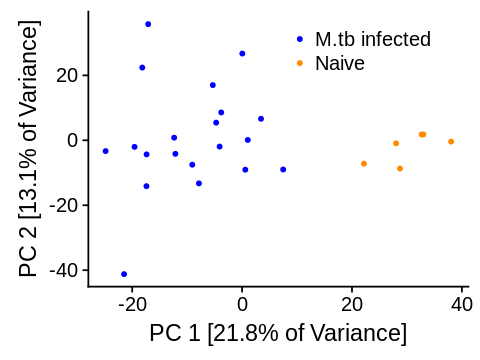

In [10]:
# Principle Component Analysis of Infected vs. Uninfected
std_dev = PCA.mouse.all$sdev
pr_var = std_dev^2
prop_varex = pr_var / sum(pr_var)

Infect.PCA.plot = ggplot(data=gg.PCA.mouse.all, aes(x=PC1, y= PC2)) +
            geom_point(aes(col=infection.status), size=1) + scale_color_manual(name="",
                                                              labels=c("M.tb infected", "Naive"),
                                                              values=c("Mtb"="blue", "Naive"="darkorange")) +
theme(legend.position=c(0.55,0.9))  + 
labs(x=paste("PC 1 [", format(prop_varex[1]*100, digits=3, nsmall=1), "% of Variance]", sep=""), 
     y=paste("PC 2 [", format(prop_varex[2]*100, digits=3, nsmall=1), "% of Variance]", sep="")) +
theme(legend.position=c(0.5,0.90))
Infect.PCA.plot

### Figure 1B (Principle Component Analysis of infected mice)

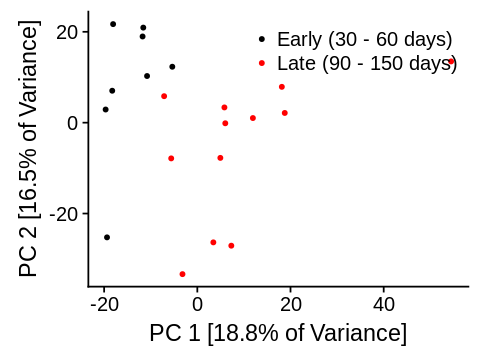

In [11]:
mouse.exprs.Mtb = mouse.exprs.log[,pheno.data$infection.status == "Mtb"]
PCA.mouse.Mtb = prcomp(t(mouse.exprs.Mtb), scale.=T)
gg.PCA.mouse.Mtb = as.data.frame(PCA.mouse.Mtb$x[,1:5])

std_dev = PCA.mouse.Mtb$sdev
pr_var = std_dev^2
prop_varex = pr_var / sum(pr_var)

stage = ifelse(pheno.data[pheno.data$infection.status=="Mtb",]$time.point.days <= 60,
               "early",
               "late")

gg.PCA.mouse.Mtb$stage = as.factor(stage)

Time.PCA.plot = ggplot(data=gg.PCA.mouse.Mtb, aes(x=PC1, y= PC2)) +
            geom_point(aes(col=stage), size=1) + scale_color_manual(name="",
                                                              labels=c("Early (30 - 60 days)", "Late (90 - 150 days)"),
                                                              values=c("early"="black", "late"="red")) +
                theme(legend.position=c(0.50,0.90), legend.text = element_text(size=12))  + 
                labs(x=paste("PC 1 [", format(prop_varex[1]*100, digits=3, nsmall=1), "% of Variance]", sep=""), 
                     y=paste("PC 2 [", format(prop_varex[2]*100, digits=3, nsmall=1), "% of Variance]", sep="")) +
            theme(legend.position=c(0.4,0.90))

Time.PCA.plot

### Figure 1C (Classification of early vs. late time periods post-infection)

In [12]:
set.seed(100)

mouse.table.class = as.data.frame(t(mouse.exprs.log[,pheno.data$infection.status == "Mtb"]))
mouse.table.class$stage = as.factor(stage)
mouse.rf.class = randomForest(stage~., data=mouse.table.class)

[1] "This is the AUC:"
Area under the curve: 0.9896
[1] "This is the AUC p-value:"
[1] 1.58768e-05
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.9607-1 (DeLong)


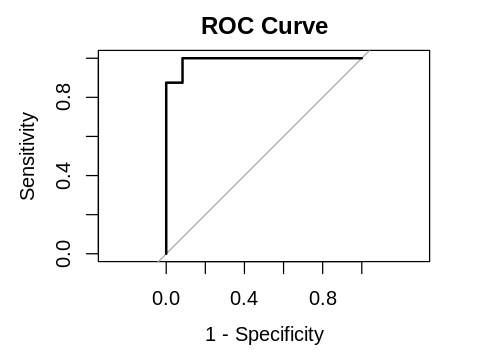

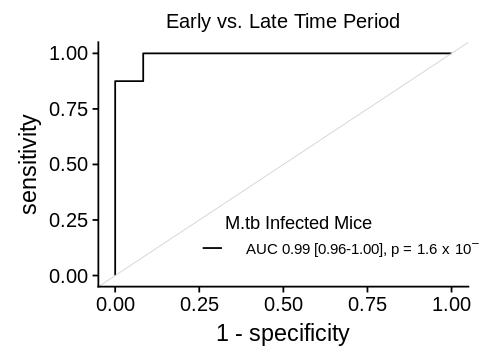

In [13]:
class.plot = my.roc(1 - mouse.rf.class$votes[,2], mouse.table.class$stage, "early")
gg.class.plot = ggroc(list(mouse=class.plot), legacy.axes=TRUE) +
                geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.25) + 
                ggtitle("Early vs. Late Time Period") + theme(plot.title = element_text(size=12, face="plain")) +
                scale_color_manual(name="     M.tb Infected Mice",
                                  labels=expression("AUC 0.99 [0.96-1.00], p ="~1.6~ "x" ~10^{-5} ~ " "),
                                  values=c("mouse"="black")) +
            theme(legend.position=c(0.25,0.20), legend.title = element_text(size=11), legend.text = element_text(size=9))  
gg.class.plot

### Figure 1D (Regression of time post-infection)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”`geom_smooth()` using method = 'loess'


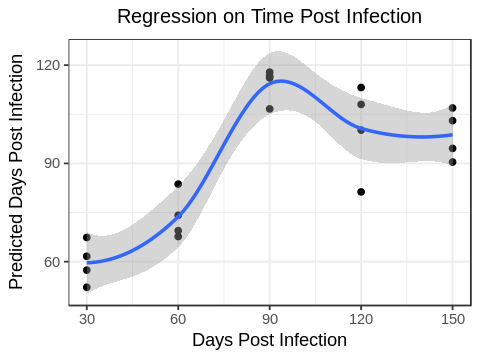

In [14]:
mouse.table.regress = as.data.frame(t(mouse.exprs.log[,pheno.data$infection.status == "Mtb"]))
mouse.table.regress$time.point.days = pheno.data[pheno.data$infection.status=="Mtb",]$time.point.days
set.seed(100)
C57.rf.regres = randomForest(time.point.days~., data=mouse.table.regress, importance=T)
predictions = data.frame(C57.predicted=C57.rf.regres$predicted, C57.time.point.days = mouse.table.regress$time.point.days)

set.seed(100)
regress.plot = ggplot(predictions, aes(C57.time.point.days, C57.predicted))+ 
                  geom_point() + 
                  geom_smooth() + theme_bw() + 
                  labs(x="Days Post Infection", y="Predicted Days Post Infection", size=14) + 
                  ggtitle("Regression on Time Post Infection") +
                  theme(plot.title = element_text(hjust = 0.5, size=12)) +
scale_x_continuous(breaks=c(30, 60, 90, 120, 150)) +
                scale_y_continuous(breaks=c(30, 60, 90, 120, 150))
regress.plot

### Save Figure 1

In [15]:
Figure_1 = plot_grid(Infect.PCA.plot, Time.PCA.plot, gg.class.plot , regress.plot, labels=c("", "", "", "", align='h'),
                    rel_widths = c(1, 1.2))

`geom_smooth()` using method = 'loess'


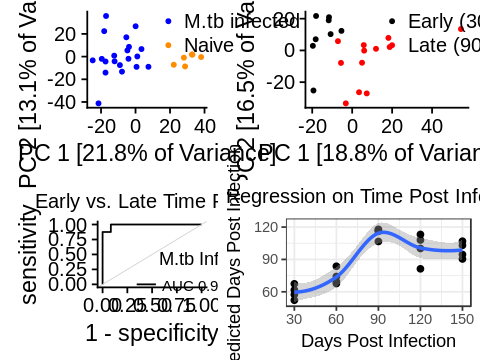

In [16]:
Figure_1

In [17]:
figures.dir = "paper_figures/"
save_plot(paste(figures.dir, "TSI_paper_bioarxiv_Figure1_mice.pdf", sep="/"), Figure_1, ncol=2, nrow=2)

In [22]:
save_plot(paste(figures.dir, "TSI_paper_scireports_Figure1_mice.pdf", sep="/"), Figure_1, ncol=2, nrow=2)

### Figure S1 (Classification of early vs. late time periods post-infection including predictions on naive mice)

In [46]:
naive.class.pred = predict(mouse.rf.class, as.data.frame(t(mouse.exprs.log[,pheno.data$infection.status != "Mtb"])), type="prob")

mouse.table.probs = data.frame(prob.early=c(mouse.rf.class$votes[,1], naive.class.pred[,1]),
                               time.point.days=c(mouse.table.regress$time.point.days, rep(0, dim(naive.class.pred)[1])))

`geom_smooth()` using method = 'loess'


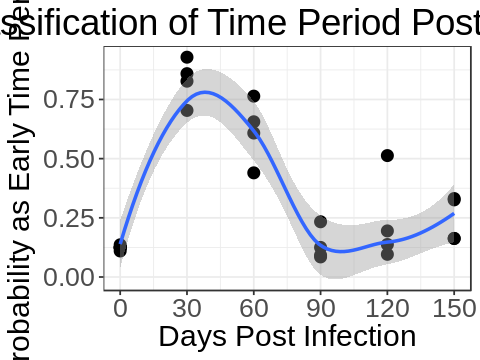

In [64]:
set.seed(100)
prob.plot = ggplot(mouse.table.probs, aes(time.point.days, prob.early))+ 
                  geom_point(size=3) + 
                  geom_smooth() + theme_bw() + 
                  labs(x="Days Post Infection", y="Probability as Early Time Period", size=12) + 
                  ggtitle("Classification of Time Period Post Infection") +
                  theme(plot.title = element_text(hjust = 0.5, size=22)) +
                theme(axis.title=element_text(size=18), axis.text=element_text(size=16)) +
scale_x_continuous(breaks=c(0, 30, 60, 90, 120, 150))
prob.plot

In [65]:
save_plot(paste(figures.dir, "TSI_paper_scireports_FigureS1_mice.pdf", sep="/"), prob.plot, ncol=2, nrow=2)

`geom_smooth()` using method = 'loess'


### Table S1 (Ranked Mouse Regression Probes)

In [179]:
B6.regres.imp = data.frame(importance(C57.rf.regres))
mouse.impvar = B6.regres.imp[order(B6.regres.imp[,1], decreasing=TRUE),]

In [ ]:
mouse = useMart("ensembl", dataset = "mmusculus_gene_ensembl")

In [181]:
mouse.gene.names = getBM(attributes = c('mgi_symbol', "illumina_mousewg_6_v2"),
 filters = c("illumina_mousewg_6_v2"),
    values = rownames(mouse.impvar), mart = mouse)

In [188]:
gene.list = list()
for (probe in unique(mouse.gene.names$illumina_mousewg_6_v2)) {
    gene.list[[probe]] = unique(mouse.gene.names[mouse.gene.names$illumina_mousewg_6_v2 == probe,]$mgi_symbol)
}

In [220]:
probe.to.gene.vector = rep("", length(rownames(mouse.impvar)))
gene.vector = as.vector(sapply( gene.list, paste0, collapse="; "))
names(gene.vector) = names(gene.list)

In [225]:
for (i in 1:length(rownames(mouse.impvar))) {
    probe = rownames(mouse.impvar)[i]
    if (probe %in% names(gene.vector)) {
        probe.to.gene.vector[i] = gene.vector[probe]
    }
}

In [231]:
mouse.gene.table = data.frame(Illumina_MouseWG_6_v2_probe=rownames(mouse.impvar), Gene_Symbol = probe.to.gene.vector, lncMSE=mouse.impvar$X.IncMSE)

In [236]:
write.csv(mouse.gene.table, "paper_figures/mouse_regression_featureimportance_genetable.csv", row.names=FALSE)

## Figure 2 Macaque Analysis

- This code reproduces the analysis of Figure 2, showing that a "Blood RNA signature discriminates early vs. late M.tb infection time periods in cynomolgus macaques"

### Install and Load Required Libraries

In [3]:
source("https://bioconductor.org/biocLite.R")
if (!require("Biobase")) {
  biocLite("Biobase")
  library("Biobase")
}
if (!require("GEOquery")) {
  biocLite("GEOquery")
  library("GEOquery")
}

if (!require("sva")) {
  biocLite("sva")
  library("sva")
}

if (!require("ranger")) {
  install.packages("ranger")
  library("ranger")
}

if (!require("ggplot2")) {
  install.packages("ggplot2")
  library("ggplot2")
}

if (!require("glmnet")) {
  install.packages("glmnet")
  library("glmnet")
}

if (!require("gbm")) {
  install.packages("gbm")
  library("gbm")
}

if (!require("kernlab")) {
  install.packages("kernlab")
  library("kernlab")
}

if (!require("caret")) {
  install.packages("caret")
  library("caret")
}
if (!require("dplyr")) {
  install.packages("dplyr")
  library("dplyr")
}

if (!require("ggsignif")) {
  install.packages("ggsignif")
  library("ggsignif")
}

if (!require("doParallel")) {
  install.packages("doParallel")
  library("doParallel")
}

if (!require("cowplot")) {
  install.packages("cowplot")
  library("cowplot")
}

if (!require("ggpubr")) {
  install.packages("ggpubr")
  library("ggpubr")
}

if (!require("pROC")) {
    # pROC 1.12.0 is required, and may not be the default installation:
    packageUrl<- "https://cran.r-project.org/src/contrib/Archive/pROC/pROC_1.12.0.tar.gz"
    install.packages(packageUrl, repos=NULL, type='source')
    library("pROC")
}

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,

### Load the data

In [4]:
source("utils_submission.R")

Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: verification
Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-2 (2017-12-21) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
Loading required package: boot

Attaching package: ‘boot’

The following object is masked from ‘package:lattice’:

    melanoma

The following object is masked from ‘package:survival’:

    aml

Loading required package: CircStats
Loading required package: MASS

Attaching package: ‘MASS’

The fol

In [10]:
monkey.path = paste(path, "/data/GSE84152", sep="")

In [11]:
monkey.gset = getGEO(filename=paste(monkey.path, "GSE84152_series_matrix.txt.gz", sep="/"), 
             destdir=monkey.path)

Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL10558 found here:
./data/GSE84152/GPL10558.soft 


In [12]:
monkey.gset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 47323 features, 470 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM2227793 GSM2227794 ... GSM2228262 (470 total)
  varLabels: title geo_accession ... wbc:ch1 (95 total)
  varMetadata: labelDescription
featureData
  featureNames: ILMN_1343291 ILMN_1343295 ... ILMN_3311190 (47323
    total)
  fvarLabels: ID Species ... GB_ACC (30 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
Annotation: GPL10558 

In [13]:
raw.expres = read.table(file = paste(monkey.path, "GSE84152_non-normalized.txt", sep="/"), header=T , sep="\t")

#### Process the phenotype table, filter probes expressed in at least 5% of samples (Detection Pvalue < 0.01)

In [25]:
pheno = filter.monkey.pheno(pData(monkey.gset))

              title ChIP hyb.chamber  dataset synchroset monkeyid time.point
GSM2227793  M16_150    1           1 Training         No      M16        150
GSM2227794    M17_3    1           1 Training         No      M17          3
GSM2227795  M8_Pre2    1           1 Training         No       M8          1
GSM2227796   M19_56    1           1 Training         No      M19         56
GSM2227797   M19_90    1           1 Training         No      M19         90
GSM2227798     M1_7    1           1 Training         No       M1          7
GSM2227799   M18_20    1           1 Training         No      M18         20
GSM2227800   M15_90    1           1 Training         No      M15         90
GSM2227801    M1_42    1           1 Training         No       M1         42
GSM2227802  M13_180    1           1 Training        Yes      M13        180
GSM2227803   M17_10    1           1 Training         No      M17         10
GSM2227804   M18_10    1           1 Training         No      M18         10

In [15]:
PAL.5 = get.monkey.expressed.genes(raw.expres)

[1] "Genes expressed in at least 5 % of samples: 15083"


In [26]:
expres = process.monkey.exprs(exprs(monkey.gset), PAL.5)

### Batch correct expression data by hybridization chamber and dataset as in Gideon et al. 2016

In [27]:
modcombat<-model.matrix(~1, data=pheno)
combat_dataset= ComBat(dat=expres, batch=pheno$dataset, mod=modcombat, par.prior=TRUE, prior.plots=TRUE)
expres = ComBat(dat=combat_dataset, batch=pheno$hyb.chamber, mod=modcombat, par.prior=TRUE, prior.plots=TRUE)
  

Found2batches
Adjusting for0covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data

Found12batches
Adjusting for0covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



ERROR: Error in replayPlot(obj): invalid graphics state


Plot with title “paste("Inverse Gamma Q-Q Plot of First Batch ", hat(delta))”

ERROR: Error in replayPlot(obj): invalid graphics state


Plot with title “paste("Inverse Gamma Q-Q Plot of First Batch ", hat(delta))”

ERROR: Error in replayPlot(obj): invalid graphics state


Plot with title “paste("Inverse Gamma Q-Q Plot of First Batch ", hat(delta))”

### Statistically Filter the genes by 60% most variable genes

In [28]:
cut = 0.6

filter = function(x) {IQR(x) / median(x)}
genes.range = apply(expres, 1, filter)
criteria = quantile(genes.range, c(1-cut))

genes.f = rownames(expres)[genes.range > criteria]
expres = expres[genes.f,]

### Focus on time points 20 - 180 days, and store a copy of the pheno table

In [29]:
expres.full = expres
pheno.full = pheno

In [30]:
expres = expres[, pheno$time.point > 10]
pheno = pheno[pheno$time.point > 10,]

In [31]:
pheno$time.period = as.factor(ifelse(pheno$time.point >= 90,
                                             "late",
                                             "early"))

In [16]:
write.table(pheno, file = paste(monkey.path, "PhenoData_processed.txt", sep="/"),sep="\t")

In [17]:
pheno = read.table(file = paste(monkey.path, "PhenoData_processed.txt", sep="/"),sep="\t")

In [18]:
pheno

title   ChIP hyb.chamber dataset  synchroset monkeyid time.point
GSM2227793 M16_150 1    1           Training No         M16      150       
GSM2227796 M19_56  1    1           Training No         M19       56       
GSM2227797 M19_90  1    1           Training No         M19       90       
GSM2227799 M18_20  1    1           Training No         M18       20       
GSM2227800 M15_90  1    1           Training No         M15       90       
GSM2227801 M1_42   1    1           Training No         M1        42       
GSM2227802 M13_180 1    1           Training Yes        M13      180       
GSM2227805 M6_120  2    1           Training No         M6       120       
GSM2227806 M14_90  2    1           Training No         M14       90       
GSM2227807 M15_20  2    1           Training No         M15       20       
GSM2227808 M17_120 2    1           Training No         M17      120       
GSM2227809 M2_42   2    1           Training No         M2        42       
GSM2227810 M9_120  2    1           Training No         M9       120       
GSM2227812 M9_30   2    1           Training No         M9        30       
GSM2227813 M16_120 2    1           Training No         M16      120       
GSM2227814 M3_180  2    1           Training Yes        M3       180       
GSM2227815 M3_30   2    1           Training No         M3        30       
GSM2227816 M19_150 2    1           Training Yes        M19      150       
GSM2227818 M1_20   3    1           Training No         M1        20       
GSM2227820 M18_120 3    1           Training No         M18      120       
GSM2227823 M8_150  3    1           Training No         M8       150       
GSM2227825 M4_56   3    1           Training No         M4        56       
GSM2227827 M9_90   3    1           Training No         M9        90       
GSM2227828 M1_56   4    1           Training No         M1        56       
GSM2227832 M4_20   4    1           Training No         M4        20       
GSM2227833 M16_180 4    1           Training Yes        M16      180       
GSM2227834 M18_30  4    1           Training No         M18       30       
GSM2227835 M6_42   4    1           Training No         M6        42       
GSM2227836 M2_20   4    1           Training No         M2        20       
GSM2227837 M14_30  4    1           Training No         M14       30       
⋮          ⋮       ⋮    ⋮           ⋮        ⋮          ⋮        ⋮         
GSM2228211 M20_42  39   11          Test     No         M20       42       
GSM2228212 M37_120 39   11          Test     No         M37      120       
GSM2228215 M22_20  39   11          Test     No         M22       20       
GSM2228218 M22_42  39   11          Test     No         M22       42       
GSM2228223 M34_90  40   11          Test     No         M34       90       
GSM2228224 M33_30  40   11          Test     No         M33       30       
GSM2228225 M26_20  40   11          Test     No         M26       20       
GSM2228228 M20_20  40   11          Test     No         M20       20       
GSM2228229 M33_90  40   11          Test     No         M33       90       
GSM2228230 M24_150 40   11          Test     No         M24      150       
GSM2228231 M27_150 40   11          Test     No         M27      150       
GSM2228232 M38_30  40   11          Test     No         M38       30       
GSM2228237 M35_180 41   11          Test     Yes        M35      180       
GSM2228238 M26_30  41   11          Test     No         M26       30       
GSM2228239 M22_120 41   11          Test     No         M22      120       
GSM2228240 M32_150 41   11          Test     No         M32      150       
GSM2228242 M24_20  41   11          Test     No         M24       20       
GSM2228243 M33_20  41   11          Test     No         M33       20       
GSM2228244 M28_30  42   12          Test     No         M28       30       
GSM2228245 M35_30  42   12          Test     No         M35       30       
GSM2228246 M20_30  42   12          Test     No         M20

### Divide the data into a training and test set (70-30 split), with preserved ratio of monkeys with latent or active tuberculosis.

- This split was performed in python, which is located Macaque_analysis_train_test_set_split.ipynb

In [35]:
test.latent.monkeys = c('M13', 'M27', 'M34', 'M15', 'M35', 'M36')
test.active.monkeys = c('M1', 'M16', 'M32', 'M18', 'M23')

In [33]:
test.rows = rownames(pheno[pheno$monkeyid %in% union(test.latent.monkeys, test.active.monkeys),])
train.rows = setdiff(rownames(pheno), test.rows)

if (dim(expres)[1] > dim(expres)[2])
    expres = t(expres)

pheno.train = droplevels(pheno[train.rows,])
pheno.test = droplevels(pheno[test.rows,])
expres.train = expres[train.rows,]
expres.test = expres[test.rows,]

In [36]:
test.rows = rownames(pheno.full[pheno.full$monkeyid %in% union(test.latent.monkeys, test.active.monkeys),])
train.rows = setdiff(rownames(pheno.full), test.rows)

if (dim(expres.full)[1] > dim(expres.full)[2])
    expres.full = t(expres.full)

pheno.full.test = droplevels(pheno.full[test.rows,])
expres.full.test = expres.full[test.rows,]

### Create grouped k-folds according to monkey within the training set. With random seed set to 100, this gives 9-folds

In [40]:
set.seed(100)
folds = groupKFold(pheno.train$monkeyid, k=10)
for (fold in lapply(folds, function(x) {pheno.train$monkeyid[x]}))
    print(length((as.character(fold))))

lapply(folds, function(x, y) table(y[x]), y = pheno.train$monkeyid)

[1] 202
[1] 194
[1] 186
[1] 174
[1] 187
[1] 179
[1] 186
[1] 178
[1] 194


$Fold1

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   8   8   0   8   7   8   8   8   8   8   8   8   8   8   8   8   7   8   8 
M38  M4  M5  M6  M7  M8  M9 
  7   8   8   8   8   8   8 

$Fold2

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   8   8   8   8   7   8   8   8   0   8   8   8   8   8   8   8   7   8   8 
M38  M4  M5  M6  M7  M8  M9 
  7   8   8   8   8   0   8 

$Fold3

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   0   8   8   8   7   8   8   8   8   8   8   0   8   8   8   0   7   8   8 
M38  M4  M5  M6  M7  M8  M9 
  7   8   8   8   8   8   8 

$Fold4

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  0   8   8   8   8   7   8   0   8   8   8   8   8   0   8   8   8   0   0   8 
M38  M4  M5  M6  M7  M8  M9 
  7   8   8   8   8   8   8 

$Fold5

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 

### Reproduce Supplementary Figure S3 (this takes quite a bit of time)

In [ ]:
seed=7

# Now we are going to loop over different models

start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("gbm", "svmRadial", "svmPoly", "ranger", "glmnet")

models = list()


#folds
control <- trainControl(method="cv", index=folds, search="random", allowParallel=TRUE, savePredictions='final',
                       classProbs=TRUE, summaryFunction=twoClassSummary)

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(expres.train, pheno.train$time.period,  method=alg, tuneLength=50, trControl=control,
                 metric="ROC")
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

In [ ]:
results = resamples(models)
bwplot(results)

### Reproduce Figure 2A,B, using glmnet. Do a larger hyperparameter search to find the optimally performing model on the training set.

In [41]:
set.seed(100)

n = 10000
lambda.grid = c(10 ^ runif(n, min = log10(1e-5), max = log10(1e2)))
alpha.grid = runif(length(lambda.grid), min = 0.00, 1.0)

train.grid = data.frame(lambda = sample(lambda.grid, length(lambda.grid)),
                       alpha = sample(alpha.grid, length(lambda.grid)))

In [ ]:
seed=7

start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c( "glmnet")

models = list()

control <- trainControl(method="cv", index=folds, allowParallel=TRUE, savePredictions='final',
                       classProbs=TRUE, summaryFunction=twoClassSummary)

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(expres.train, pheno.train$time.period,  method=alg, trControl=control, tuneGrid=train.grid,
                 metric="ROC")
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"


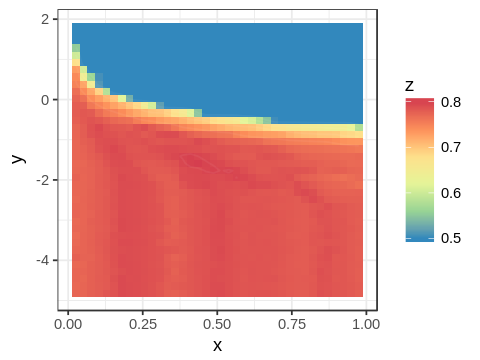

In [43]:
glmres = models$glmnet$results
graph.hyper(glmres$alpha, log10(glmres$lambda), glmres$ROC)

#### Figure 2A

In [ ]:
models.monkey.ROC = models
model.monkey.ROC = models.monkey.ROC$glmnet

glmnet.monkey.val.ROC = my.roc(model.monkey.ROC$pred$early, model.monkey.ROC$pred$obs, "early")

pred.monkey.test = predict(model.monkey.ROC, newdata = expres.test, type="prob")
glmnet.monkey.ROC = my.roc(pred.monkey.test$early,
                          pheno.test$time.period,
                          "early")

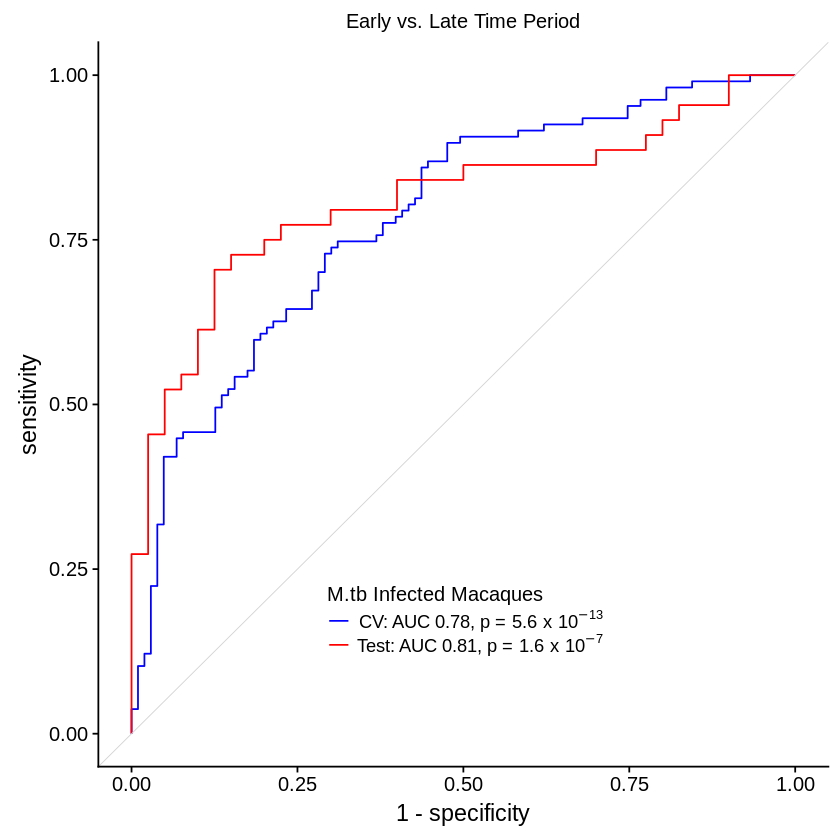

In [6]:
monkey.class.plot = ggroc(list(CV=glmnet.monkey.val.ROC, test=glmnet.monkey.ROC), legacy.axes=TRUE) +
                geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.25) + 
                ggtitle("Early vs. Late Time Period") + theme(plot.title = element_text(size=12, face="plain")) +
                scale_color_manual(name="M.tb Infected Macaques",
                                  labels=c("CV" =expression("CV: AUC 0.78, p ="~5.6~ "x" ~10^{-13} ~ " "),
                                           "test"=expression("Test: AUC 0.81, p ="~1.6~ "x" ~10^{-7} ~ " ")),
                                  values=c("CV"="blue", "test"="red")) +
            theme(legend.position=c(0.30,0.20), legend.title = element_text(size=12), legend.text = element_text(size=11)) 
monkey.class.plot

#### Figure 2B

In [7]:
monkey.val.preds = models.monkey.ROC$glmnet$pred
pred.monkey.test  = predict(models.monkey.ROC$glmnet, newdata=expres.test)

# Calculate ratio of active to latent in all actual and predicted early and late time periods, in both validation and test set

a.l.early.val = sum(dplyr::filter(pheno.train, time.period=="early")$clinical.status == "Active") / length(dplyr::filter(pheno.train, time.period=="early")$clinical.status)
a.l.late.val = sum(dplyr::filter(pheno.train, time.period=="late")$clinical.status == "Active") / length(dplyr::filter(pheno.train, time.period=="late")$clinical.status)

a.l.p.early.val = sum(pheno.train[monkey.val.preds$pred == "early",]$clinical.status=="Active") / length(pheno.train[monkey.val.preds$pred == "early",]$clinical.status)
a.l.p.late.val = sum(pheno.train[monkey.val.preds$pred == "late",]$clinical.status=="Active") / length(pheno.train[monkey.val.preds$pred == "late",]$clinical.status)


# Calculate ratio of active to latent in all actual and predicted early and late time periods, in both validation and test set
a.l.early.test = sum(dplyr::filter(pheno.test, time.period=="early")$clinical.status == "Active") / length(dplyr::filter(pheno.test, time.period=="early")$clinical.status)
a.l.late.test = sum(dplyr::filter(pheno.test, time.period=="late")$clinical.status == "Active") / length(dplyr::filter(pheno.test, time.period=="late")$clinical.status)

a.l.p.early.test = sum(pheno.test[pred.monkey.test  == "early",]$clinical.status=="Active") / length(pheno.test[pred.monkey.test  == "early",]$clinical.status)
a.l.p.late.test = sum(pheno.test[pred.monkey.test  == "late",]$clinical.status=="Active") / length(pheno.test[pred.monkey.test  == "late",]$clinical.status)


t.period = c("Early", "Predicted Early", "Early", "Predicted Early")
partition = as.factor(c("Cross-Validation", "Cross-Validation", "Test", "Test"))
active_prop = c(a.l.early.val, a.l.p.early.val, a.l.early.test, a.l.p.early.test)
partition = factor(partition, levels(partition)[c(which(levels(partition) == "Cross-Validation"),
                                                  which(levels(partition) == "Test"))])

disease.confound = data.frame(t.period=as.factor(t.period), partition=partition, active_prop=active_prop)


n.act.early.val = sum(dplyr::filter(pheno.train, time.period=="early")$clinical.status == "Active")
n.tot.early.val = length(dplyr::filter(pheno.train, time.period=="early")$clinical.status)

n.act.p.early.val = sum(pheno.train[monkey.val.preds$pred == "early",]$clinical.status=="Active")
n.tot.p.early.val = length(pheno.train[monkey.val.preds$pred == "early",]$clinical.status)


fisher.test(matrix(c(n.act.early.val, 
                     n.tot.early.val - n.act.early.val,
                     n.act.p.early.val,
                     n.tot.p.early.val - n.act.p.early.val), ncol=2))


n.act.early.test = sum(dplyr::filter(pheno.test, time.period=="early")$clinical.status == "Active")
n.tot.early.test = length(dplyr::filter(pheno.test, time.period=="early")$clinical.status)

n.act.p.early.test = sum(pheno.test[pred.monkey.test  == "early",]$clinical.status=="Active")
n.tot.p.early.test = length(pheno.test[pred.monkey.test  == "early",]$clinical.status)


fisher.test(matrix(c(n.act.early.test, 
                     n.tot.early.test - n.act.early.test,
                     n.act.p.early.test,
                     n.tot.p.early.test - n.act.p.early.test), ncol=2))


	Fisher's Exact Test for Count Data

data:  
p-value = 0.3172
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.7469774 2.4946537
sample estimates:
odds ratio 
  1.361477 



	Fisher's Exact Test for Count Data

data:  
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4008563 2.3838605
sample estimates:
odds ratio 
 0.9784834 


In [8]:
a.l.plot = ggplot(disease.confound, aes(x=t.period, y=active_prop)) + geom_bar(stat="identity") + facet_grid(~partition) +
    labs(
        y="Proportion of Samples from\nMacaques with Active TB") +
ggtitle("Risk of TB", subtitle="Stratified by Predicted Time Period") + theme(plot.title = element_text(size=12, face="plain", hjust=0.5), 
                                                                              plot.subtitle=element_text(size=11, face="plain", hjust=0.5)) +
ylim(0, 1.0) +
geom_signif(comparisons=list(c("Early", "Predicted Early")),
                               y_position=c(0.75),
              annotations = c("1.0"), vjust=-0.5, 
             tip_length=0) + theme(panel.background = element_rect(fill = "white", colour = "white", size = 4)) +
                scale_x_discrete(labels=c("Early" = "Early", "Predicted Early"="Predicted\nEarly")) +
theme(axis.title.x=element_blank())

In [ ]:
a.l.plot

### Figure S4 (Classification of early vs. late time periods post-infection in monkeys, including predictions for all time points)

In [46]:
naive.class.pred = predict(mouse.rf.class, as.data.frame(t(mouse.exprs.log[,pheno.data$infection.status != "Mtb"])), type="prob")

mouse.table.probs = data.frame(prob.early=c(mouse.rf.class$votes[,1], naive.class.pred[,1]),
                               time.point.days=c(mouse.table.regress$time.point.days, rep(0, dim(naive.class.pred)[1])))

In [22]:
monkey.all.class.pred = predict(model.monkey.ROC, expres.full.test, type="prob")
colnames(monkey.all.class.pred)[2] = "early"

In [40]:
# Correct pre-infection time points to actual days prior to infection
pheno.full.test$time.point = ifelse(pheno.full.test$time.point==0, -2, 
                                   ifelse(pheno.full.test$time.point == 1 , -1, pheno.full.test$time.point))

In [45]:
monkey.table.probs = data.frame(prob.early=monkey.all.class.pred$early,
                               time.point.days=pheno.full.test$time.point)

`geom_smooth()` using method = 'loess'


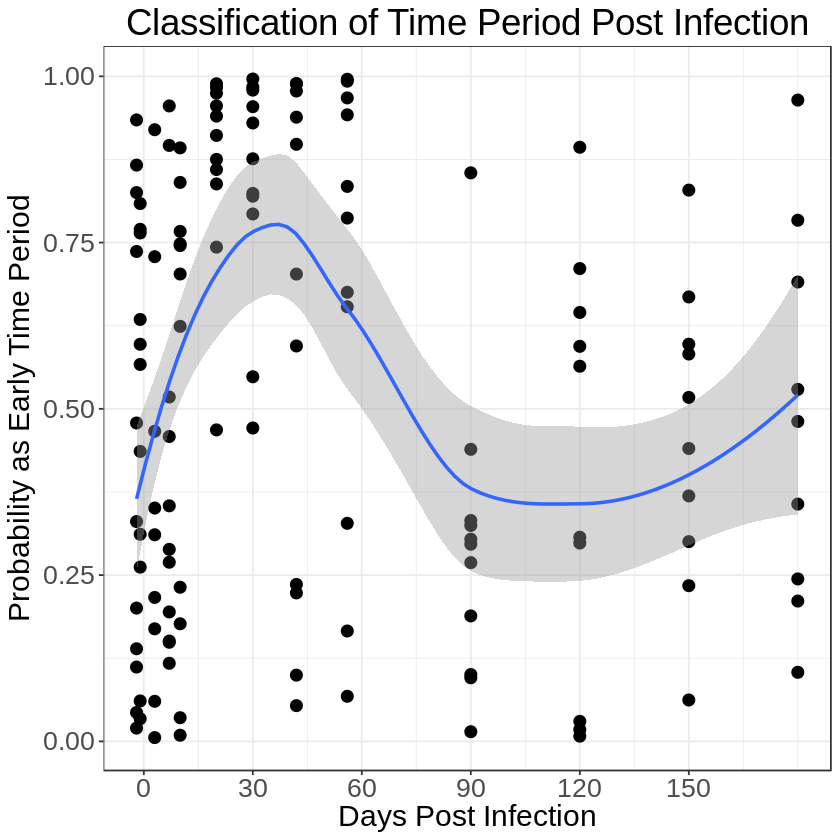

In [46]:
set.seed(100)
monkey.prob.plot = ggplot(monkey.table.probs, aes(time.point.days, prob.early))+ 
                  geom_point(size=3) + 
                  geom_smooth() + theme_bw() + 
                  labs(x="Days Post Infection", y="Probability as Early Time Period", size=12) + 
                  ggtitle("Classification of Time Period Post Infection") +
                  theme(plot.title = element_text(hjust = 0.5, size=22)) +
                theme(axis.title=element_text(size=18), axis.text=element_text(size=16)) +
scale_x_continuous(breaks=c(0, 30, 60, 90, 120, 150))
monkey.prob.plot

In [50]:
save_plot(paste(figures.dir, "TSI_paper_scireports_FigureS3_monkeys.pdf", sep="/"), monkey.prob.plot, ncol=2, nrow=2)

`geom_smooth()` using method = 'loess'


### Reproduce Figure 2C-F, using glmnet for regression. Do a hyperparameter search to find the optimally performing model on the training set.

In [22]:
set.seed(100)

n = 1000
lambda.grid = c(10 ^ runif(n, min = log10(1e0), max = log10(1e2)))

alpha.grid = runif(length(lambda.grid), min = 0.00, 1.00)

train.grid = data.frame(lambda = sample(lambda.grid, length(lambda.grid)),
                       alpha = sample(alpha.grid, length(lambda.grid)))


In [23]:
seed=7

library(doParallel)

start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("glmnet")


models = list()


#folds
control <- trainControl(method="cv", index=folds, savePredictions = 'final', allowParallel=TRUE)

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(expres.train, pheno.train$time.point, tuneGrid = train.grid, method=alg, trControl=control) # 
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Time difference of 12.18823 mins


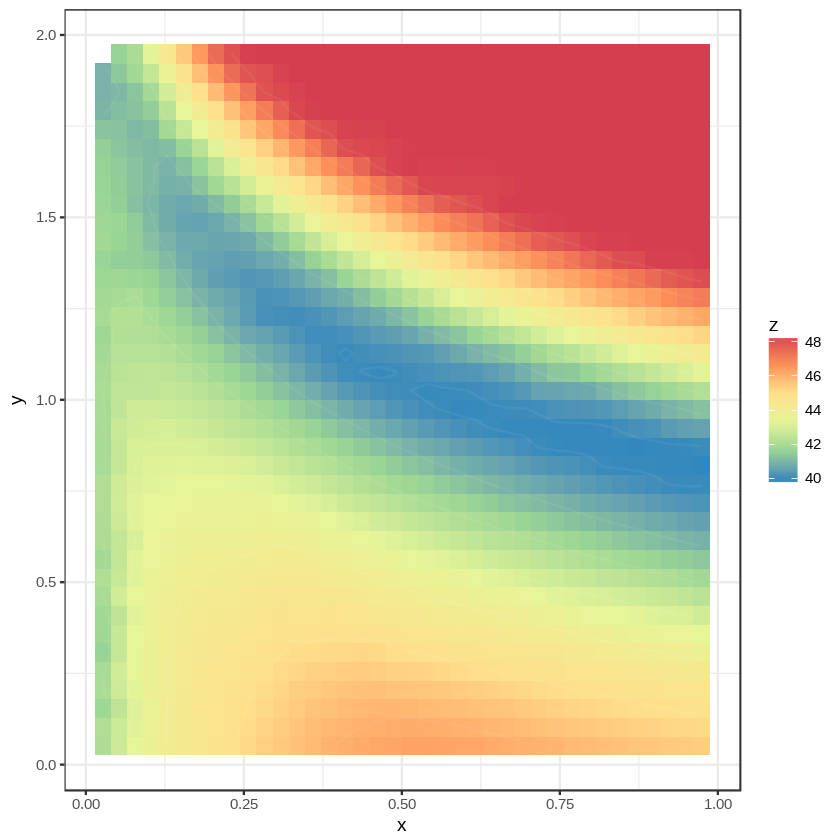

In [24]:
glmres = models$glmnet$results
graph.hyper(glmres$alpha, log10(glmres$lambda), glmres$MAE)


In [25]:
regress.model = models

In [26]:
val.regress.model = regress.model
val.pred = val.regress.model$glmnet$pred
all.metrics(val.pred$obs, val.pred$pred)

regress.model.glm = regress.model$glmnet
pred.regress.test = predict(regress.model.glm, newdata = expres.test)
time.point.obs = pheno.test$time.point

all.metrics(time.point.obs, pred.regress.test)

[1] "Root Mean Squared Error (RMSE)"
[1] 47.84271
[1] "Mean Absolute Error"
[1] 39.78075
[1] "Median Absolute Error"
[1] 37.53412
[1] "Pearson Correlation Coefficient"
[1] 0.4843737
[1] "Pearson Correlation Signifcance Test"

	Pearson's product-moment correlation

data:  truth and pred
t = 7.985, df = 208, p-value = 9.42e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3734757 0.5816217
sample estimates:
      cor 
0.4843737 

[1] "Spearman Correlation Signifcance Test"


Warning message in cor.test.default(truth, pred, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  truth and pred
S = 731840, p-value = 2.495e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5258443 

[1] "R squared"
[1] 0.2346179
[1] "Root Mean Squared Error (RMSE)"
[1] 45.66639
[1] "Mean Absolute Error"
[1] 38.74965
[1] "Median Absolute Error"
[1] 34.90636
[1] "Pearson Correlation Coefficient"
[1] 0.5365446
[1] "Pearson Correlation Signifcance Test"

	Pearson's product-moment correlation

data:  truth and pred
t = 5.7575, df = 82, p-value = 1.435e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3640241 0.6734689
sample estimates:
      cor 
0.5365446 

[1] "Spearman Correlation Signifcance Test"


Warning message in cor.test.default(truth, pred, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  truth and pred
S = 39575, p-value = 1.711e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5993248 

[1] "R squared"
[1] 0.2878801


#### Perform regression only on samples at 90 day time point or less

In [27]:
expres.train.90 = expres.train[pheno.train$time.point <= 90,]
pheno.train.90 = pheno.train[pheno.train$time.point <= 90,]

In [28]:
set.seed(100)
pheno.train.90 = dplyr::filter(pheno.train, time.point<=90)
folds.90 = groupKFold(pheno.train.90$monkeyid, k=10)
for (fold in lapply(folds.90, function(x) {pheno.train.90$monkeyid[x]}))
    print(length((as.character(fold))))

lapply(folds.90, function(x, y) table(y[x]), y = pheno.train.90$monkeyid)

[1] 129
[1] 124
[1] 119
[1] 110
[1] 119
[1] 114
[1] 119
[1] 114
[1] 124


$Fold1

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   5   5   0   5   5   5   5   5   5   5   5   5   5   5   5   5   4   5   5 
M38  M4  M5  M6  M7  M8  M9 
  5   5   5   5   5   5   5 

$Fold2

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   5   5   5   5   5   5   5   5   0   5   5   5   5   5   5   5   4   5   5 
M38  M4  M5  M6  M7  M8  M9 
  5   5   5   5   5   0   5 

$Fold3

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   0   5   5   5   5   5   5   5   5   5   5   0   5   5   5   0   4   5   5 
M38  M4  M5  M6  M7  M8  M9 
  5   5   5   5   5   5   5 

$Fold4

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  0   5   5   5   5   5   5   0   5   5   5   5   5   0   5   5   5   0   0   5 
M38  M4  M5  M6  M7  M8  M9 
  5   5   5   5   5   5   5 

$Fold5

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 

In [29]:
set.seed(100)

n = 1000
lambda.grid = c(10 ^ runif(n, min = log10(1e-12), max = log10(1e4)))

alpha.grid = runif(length(lambda.grid), min = 0.00, 1.00)

train.grid = data.frame(lambda = sample(lambda.grid, length(lambda.grid)),
                       alpha = sample(alpha.grid, length(lambda.grid)))


In [30]:
seed=7

library(doParallel)

start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("glmnet")

models = list()

control <- trainControl(method="cv", index=folds.90, savePredictions = 'final', allowParallel=TRUE)

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(expres.train.90, pheno.train.90$time.point, tuneGrid = train.grid, method=alg, trControl=control) # 
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Time difference of 7.42638 mins


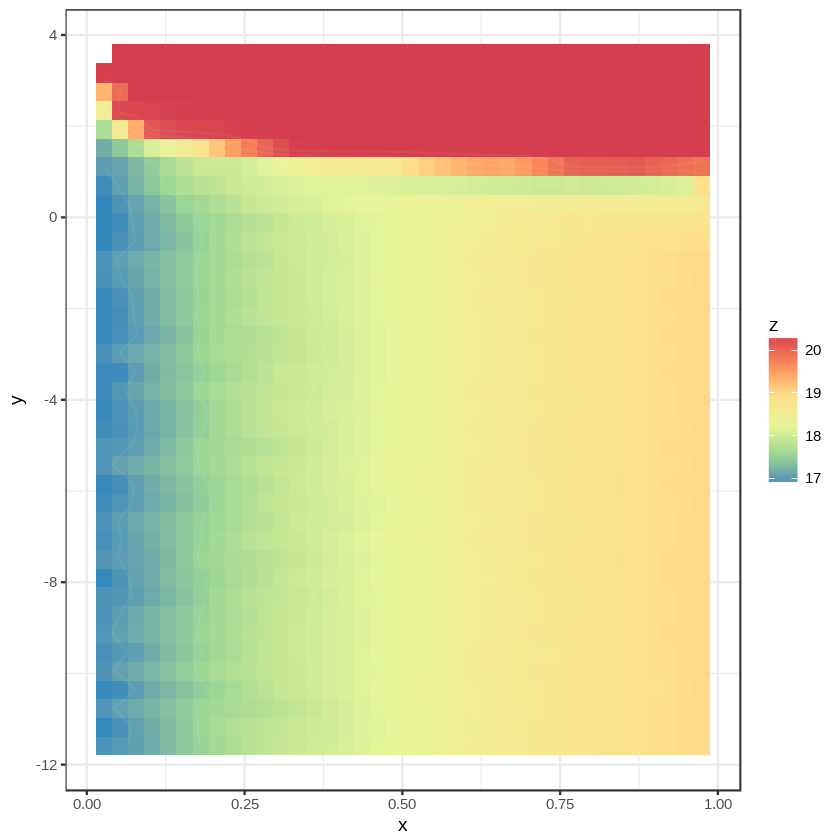

In [31]:
glmres = models$glmnet$results
graph.hyper(glmres$alpha, log10(glmres$lambda), glmres$MAE)


In [32]:
regress.model.90 = models
val.pred.90 = regress.model.90$glmnet$pred
all.metrics(val.pred.90$obs, val.pred.90$pred)

regress.model.90.glm = regress.model.90$glmnet
pred.regress.test.90 = predict(regress.model.90.glm, newdata = expres.test[pheno.test$time.point <= 90,])
time.point.90 = dplyr::filter(pheno.test, time.point <= 90)$time.point
all.metrics(time.point.90, pred.regress.test.90)

[1] "Root Mean Squared Error (RMSE)"
[1] 20.93642
[1] "Mean Absolute Error"
[1] 16.82706
[1] "Median Absolute Error"
[1] 15.81807
[1] "Pearson Correlation Coefficient"
[1] 0.5149904
[1] "Pearson Correlation Signifcance Test"

	Pearson's product-moment correlation

data:  truth and pred
t = 6.9025, df = 132, p-value = 1.937e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3784548 0.6295924
sample estimates:
      cor 
0.5149904 

[1] "Spearman Correlation Signifcance Test"


Warning message in cor.test.default(truth, pred, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  truth and pred
S = 188940, p-value = 5.1e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5288156 

[1] "R squared"
[1] 0.2652151
[1] "Root Mean Squared Error (RMSE)"
[1] 22.10746
[1] "Mean Absolute Error"
[1] 16.9703
[1] "Median Absolute Error"
[1] 14.23728
[1] "Pearson Correlation Coefficient"
[1] 0.4550192
[1] "Pearson Correlation Signifcance Test"

	Pearson's product-moment correlation

data:  truth and pred
t = 3.72, df = 53, p-value = 0.0004825
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2157686 0.6427291
sample estimates:
      cor 
0.4550192 

[1] "Spearman Correlation Signifcance Test"


Warning message in cor.test.default(truth, pred, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  truth and pred
S = 14542, p-value = 0.0002446
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4754011 

[1] "R squared"
[1] 0.2070425


#### Plot Figures 4C-F

In [33]:
test.model = data.frame(obs=pheno.test$time.point, pred=pred.regress.test)

test.model.90 = data.frame(obs=time.point.90, pred=pred.regress.test.90)

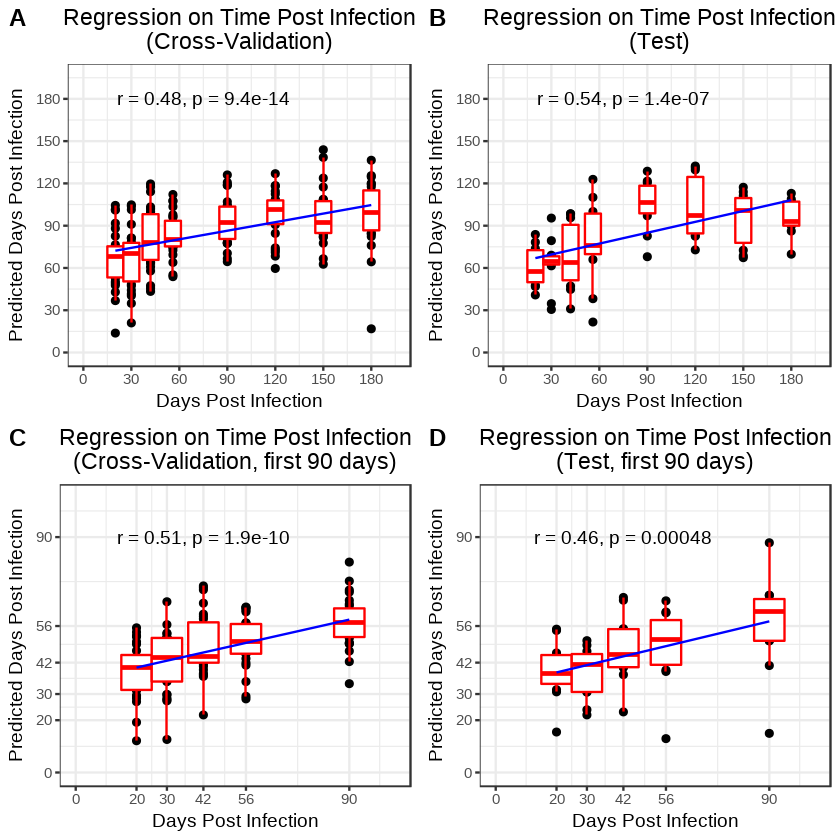

In [44]:
glm.graph.val = generate.regres.graph(val.pred, "Regression on Time Post Infection\n(Cross-Validation)")
glm.graph.test = generate.regres.graph(test.model, "Regression on Time Post Infection\n(Test)")

glm.graph.val.90 = generate.regres.graph(val.pred.90, "Regression on Time Post Infection\n(Cross-Validation, first 90 days)", break.90=T)
glm.graph.test.90 = generate.regres.graph(test.model.90, "Regression on Time Post Infection\n(Test, first 90 days)", break.90=T)


allregressions= plot_grid(glm.graph.val,
                          glm.graph.test,
                          glm.graph.val.90,
                          glm.graph.test.90,
                          labels = toupper(c(letters[1:4], align="h")))

allregressions


## Figure 3 Human Analysis (Grand Challenges 6-74 cohort and Small Adolescent Infection Acquisition study)

- This code reproduces the analysis of Figure 3, showing that "Blood RNA expression of 250 genes predicts time since active TB exposure in humans."

### Load and Install Required Libraries

In [45]:
if (!require("preprocessCore")) {
  source("https://bioconductor.org/biocLite.R")
  biocLite("preprocessCore")
  library("preprocessCore")
}

source("https://bioconductor.org/biocLite.R")
if (!require("Biobase")) {
  biocLite("Biobase")
  library("Biobase")
}
if (!require("GEOquery")) {
  biocLite("GEOquery")
  library("GEOquery")
}

if (!require("ggplot2")) {
  install.packages("ggplot2")
  library("ggplot2")
}

if (!require("glmnet")) {
  install.packages("glmnet")
  library("glmnet")
}

if (!require("caret")) {
  install.packages("caret")
  library("caret")
}
if (!require("dplyr")) {
  install.packages("dplyr")
  library("dplyr")
}

if (!require("ggsignif")) {
  install.packages("ggsignif")
  library("ggsignif")
}

if (!require("doParallel")) {
  install.packages("doParallel")
  library("doParallel")
}

if (!require("cowplot")) {
  install.packages("cowplot")
  library("cowplot")
}

if (!require("e1071")) {
  install.packages("e1071")
  library("e1071")
}

if (!require("pROC")) {
    # pROC 1.12.0 is required, and may not be the default installation:
    packageUrl<- "https://cran.r-project.org/src/contrib/Archive/pROC/pROC_1.12.0.tar.gz"
    install.packages(packageUrl, repos=NULL, type='source')
    library("pROC")
}

if (!require("illuminaio")) {
  source("https://bioconductor.org/biocLite.R")
  biocLite("illuminaio")
  library("illuminaio")
}

if (!require("limma")) {
  source("https://bioconductor.org/biocLite.R")
  biocLite("limma")
  library("limma")
}


Loading required package: preprocessCore
Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
Loading required package: e1071
Loading required package: illuminaio
Loading required package: limma

Attaching package: ‘limma’

The following object is masked from ‘package:BiocGenerics’:

    plotMA



### Reproduce Analysis for Figure 3A

#### Load data and filter probes by detection p values by processing the .idat files

In [215]:
source("utils_submission.R")

ado.path =  paste(path, "/data/GSE116014", sep="")

ado.eset = getGEO(filename=paste(ado.path, "GSE116014_series_matrix.txt.gz", sep="/"), 
             destdir=ado.path)

Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL10558 found here:
data/GSE116014_adolescent//GPL10558.soft 


In [214]:
idatfiles <- dir(ado.path, pattern="idat", full.names=T)
bgxfile <- dir(ado.path, pattern="B.txt.gz", full.names=T)
x <- read.idat(idatfiles, bgxfile[1])
x$other$Detection <- detectionPValues(x)
dim(x$other$Detection)

Reading manifest file /master/rault/TB/data/GSE116014/GPL10558_HumanHT-12_V4_0_R1_15002873_B.txt.gz ... Done
	 /master/rault/TB/data/GSE116014/GSM3207067_8381645078_B_Grn.idat ... Done
	 /master/rault/TB/data/GSE116014/GSM3207068_8381645078_C_Grn.idat ... Done
	 /master/rault/TB/data/GSE116014/GSM3207069_8381645078_D_Grn.idat ... Done
	 /master/rault/TB/data/GSE116014/GSM3207070_8381645078_E_Grn.idat ... Done
	 /master/rault/TB/data/GSE116014/GSM3207071_8381645078_F_Grn.idat ... Done
	 /master/rault/TB/data/GSE116014/GSM3207072_8381645078_G_Grn.idat ... Done
	 /master/rault/TB/data/GSE116014/GSM3207073_8381645078_H_Grn.idat ... Done
	 /master/rault/TB/data/GSE116014/GSM3207074_8381645078_I_Grn.idat ... Done
	 /master/rault/TB/data/GSE116014/GSM3207075_8381645078_J_Grn.idat ... Done
	 /master/rault/TB/data/GSE116014/GSM3207076_8381645078_K_Grn.idat ... Done
	 /master/rault/TB/data/GSE116014/GSM3207077_8381645078_L_Grn.idat ... Done
	 /master/rault/TB/data/GSE116014/GSM3207078_8381645088

[1] 48118    82

In [217]:
row.names(x$other$Detection) = x$genes$Probe_Id
df = x$other$Detection
probe = as.character(row.names(df))
df = data.frame(df, probe=probe)
df = df[!duplicated(df$probe),]
df = df[match(featureNames(ado.eset), df$probe),]
row.names(df) = df$probe
df$probe=NULL
print(identical(featureNames(ado.eset), row.names(df)))

Warning message in data.row.names(row.names, rowsi, i):
“some row.names duplicated: 47233,47236,47238,47240,47242,47243,47246,47247,47251,47253,47255 --> row.names NOT used”

[1] TRUE


In [218]:
write.csv(df, paste(ado.path, "GSE116014_DetectionPValues.csv", sep="/"))

In [222]:
dPvalues = read.csv(paste(ado.path, "GSE116014_DetectionPValues.csv", sep="/"), header=T, row.names=1)

#### Prepare data for training a model to predict time since first known QFT conversion (0 vs 6 months)

In [224]:
det_pval_thresh = 0.01

# Choose genes expressed in 10% of samples
percent_samples= 0.10

PAL.10 = row.names(dPvalues)[apply(dPvalues <= det_pval_thresh, 1, mean) >= percent_samples]

ado.eset.PAL.10 = ado.eset[featureNames(ado.eset) %in% PAL.10,]

ado.exprs = exprs(ado.eset.PAL.10)
ado.pheno = pData(ado.eset.PAL.10)

colnames(ado.pheno) = gsub(" ",".", gsub(":ch1|\\(|\\)","",colnames(ado.pheno)))

ado.pheno = ado.pheno[,c('draw.day',
                         'latent.tb.status.at.blood.draw',
                         'patientid',
                         'relative.time.from.conversion.days',
                         'time.of.conversion.days',
                         'tissue')]
num.f = c  ('draw.day',
                         'relative.time.from.conversion.days',
                         'time.of.conversion.days')
            
for (f in num.f) {
    ado.pheno[,f] = as.numeric(ado.pheno[,f])
}

ado.exprs.qn = normalize.quantiles(ado.exprs)
row.names(ado.exprs.qn) = row.names(ado.exprs)
colnames(ado.exprs.qn) = colnames(ado.exprs)

ado.exprs.qn[ado.exprs.qn < 10] = 10
ado.exprs.log = log2(ado.exprs.qn)

cut = 0.6

filter.QR = function(x) {IQR(x) / median(x)}
genes.range = apply(ado.exprs.log, 1, filter.QR)
criteria = quantile(genes.range, c(1-cut))

genes.f = rownames(ado.exprs.log)[genes.range > criteria]
ado.exprs.var = ado.exprs.log[genes.f,]

ado.pheno.qft = ado.pheno[ado.pheno$relative.time.from.conversion.days %in% c(0,180),]

ntrain =  0.7 * length(unique(ado.pheno.qft$patientid))

ntest = 0.3 * length(unique(ado.pheno.qft$patientid))

set.seed(100)
train.patients = sample(unique(as.character(ado.pheno.qft$patientid)), ntrain)
test.patients = setdiff(unique(as.character(ado.pheno.qft$patientid)), train.patients)
print("Number of common patients between training and test set (should be 0)")
length(intersect(train.patients, test.patients))

ado.pheno.train = droplevels(ado.pheno.qft[ado.pheno.qft$patientid %in% train.patients,])
ado.pheno.test = droplevels(ado.pheno.qft[ado.pheno.qft$patientid %in% test.patients,])

ado.exprs.qft = ado.exprs.var[, colnames(ado.exprs.var) %in% row.names(ado.pheno.qft)]

ado.exprs.train = t(ado.exprs.qft[,ado.pheno.qft$patientid %in% train.patients])
ado.exprs.test = t(ado.exprs.qft[,ado.pheno.qft$patientid %in% test.patients])

set.seed(100)
folds.ado = groupKFold(ado.pheno.train$patientid, k=11)
for (fold in lapply(folds.ado, function(x) {ado.pheno.train$patientid[x]}))
    print(length((as.character(fold))))

lapply(folds.ado, function(x, y) table(y[x]), y = ado.pheno.train$patientid)
       
time.since.QFT.conversion = as.factor(ifelse(ado.pheno.train$relative.time.from.conversion.days == "0", "early", "late"))
test.time.since.QFT.conversion = as.factor(ifelse(ado.pheno.test$relative.time.from.conversion.days == "0", "early", "late"))

[1] "Number of common patients between training and test set (should be 0)"


[1] 0

[1] 37
[1] 35
[1] 35
[1] 33
[1] 33
[1] 34
[1] 34
[1] 34
[1] 32
[1] 35


$Fold01

ID#: 04/0017 ID#: 04/0090 ID#: 04/0106 ID#: 04/0352 ID#: 04/0402 ID#: 04/0446 
           2            1            1            1            1            1 
ID#: 04/0702 ID#: 04/0758 ID#: 04/0785 ID#: 04/0807 ID#: 04/0953 ID#: 04/0974 
           2            1            1            2            2            1 
ID#: 04/1032 ID#: 04/1139 ID#: 04/1154 ID#: 04/1157 ID#: 04/1187 ID#: 04/1354 
           1            2            2            2            1            1 
ID#: 07/0088 ID#: 07/0222 ID#: 07/0487 ID#: 07/0547 ID#: 07/0551 ID#: 07/0675 
           1            1            1            1            1            2 
ID#: 07/0788 ID#: 07/0845 ID#: 07/0901 
           2            2            1 

$Fold02

ID#: 04/0017 ID#: 04/0090 ID#: 04/0106 ID#: 04/0344 ID#: 04/0352 ID#: 04/0402 
           2            1            1            1            1            1 
ID#: 04/0446 ID#: 04/0702 ID#: 04/0758 ID#: 04/0807 ID#: 04/0953 ID#: 04/0974 
           1            2       

#### Train the model

In [225]:
set.seed(100)

n = 1000
lambda.grid = c(10 ^ runif(n, min = log10(1e-5), max = log10(1e2)))
alpha.grid = runif(length(lambda.grid), min = 0.00, 1.0)

train.grid = data.frame(lambda = sample(lambda.grid, length(lambda.grid)),
                       alpha = sample(alpha.grid, length(lambda.grid)))

In [226]:
seed=7

start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("glmnet")

models = list()

control <- trainControl(method="cv", index=folds.ado, savePredictions='final', allowParallel=TRUE, 
                       classProbs=TRUE, summaryFunction=twoClassSummary)

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(ado.exprs.train,
                  as.factor(time.since.QFT.conversion),  
                  method=alg, trControl=control,  tuneGrid=train.grid,
                 metric="ROC")
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)                     

[1] "I have gotten to model:"
[1] "glmnet"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Time difference of 4.250001 mins


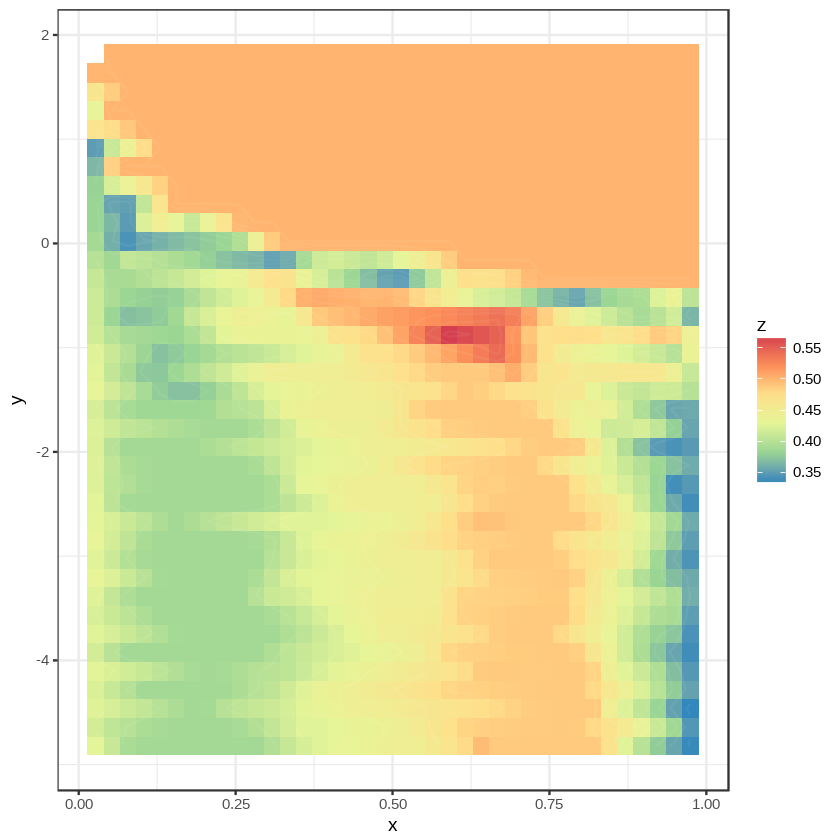

In [232]:
glmres = models$glmnet$results
graph.hyper(x=glmres$alpha, y=log10(glmres$lambda), z=glmres$ROC)

In [228]:
human.QFT.model = models$glmnet 

#### Figure 3A

[1] "This is the AUC:"
Area under the curve: 0.6387
[1] "This is the AUC p-value:"
[1] 0.9282259
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.4577-0.8196 (DeLong)
[1] "This is the AUC:"
Area under the curve: 0.5444
[1] "This is the AUC p-value:"
[1] 0.6401524
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.2654-0.8234 (DeLong)


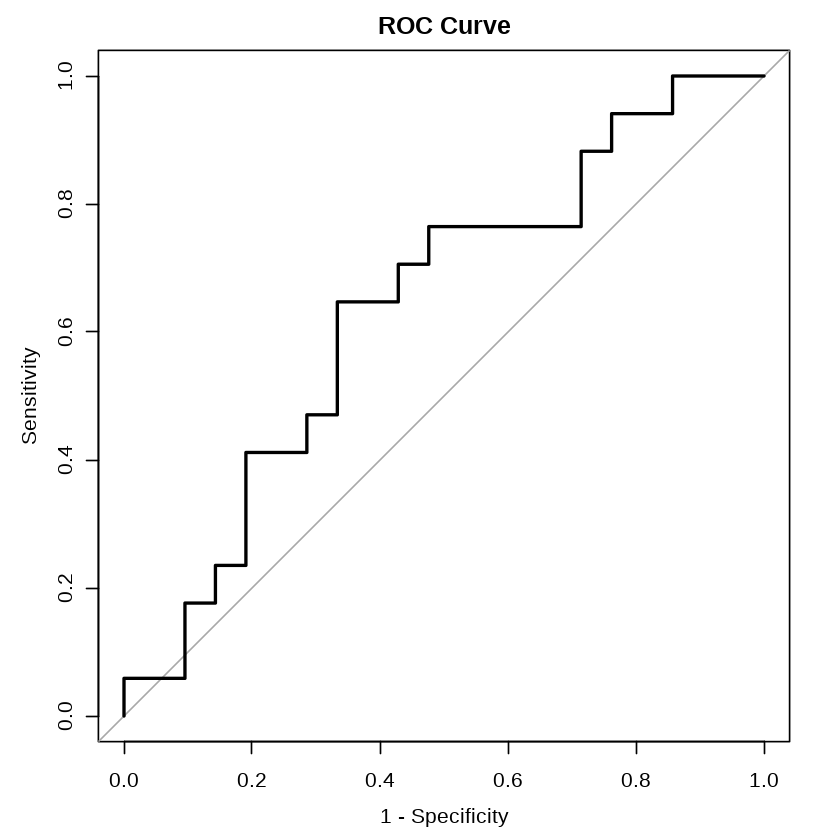

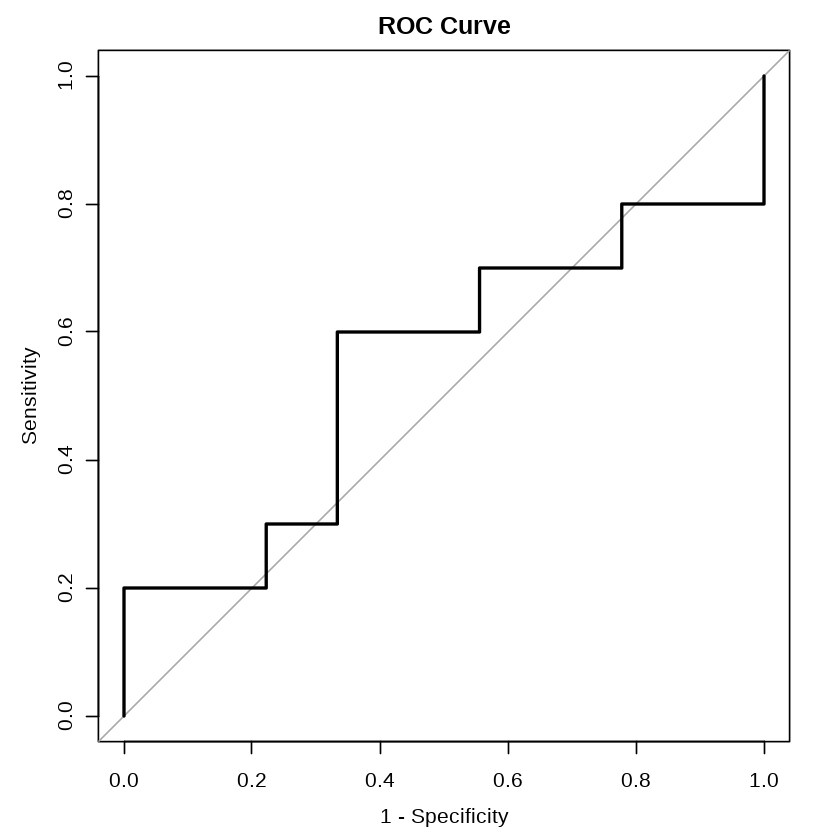

In [229]:
glmnet.human.QFT.val.ROC = my.roc(human.QFT.model$pred$early, human.QFT.model$pred$obs, "early")
       
pred.human.QFT.test = predict(human.QFT.model, newdata = ado.exprs.test, type="prob")

glmnet.human.QFT.test.ROC = my.roc(pred.human.QFT.test$early,
                          test.time.since.QFT.conversion,
                          "early")

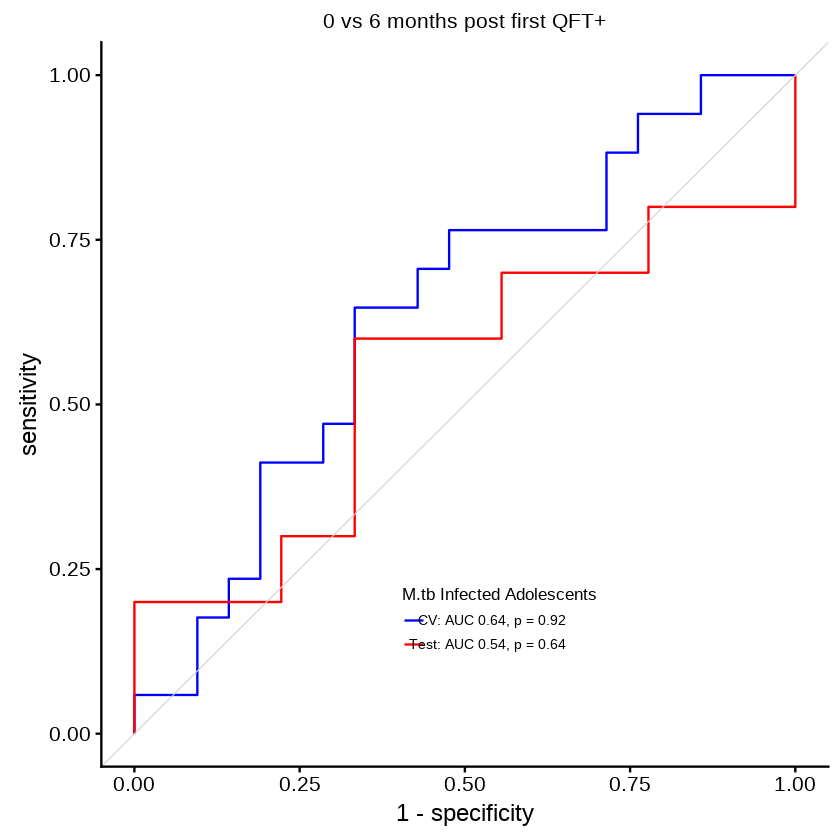

In [230]:
human.QFT.plot = ggroc(list(CV=glmnet.human.QFT.val.ROC, 
                                           test=glmnet.human.QFT.test.ROC), 
                                      legacy.axes=TRUE) +
                geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.25) + 
                ggtitle("0 vs 6 months post first QFT+") + theme(plot.title = element_text(size=12, face="plain")) +
                scale_color_manual(name="M.tb Infected Adolescents",
                                  labels=c("CV" =expression("CV: AUC 0.64, p = 0.92"),
                                           "test"=expression("Test: AUC 0.54, p = 0.64")),
                                  values=c("CV"="blue", "test"="red")) +
            theme(legend.position=c(0.40,0.20), legend.title = element_text(size=10), legend.text = element_text(size=8)) 
human.QFT.plot

### Load and preprocess data and prepare for machine learning for Figures 3B-D

In [46]:
source("utils_submission.R")

Sul.path = paste(path, "/data/GSE94438", sep="")

human.pheno.set = getGEO(filename=paste(Sul.path, "GSE94438_series_matrix.txt.gz", sep="/"),
             destdir=Sul.path)

human.pheno = filter.human.pheno(pData(human.pheno.set))

human.exprs.set = read.csv(file=paste(Sul.path, "GSE94438_rawCounts_GeneNames_AllSamples.csv", sep="/"), header=T, row.names = 1)
human.exprs = filter.human.exprs(human.exprs.set, human.pheno)

Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL11154 found here:
./data/GSE94438/GPL11154.soft 
Warning message in filter.human.pheno(pData(human.pheno.set)):
“NAs introduced by coercion”Warning message in filter.human.pheno(pData(human.pheno.set)):
“NAs introduced by coercion”Warning message in filter.human.pheno(pData(human.pheno.set)):
“NAs introduced by coercion”

           age code gender group site subjectid time.from.exposure.months
GSM2475704  NA  672     NA    NA   NA        NA                        NA
GSM2475705  NA  694     NA    NA   NA        NA                        NA
GSM2475706  NA  695     NA    NA   NA        NA                        NA
GSM2475722  NA  994     NA    NA   NA        NA                        NA
GSM2475742  NA 1061     NA    NA   NA        NA                        NA
GSM2475748  NA 1194     NA    NA   NA        NA                        NA
           time.to.tb.months
GSM2475704                NA
GSM2475705                NA
GSM2475706                NA
GSM2475722                NA
GSM2475742                NA
GSM2475748                NA
 [1] "GSM2475598" "GSM2475603" "GSM2475587" "GSM2475592" "GSM2475599"
 [6] "GSM2475604" "GSM2475360" "GSM2475387" "GSM2475362" "GSM2475389"
[11] "GSM2475402" "GSM2475555" "GSM2475361" "GSM2475388" "GSM2475359"
[16] "GSM2475390" "GSM2475588" "GSM2475593" "GSM2475591" "GSM2475596"

In [47]:
# Filter out genes whose counts are <= 5 in 50% of samples
exprs.j.keep = apply(human.exprs <= 5, 1, mean) <= 0.5

human.exprs.fil = human.exprs[exprs.j.keep,]

human.exprs.qn = as.data.frame(normalize.quantiles(as.matrix(human.exprs.fil)))
colnames(human.exprs.qn) = colnames(human.exprs.fil)
rownames(human.exprs.qn) = rownames(human.exprs.fil)
human.exprs.log = log2(human.exprs.qn + 1)

human.pheno.6mo = human.pheno

# Randomly sample 50% of AHRI site to training set and test set for this new human.pheno

AHRI.subj = unique(dplyr::filter(human.pheno, site == "AHRI")$subjectid)
set.seed(100)
AHRI.subj.train = sample(AHRI.subj, length(AHRI.subj) / 2)
human.pheno.6mo$dataset[human.pheno.6mo$subjectid %in% AHRI.subj.train] = "Training"

# Filter pheno and splice expression table to include only AHRI and MRC sites and to include only 0 and 6 month time points

human.pheno.6mo = droplevels(dplyr::filter(human.pheno.6mo, site %in% c("AHRI", "MRC"), time.from.exposure.months %in% c(0, 6)))
human.pheno.6mo$status = ifelse(human.pheno.6mo$group == "Control", "control", "progressor")

human.exprs.log.6mo = human.exprs.log[, colnames(human.exprs.log) %in% human.pheno.6mo$code]

dim(human.pheno.6mo)
dim(human.exprs.log.6mo)
head(human.pheno.6mo)
head(human.exprs.log.6mo)

human.pheno.6mo.train = droplevels(dplyr::filter(human.pheno.6mo, dataset == "Training"))
human.pheno.6mo.test = droplevels(dplyr::filter(human.pheno.6mo, dataset != "Training"))

human.exprs.train = t(human.exprs.log.6mo[,as.character(human.pheno.6mo.train$code)])
human.exprs.test = t(human.exprs.log.6mo[, as.character(human.pheno.6mo.test$code)])

set.seed(100)
folds.6mo = groupKFold(human.pheno.6mo.train$subjectid, k=10)
for (fold in lapply(folds.6mo, function(x) {human.pheno.6mo.train$subjectid[x]}))
    print(length((as.character(fold))))

lapply(folds.6mo, function(x, y) table(y[x]), y = human.pheno.6mo.train$subjectid)


[1] 183  10

[1] 14842   183

age code gender group     site subjectid time.from.exposure.months
1 21  231  F      case (TB) AHRI KHHC151   6                        
2 20  235  F      case (TB) AHRI ARHHC63   6                        
3 26  248  M      case (TB) MRC  07/G300   0                        
4 37  267  M      Control   MRC  07/G354   0                        
5 52  270  M      Control   MRC  07/G419   0                        
6 16  272  M      case (TB) MRC  08/G245   6                        
  time.to.tb.months dataset  status    
1 14                Training progressor
2 15                Test     progressor
3 10                Training progressor
4 NA                Training control   
5 NA                Training control   
6 21                Training progressor

231       235       248       267       270       272      
ENSG00000000003  3.826839  5.279328  2.217418  3.662508  3.885174  2.970809
ENSG00000000419 10.121752 10.581316  9.294640  9.041296  9.401630  8.575936
ENSG00000000457  9.459834  8.883254  9.519146  9.757906  9.430516  9.547550
ENSG00000000460  6.416530  6.349474  6.880727  6.929954  6.691453  7.306078
ENSG00000000938 15.108717 14.928224 15.240641 14.853718 14.983593 15.225416
ENSG00000000971  6.363433  3.774454  5.468685  8.320455  7.171517  4.327480
                277       280       285       287       ⋯ 1039      1040     
ENSG00000000003  4.176669  3.862171  5.404434  5.123012 ⋯  3.180125  3.511572
ENSG00000000419  9.333196  8.252973  8.657032  9.411003 ⋯  9.264556  8.536755
ENSG00000000457  9.566795  9.662788  9.785935  9.889297 ⋯  9.833115  9.669295
ENSG00000000460  6.617279  6.199483  6.889960  6.757782 ⋯  6.474170  6.603600
ENSG00000000938 14.213299 15.136584 15.240641 14.811619 ⋯ 14.876220 15.194902
ENSG00000000971  6.725656  4.918202  6.291429  5.876739 ⋯  4.470137  4.897124
                1042      1061      1062      1084      1103      1164     
ENSG00000000003  3.050806  4.116613  4.390661  3.430704  3.462273  3.820456
ENSG00000000419  8.565981  9.309794  9.017231  9.191936  8.375149  9.565224
ENSG00000000457  9.875289  9.878426  9.429308  9.901105  9.736088  9.484452
ENSG00000000460  5.668603  5.783255  6.526940  6.760125  6.606920  6.516270
ENSG00000000938 15.136584 14.916084 15.413775 15.588929 15.288608 15.280180
ENSG00000000971  6.403551  3.435532  6.407795  6.964143  6.228401  5.672357
                1196      1198     
ENSG00000000003  3.981523  4.013839
ENSG00000000419  8.902844  8.801773
ENSG00000000457  9.909653  9.569499
ENSG00000000460  6.182759  7.985547
ENSG00000000938 15.304140 14.842417
ENSG00000000971  5.804559  3.141842

[1] 112
[1] 107
[1] 98
[1] 99
[1] 101
[1] 103
[1] 102
[1] 103
[1] 105
[1] 105


$Fold01

  07/G189   07/G274   07/G277   07/G300   07/G351   07/G354   07/G368   07/G370 
        1         1         1         0         1         1         1         1 
  07/G419   08/G136   08/G141   08/G160   08/G245   08/G260   08/G324   08/G333 
        1         1         1         1         1         2         2         1 
  08/G343   08/G367   08/G400   08/G407   08/G415   08/G423   08/G424   08/G433 
        1         2         1         1         1         1         1         2 
  08/G493   08/G494   08/G541   08/G587   08/G596   08/G606   08/G613   08/G643 
        1         1         1         1         1         1         1         1 
  08/G652   08/G654   08/G695   08/G701   08/G703   08/G714   08/G715   08/G726 
        2         1         1         1         2         1         1         1 
  08/G782   08/G788   08/G797   08/G800   08/G810   08/G814   08/G893   09/G120 
        1         1         2         1         1         1         1         1 
  09/G133   09/G135

### Filter genes that differ between 0 and 6 month time points with Wilcoxon test

In [48]:
start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

print("Made the clusters")

myFunc <- caretSBF
myFunc$summary <- twoClassSummary
myFunc$score <- function(x, y) {
  out <- wilcox.test(x ~ y)$p.value
  out
}

filtercontrol.lm = sbfControl(functions = myFunc, method = "cv",  index=folds.6mo,  allowParallel=TRUE) 
set.seed(10)
wilcoxWithFilter.lm = sbf(human.exprs.train, as.factor(human.pheno.6mo.train$time.from.exposure.months), sbfControl = filtercontrol.lm)
print("Did the feature selection")
stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "Made the clusters"
[1] "Did the feature selection"
Time difference of 11.18471 mins


In [49]:
optvars = wilcoxWithFilter.lm$optVariables

In [50]:
length(optvars)

[1] 2524

### Perform hyperparameter search on training set to discriminate 0 and 6 month time points post exposure

In [51]:
set.seed(100)

n = 1000
lambda.grid = c(10 ^ runif(n, min = log10(1e-6), max = log10(1e2)))

alpha.grid = runif(length(lambda.grid), min = 0.00, 1.00)

train.grid = data.frame(lambda = sample(lambda.grid, length(lambda.grid)),
                       alpha = sample(alpha.grid, length(lambda.grid)))


In [52]:
time.period.from.exposure = as.factor(ifelse(human.pheno.6mo.train$time.from.exposure.months == "0", "early", "late"))
test.time.period.from.exposure = as.factor(ifelse(human.pheno.6mo.test$time.from.exposure.months == "0", "early", "late"))

In [53]:
seed=7

start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("glmnet")

models = list()


control <- trainControl(method="cv", index=folds.6mo, savePredictions = 'final', allowParallel=TRUE,
                       classProbs=TRUE, summaryFunction=twoClassSummary) # Use AUC to pick the best model

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(human.exprs.train[, colnames(human.exprs.train) %in% c(optvars)],
                  time.period.from.exposure,
                  method=alg, tuneGrid = train.grid, trControl=control,
                 metric="ROC")
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Time difference of 1.975652 mins


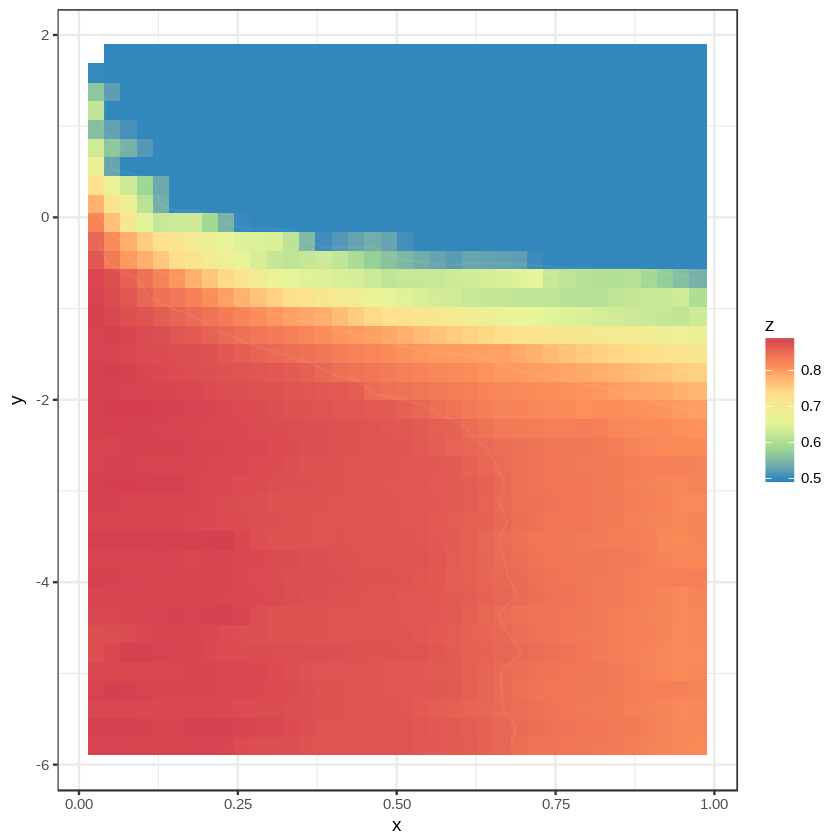

In [54]:
glmres = models$glmnet$results
graph.hyper(glmres$alpha, log10(glmres$lambda), glmres$ROC)

### Figure 3C

[1] "This is the AUC:"
Area under the curve: 0.8986
[1] "This is the AUC p-value:"
[1] 1.822595e-13
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.8418-0.9554 (DeLong)
[1] "This is the AUC:"
Area under the curve: 0.6879
[1] "This is the AUC p-value:"
[1] 0.003761691
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.561-0.8148 (DeLong)


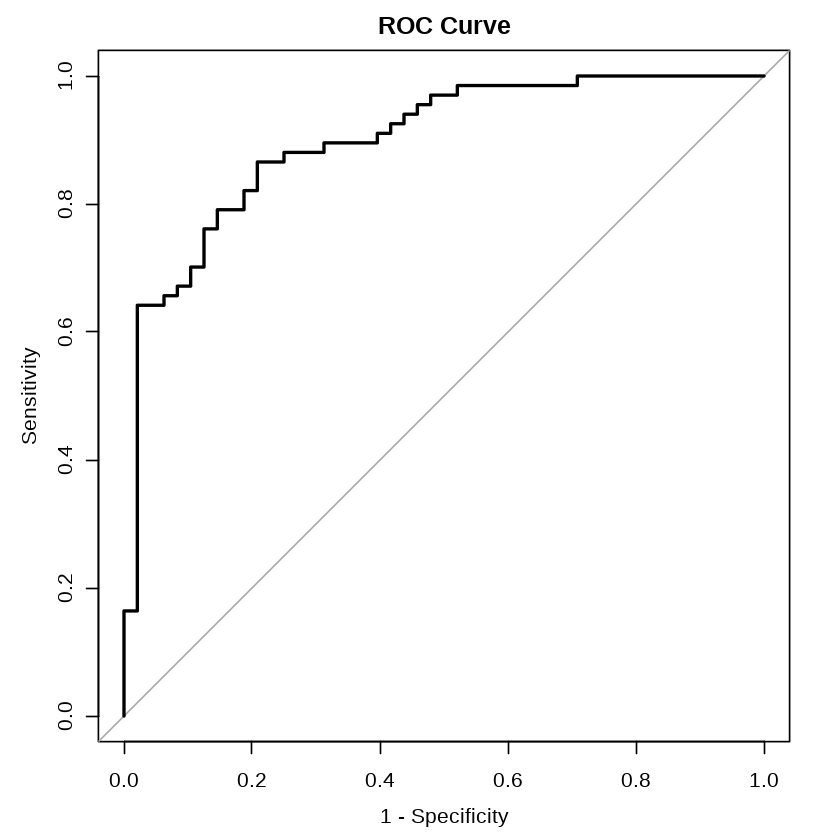

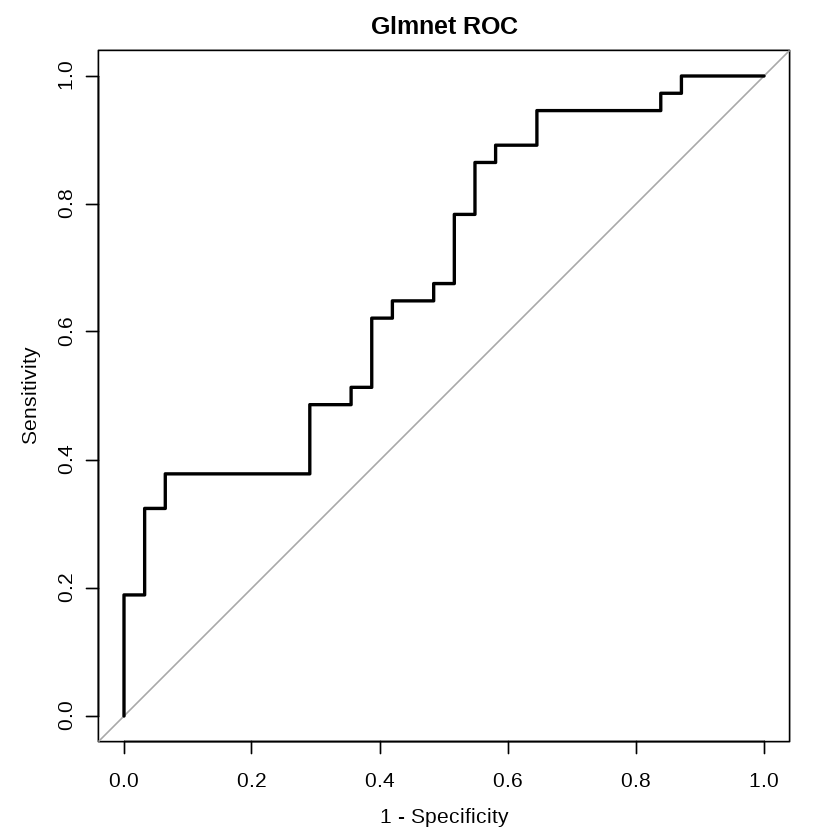

In [55]:
human.exposure.model = models$glmnet

glmnet.human.exposure.val.ROC = my.roc(human.exposure.model$pred$early, human.exposure.model$pred$obs, "early")

pred.human.exposure.test.prob = predict(human.exposure.model, newdata = human.exprs.test[, colnames(human.exprs.test) %in% c(optvars)], type="prob")

glmnet.human.exposure.test.ROC <- my.roc(pred.human.exposure.test.prob$early,
                        test.time.period.from.exposure,
                     "early", title="Glmnet ROC")

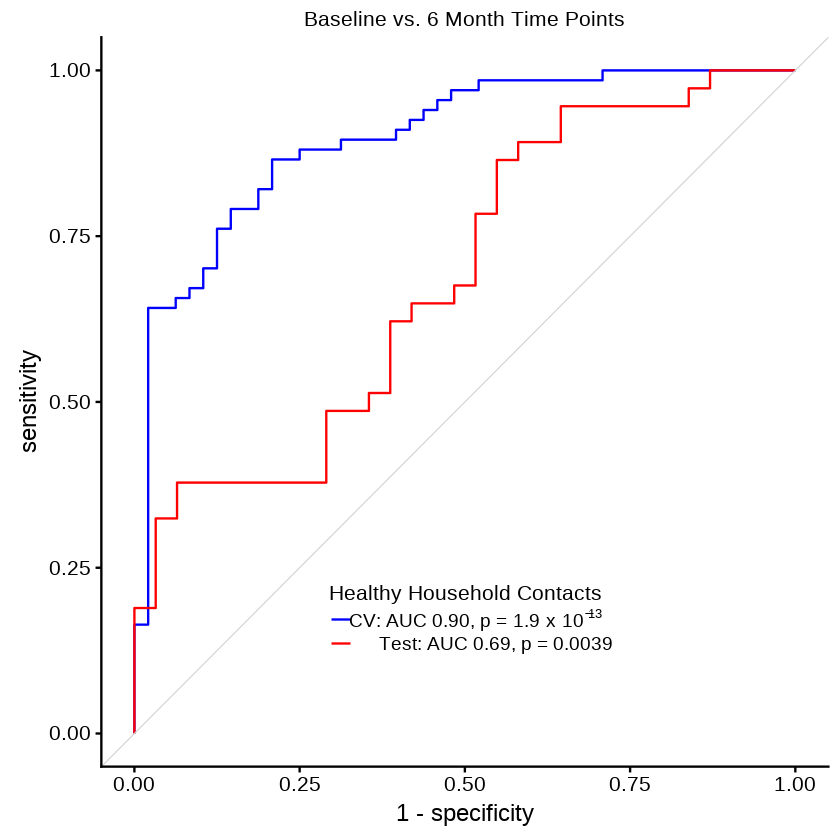

In [56]:
human.exposure.plot = ggroc(list(CV=glmnet.human.exposure.val.ROC, 
                                           test=glmnet.human.exposure.test.ROC), 
                                      legacy.axes=TRUE) +
                geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.25) + 
                ggtitle("Baseline vs. 6 Month Time Points") + theme(plot.title = element_text(size=12, face="plain")) +
                scale_color_manual(name="Healthy Household Contacts",
                                  labels=c("CV" =expression("CV: AUC 0.90, p ="~1.9~ "x" ~10^{-13} ~ " "),
                                           "test"=expression("Test: AUC 0.69, p = 0.0039")),
                                  values=c("CV"="blue", "test"="red")) +
            theme(legend.position=c(0.30,0.20), legend.title = element_text(size=12), legend.text = element_text(size=11)) 
human.exposure.plot

### Reproduce Figure 3B, showing that published signatures of risk of TB do not predict time since exposure

#### Load the data (must load previous human data beforehand) and train the models

In [57]:
Sul.genes = c("GAS6", "SEPT4", "CD1C", "BLK")
Sul.genes.sel = c("C1QC", "TRAV27", "ANRKD22", "OSBPL10")

ACS.genes = c("ANKRD22",
 "APOL1",
 "BATF2",
 "ETV7",
 "FCGR1A",
 "FCGR1B",
 "GBP1",
 "GBP2",
 "GBP4",
 "GBP5",
 "SCARF1",
 "SEPT4",
 "SERPING1",
 "STAT1",
 "TAP1",
 "TRAFD1"
)

ACS.transcripts = row.names(human.exprs.set)[match(unique(ACS.genes), human.exprs.set$symbol)]
Sul.transcripts = row.names(human.exprs.set)[match(unique(Sul.genes), human.exprs.set$symbol)]
Sul.transcripts.sel = row.names(human.exprs.set)[match(unique(Sul.genes.sel), human.exprs.set$symbol)]

human.exprs.train.ACS = human.exprs.train[, colnames(human.exprs.train) %in% ACS.transcripts]
human.exprs.train.Sul = human.exprs.train[, colnames(human.exprs.train) %in% Sul.transcripts]
human.exprs.train.Sul.sel = human.exprs.train[, colnames(human.exprs.train) %in% Sul.transcripts.sel]

human.exprs.test.ACS = human.exprs.test[, colnames(human.exprs.test) %in% ACS.transcripts]
human.exprs.test.Sul = human.exprs.test[, colnames(human.exprs.test) %in% Sul.transcripts]
human.exprs.test.Sul.sel = human.exprs.test[, colnames(human.exprs.test) %in% Sul.transcripts.sel]

human.exprs.train.TB.genes = human.exprs.train[, colnames(human.exprs.train) %in% c(ACS.transcripts,
                                                                                    Sul.transcripts,
                                                                                    Sul.transcripts.sel)]
human.exprs.test.TB.genes = human.exprs.test[, colnames(human.exprs.test) %in% c(ACS.transcripts,
                                                                                    Sul.transcripts,
                                                                                    Sul.transcripts.sel)]

time.period.from.exposure = as.factor(ifelse(human.pheno.6mo.train$time.from.exposure.months == "0", "early", "late"))
test.time.period.from.exposure = as.factor(ifelse(human.pheno.6mo.test$time.from.exposure.months == "0", "early", "late"))

In [58]:
seed=7

start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("glmnet")

models = list()

control <- trainControl(method="cv", index=folds.6mo, search="random", savePredictions = 'final', allowParallel=TRUE,
                       classProbs=TRUE, summaryFunction=twoClassSummary) # Use AUC to pick the best model

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(human.exprs.train.ACS, 
                  as.factor(time.period.from.exposure), 
                  method=alg, tuneLength=30, trControl=control,
                 metric="ROC")
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Time difference of 37.82896 secs


In [59]:
ACS.human.exposure.model = models$glmnet

In [60]:
seed=7


start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("glmnet")

models = list()

control <- trainControl(method="cv", index=folds.6mo, search="random", savePredictions = 'final', allowParallel=TRUE,
                       classProbs=TRUE, summaryFunction=twoClassSummary) # Use AUC to pick the best model

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(human.exprs.train.Sul, 
                  as.factor(time.period.from.exposure), 
                  method=alg, tuneLength=30, trControl=control,
                 metric="ROC")
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Time difference of 41.31243 secs


In [61]:
RISK4.human.exposure.model =models$glmnet

In [62]:
seed=7


start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("glmnet")

models = list()


control <- trainControl(method="cv", index=folds.6mo, search="random", savePredictions = 'final', allowParallel=TRUE,
                       classProbs=TRUE, summaryFunction=twoClassSummary) # Use AUC to pick the best model

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(human.exprs.train.Sul.sel, 
                  as.factor(time.period.from.exposure), 
                  method=alg, tuneLength=30, trControl=control,
                 metric="ROC")
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Time difference of 39.97914 secs


In [63]:
Sul.sel.human.exposure.model = models$glmnet

In [64]:
seed=7


start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("glmnet")

models = list()


control <- trainControl(method="cv", index=folds.6mo, search="random", savePredictions = 'final', allowParallel=TRUE,
                       classProbs=TRUE, summaryFunction=twoClassSummary) # Use AUC to pick the best model

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(human.exprs.train.TB.genes, 
                  as.factor(time.period.from.exposure), 
                  method=alg, tuneLength=30, trControl=control,
                 metric="ROC")
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Time difference of 41.07911 secs


In [65]:
TB.genes.human.exposure.model = models$glmnet

#### Figure 3B

[1] "This is the AUC:"
Area under the curve: 0.5815
[1] "This is the AUC p-value:"
[1] 0.1269821
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.4387-0.7243 (DeLong)


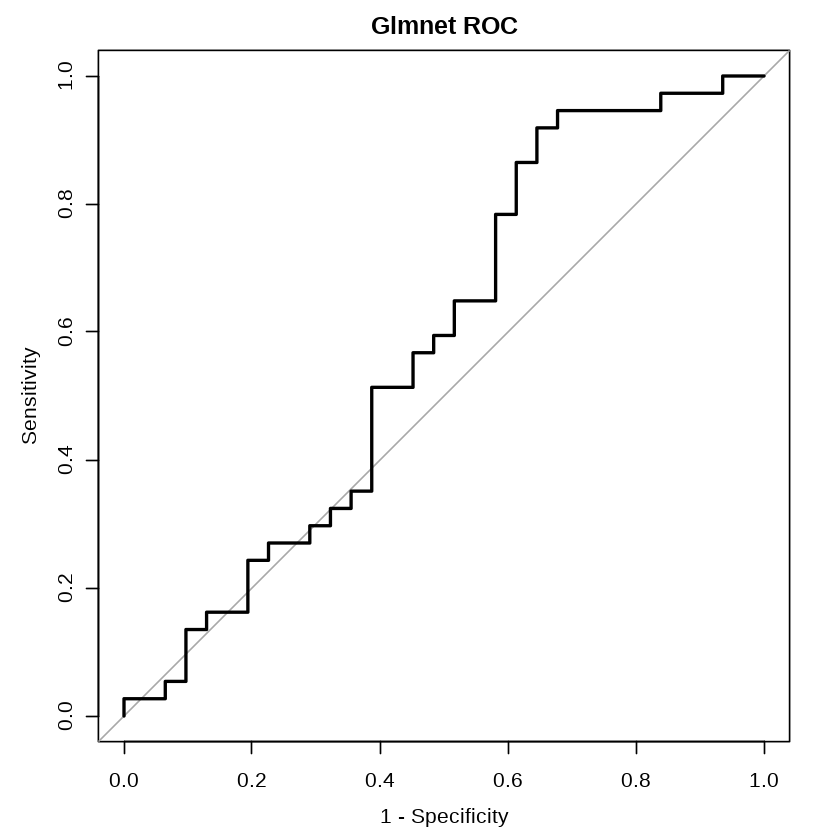

In [66]:
pred.human.test.ACS.exposure = predict(ACS.human.exposure.model, newdata = human.exprs.test.ACS, type="prob")

glmnet.human.test.ACS.exposure.ROC <- my.roc(pred.human.test.ACS.exposure$early,
                        test.time.period.from.exposure,
                     "early", title="Glmnet ROC")

[1] "This is the AUC:"
Area under the curve: 0.5527
[1] "This is the AUC p-value:"
[1] 0.7724687
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.4103-0.6952 (DeLong)


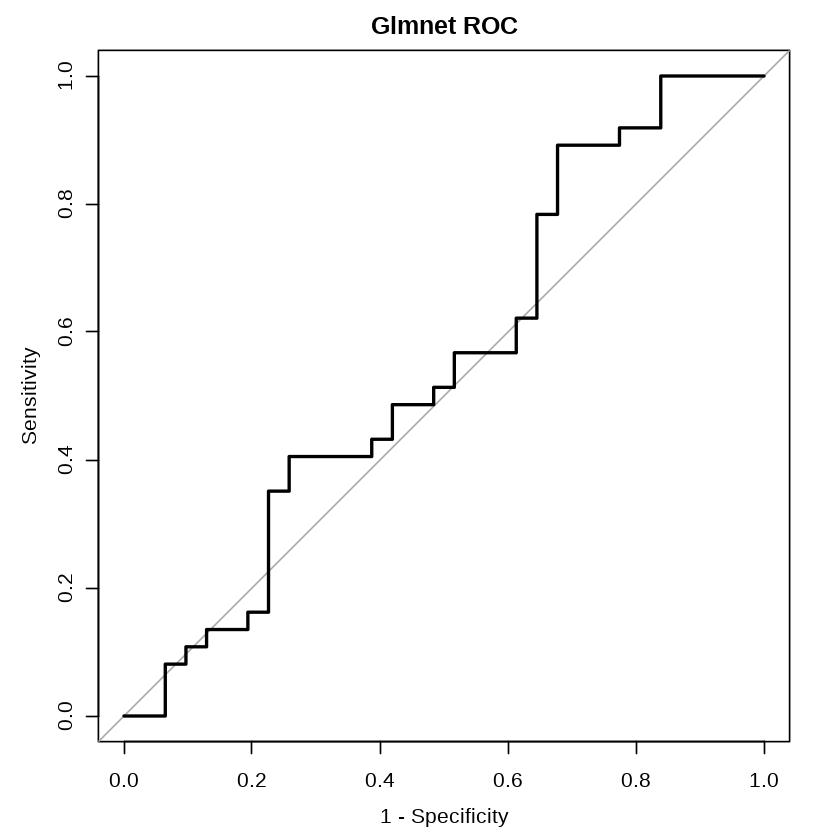

In [67]:
pred.human.test.RISK4.exposure = predict(RISK4.human.exposure.model, newdata = human.exprs.test.Sul , type="prob")

glmnet.human.test.RISK4.exposure.ROC <- my.roc(pred.human.test.RISK4.exposure$early,
                        test.time.period.from.exposure,
                     "early", title="Glmnet ROC")

[1] "This is the AUC:"
Area under the curve: 0.5514
[1] "This is the AUC p-value:"


Warning message in wilcox.test.default(pred[obs == 1], pred[obs == 0], alternative = "great"):
“cannot compute exact p-value with ties”

[1] 0.2356543
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.4123-0.6905 (DeLong)


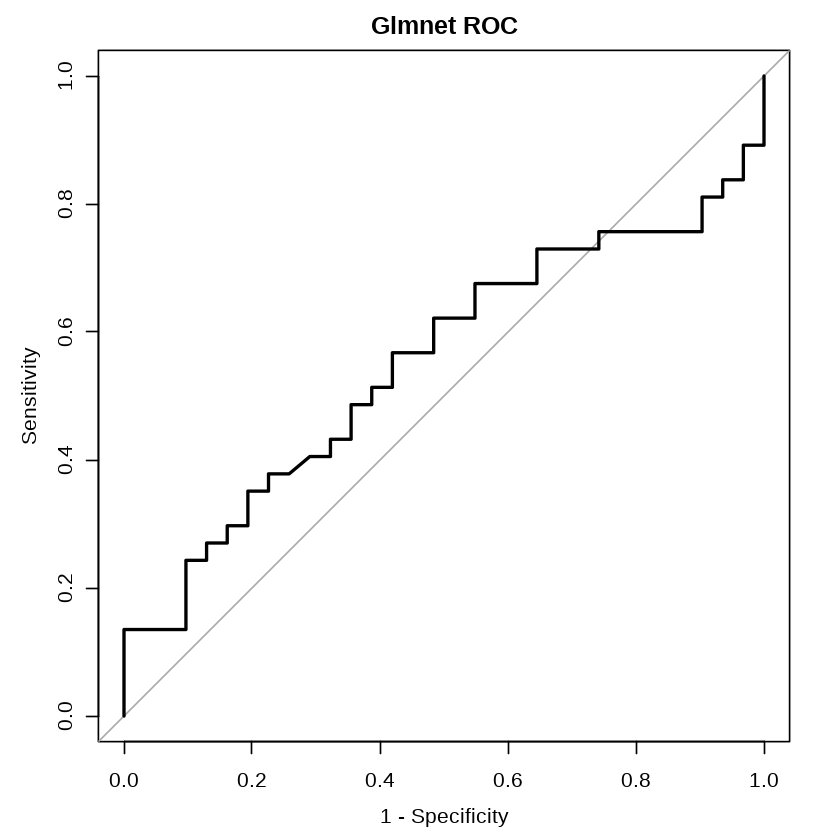

In [68]:
pred.human.test.Sul.sel.exposure = predict(Sul.sel.human.exposure.model, newdata = human.exprs.test.Sul.sel , type="prob")

glmnet.human.test.Sul.sel.exposure.ROC <- my.roc(pred.human.test.Sul.sel.exposure$early,
                        test.time.period.from.exposure,
                     "early", title="Glmnet ROC")

[1] "This is the AUC:"
Area under the curve: 0.5623
[1] "This is the AUC p-value:"
[1] 0.1921917
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.4197-0.7049 (DeLong)


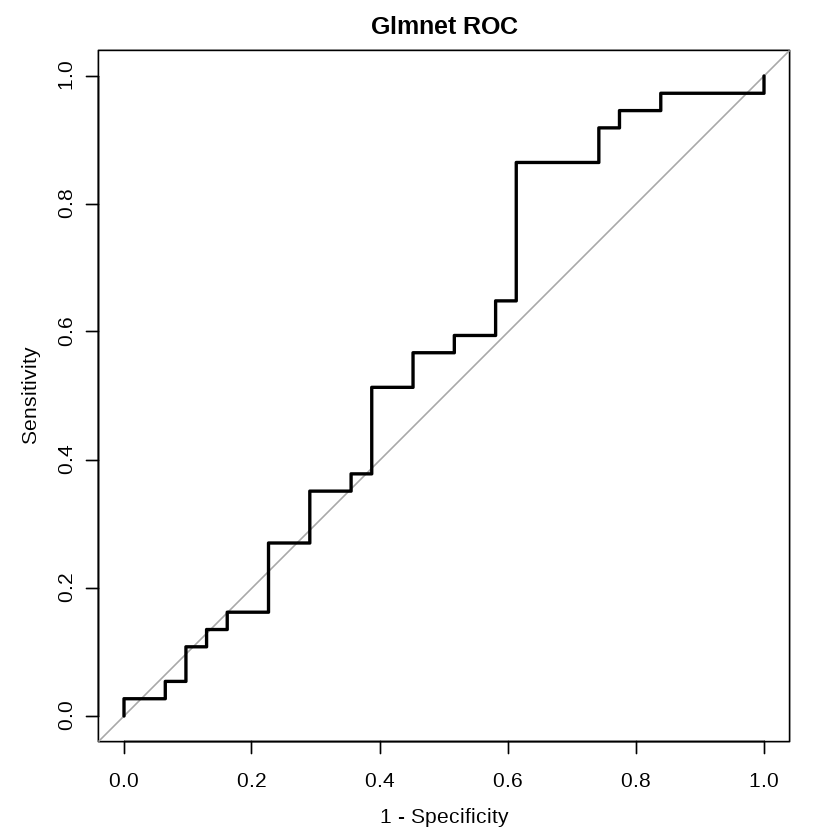

In [69]:
pred.human.test.TB.genes.exposure = predict(TB.genes.human.exposure.model, newdata = human.exprs.test.TB.genes , type="prob")

glmnet.human.test.TB.genes.exposure.ROC <- my.roc(pred.human.test.TB.genes.exposure$early,
                        test.time.period.from.exposure,
                     "early", title="Glmnet ROC")

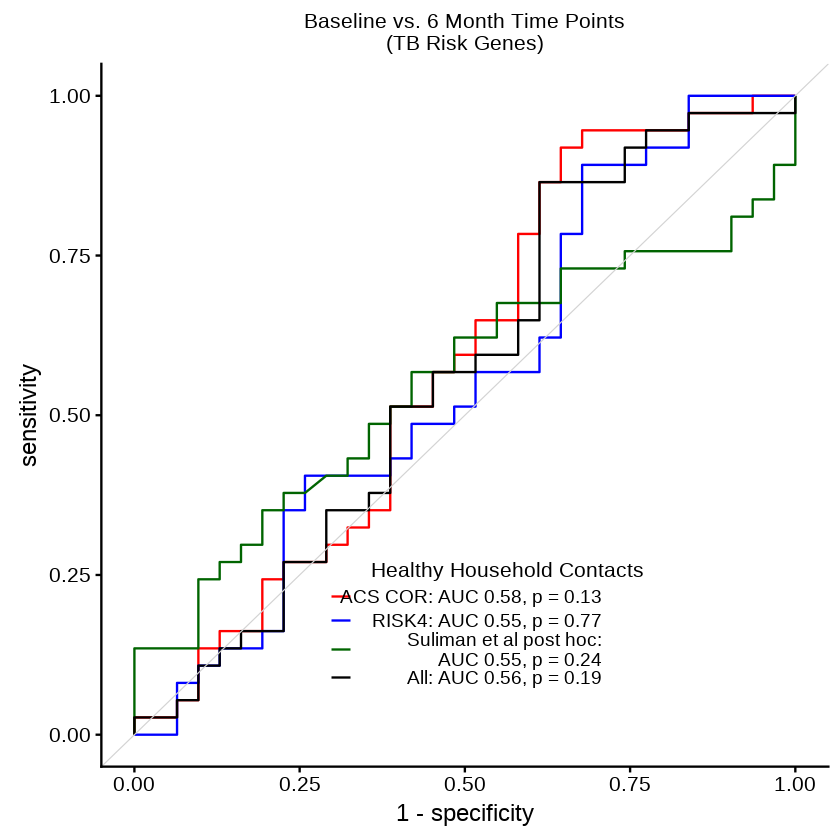

In [70]:
human.riskgenes.exposure.plot = ggroc(list(ACS=glmnet.human.test.ACS.exposure.ROC, 
                                           RISK4=glmnet.human.test.RISK4.exposure.ROC,
                                            Sel=glmnet.human.test.Sul.sel.exposure.ROC,
                                          TB=glmnet.human.test.TB.genes.exposure.ROC), 
                                      legacy.axes=TRUE) +
                geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.25) + 
                ggtitle("Baseline vs. 6 Month Time Points\n(TB Risk Genes)") + theme(plot.title = element_text(size=12, face="plain")) +
                scale_color_manual(name="       Healthy Household Contacts", 
                                  labels=c("ACS" =expression("ACS COR: AUC 0.58, p = 0.13"),
                                           "RISK4"=expression("RISK4: AUC 0.55, p = 0.77"),
                                           "Sel"=expression("Suliman et al post hoc:\nAUC 0.55, p = 0.24"),
                                          "TB"=expression("All: AUC 0.56, p = 0.19")),
                                  values=c("ACS"="red", "RISK4"="blue", "Sel"="darkgreen", "TB"="black")) +
            theme(legend.position=c(0.30,0.20), legend.title = element_text(size=12), legend.text = element_text(size=11))  
human.riskgenes.exposure.plot

### Reproduce Figure 3D, showing that the genes in our signature of time since exposure cannot predict risk of TB in the GC6-74 cohort.

#### Select the genes in our signature and train a model with these genes to predict risk of TB progression.

In [158]:
human.exposure.glmnet = human.exposure.model$finalModel

coefs.human.6mo = coef(human.exposure.glmnet , s=models$glmnet$bestTune$lambda)

nonzero.coefs.r = data.frame(name = coefs.human.6mo@Dimnames[[1]][coefs.human.6mo@i + 1], coefficient = coefs.human.6mo@x)
sort.coeffs.r = nonzero.coefs.r[order(-abs(nonzero.coefs.r$coefficient)), ]#, sort(abs(nonzero.coefs$coefficient), T)

genes.coefs.r = sort.coeffs.r$name[2:length(sort.coeffs.r$name)]

In [159]:
length(genes.coefs.r)

[1] 254

In [161]:
set.seed(100)

n = 1000
lambda.grid = c(10 ^ runif(n, min = log10(1e-6), max = log10(1e2)))

alpha.grid = runif(length(lambda.grid), min = 0.00, 1.00)

train.grid = data.frame(lambda = sample(lambda.grid, length(lambda.grid)),
                       alpha = sample(alpha.grid, length(lambda.grid)))


In [162]:
seed=7

start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("glmnet")

models = list()


control <- trainControl(method="cv", index=folds.6mo, savePredictions = 'final', allowParallel=TRUE,
                       classProbs=TRUE, summaryFunction=twoClassSummary) # Use AUC to pick the best model

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(human.exprs.train[,colnames(human.exprs.train) %in% as.character(genes.coefs.r)], 
                  as.factor(human.pheno.6mo.train$status), 
                  method=alg, tuneGrid = train.grid, trControl=control,
                 metric="ROC")
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Time difference of 57.74353 secs


In [163]:
human.TB.from.exposure.model = models$glmnet
exposure.genes = genes.coefs.r

#### Figure 3D

Confusion Matrix and Statistics

            Reference
Prediction   control progressor
  control         83         32
  progressor       0          0
                                          
               Accuracy : 0.7217          
                 95% CI : (0.6305, 0.8013)
    No Information Rate : 0.7217          
    P-Value [Acc > NIR] : 0.5475          
                                          
                  Kappa : 0               
 Mcnemar's Test P-Value : 4.251e-08       
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.7217          
             Prevalence : 0.2783          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : progressor      
                                

Confusion Matrix and Statistics

            Reference
Prediction   control progressor
  control         52         16
  progressor       0          0
                                          
               Accuracy : 0.7647          
                 95% CI : (0.6462, 0.8591)
    No Information Rate : 0.7647          
    P-Value [Acc > NIR] : 0.5665583       
                                          
                  Kappa : 0               
 Mcnemar's Test P-Value : 0.0001768       
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.7647          
             Prevalence : 0.2353          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : progressor      
                                

[1] "This is the AUC:"
Area under the curve: 0.5693
[1] "This is the AUC p-value:"
[1] 0.8752258
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.4409-0.6977 (DeLong)
[1] "This is the AUC:"
Area under the curve: 0.6322
[1] "This is the AUC p-value:"
[1] 0.05669511
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.4645-0.7999 (DeLong)


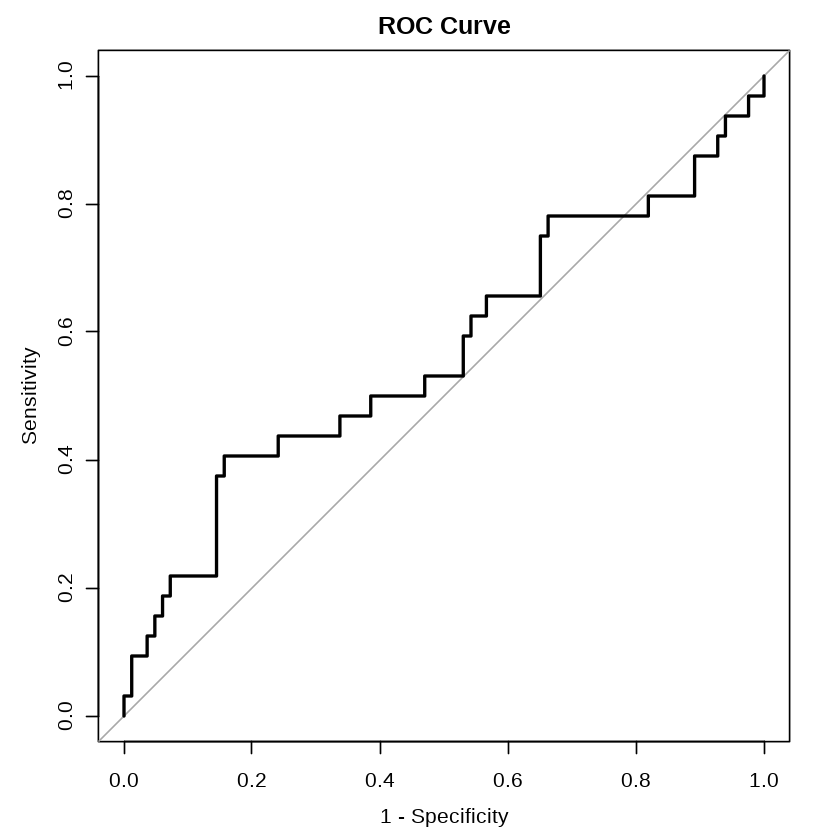

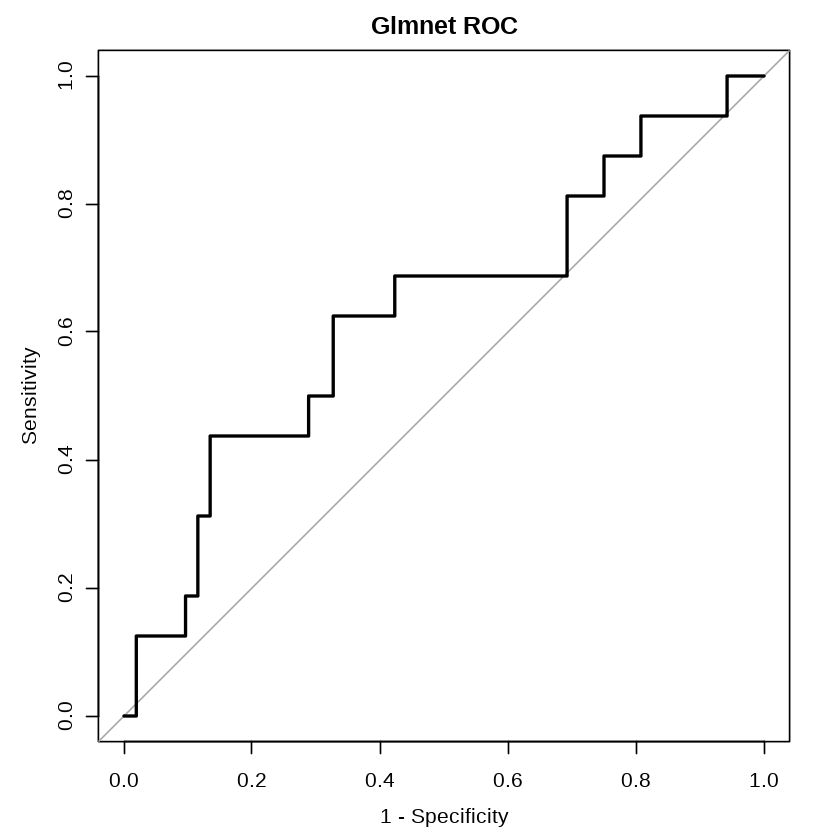

In [166]:
pred.human.TB.from.exposure.test = predict(human.TB.from.exposure.model, newdata = human.exprs.test[,colnames(human.exprs.test) %in% as.character(exposure.genes)])


confusionMatrix(human.TB.from.exposure.model$pred$pred, human.TB.from.exposure.model$pred$obs, positive= "progressor")
confusionMatrix(pred.human.TB.from.exposure.test, as.factor(human.pheno.6mo.test$status), positive = "progressor")

glmnet.human.TB.from.exposure.val.ROC = my.roc(human.TB.from.exposure.model$pred$progressor, human.TB.from.exposure.model$pred$obs, "progressor")

pred.human.TB.from.exposure.test.prob = predict(human.TB.from.exposure.model, newdata = human.exprs.test[,colnames(human.exprs.test) %in% as.character(exposure.genes)], type="prob")

glmnet.human.TB.from.exposure.test.ROC <- my.roc(pred.human.TB.from.exposure.test.prob$progressor,
                        as.factor(human.pheno.6mo.test$status),
                     "progressor", title="Glmnet ROC")

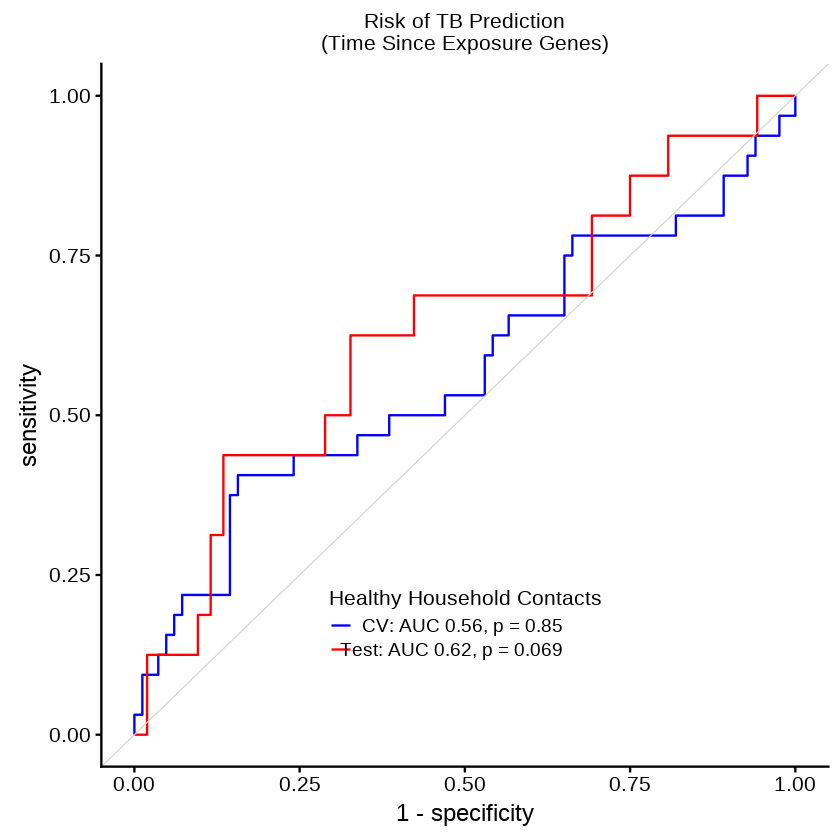

In [165]:
human.TB.from.exposure.plot = ggroc(list(CV=glmnet.human.TB.from.exposure.val.ROC , 
                                           test=glmnet.human.TB.from.exposure.test.ROC ), 
                                      legacy.axes=TRUE) +
                geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.25) + 
                ggtitle("Risk of TB Prediction\n(Time Since Exposure Genes)") + theme(plot.title = element_text(size=12, face="plain")) +
                scale_color_manual(name="Healthy Household Contacts",
                                  labels=c("CV" =expression("CV: AUC 0.56, p = 0.85"),
                                           "test"=expression("Test: AUC 0.62, p = 0.069")),
                                  values=c("CV"="blue", "test"="red")) +
            theme(legend.position=c(0.30,0.20), legend.title = element_text(size=12), legend.text = element_text(size=11)) 
human.TB.from.exposure.plot

## Figure 4 Human Analysis (Grand Challenges 6-74 cohort)

- This code reproduces the cell-type analysis of Figure 4, showing that "Time since TB exposure in humans is associated with alteration in CD4+ T cell proportion and immune activation pathways."
- The Ingenuity Pathway Analysis for Figure 5E is excluded (commercial software)

### Load and Install Required Libraries

- If the whole notebook is run in one sitting, loading MetaIntegrator may give a `maximal number of DLLs reached...` error. In this case, simply restart the notebook and run this Figure 4 code alone. It does not depend upon any other code in the notebook.

In [5]:
path="."  # this is the TB repository folder

In [7]:
source("https://bioconductor.org/biocLite.R")

if (!require("preprocessCore")) {
  biocLite("preprocessCore")
  library("preprocessCore")
}

if (!require("limma")) {
  biocLite("limma")
  library("limma")
}

if (!require("biomaRt")) {
  biocLite("biomaRt")
  library("biomaRt")
}

if (!require("GEOquery")) {
  biocLite("GEOquery")
  library("GEOquery")
}

if (!require("ggplot2")) {
  install.packages("ggplot2")
  library("ggplot2")
}


if (!require("dplyr")) {
  install.packages("dplyr")
  library("dplyr")
}

if (!require("ggsignif")) {
  install.packages("ggsignif")
  library("ggsignif")
}

if (!require("cowplot")) {
  install.packages("cowplot")
  library("cowplot")
}

if (!require("tmod")) {
  install.packages("tmod")
  library("tmod")
}

if (!require("disco")) {
  install.packages("disco")
  library("disco")
}

if (!require("sva")) {
  biocLite("sva")
  library("sva")
}

if (!require("lme4")) {
  install.packages("lme4")
  library("lme4")
}

if (!require("lmerTest")) {
  install.packages("lmerTest")
  library("lmerTest")
}

if (!require("MetaIntegrator")) {
    
  # First install several dependencies required by MetaIntegrator 2.0.0
    if (!require("multtest")) {
      biocLite("multtest")
      library("multtest")
    }

    if (!require("GEOmetadb")) {
      biocLite("GEOmetadb")
      library("GEOmetadb")
    }
    
    if (!require("biomaRt")) {
      biocLite("biomaRt")
      library("biomaRt")
    }
    
    install.packages(c("ggpubr", "ROCR", "pracma", "COCONUT" , "Metrics", "manhattanly", "snplist", "DT", "pheatmap", "HGNChelper"))
    
    # Now install MetaIntegrator. Version 2.0.0 is required to use ImmunoStates
    packageUrl = "https://cran.r-project.org/src/contrib/MetaIntegrator_2.0.0.tar.gz"
    install.packages(packageUrl, repos=NULL, type='source')
    library("MetaIntegrator")
}

data(tmod)

ERROR: Error: With R version 3.5 or greater, install Bioconductor packages using BiocManager; see https://bioconductor.org/install


In [2]:
#source("https://bioconductor.org/BiocManager::install.R")
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

if (!require("preprocessCore")) {
  BiocManager::install("preprocessCore")
  library("preprocessCore")
}

if (!require("limma")) {
  BiocManager::install("limma")
  library("limma")
}

if (!require("biomaRt")) {
  BiocManager::install("biomaRt")
  library("biomaRt")
}

if (!require("GEOquery")) {
  BiocManager::install("GEOquery")
  library("GEOquery")
}

if (!require("ggplot2")) {
  install.packages("ggplot2")
  library("ggplot2")
}


if (!require("dplyr")) {
  install.packages("dplyr")
  library("dplyr")
}

if (!require("ggsignif")) {
  install.packages("ggsignif")
  library("ggsignif")
}

if (!require("cowplot")) {
  install.packages("cowplot")
  library("cowplot")
}

if (!require("tmod")) {
  install.packages("tmod")
  library("tmod")
}

if (!require("disco")) {
  install.packages("disco")
  library("disco")
}

if (!require("sva")) {
  BiocManager::install("sva")
  library("sva")
}

if (!require("lme4")) {
  install.packages("lme4")
  library("lme4")
}

if (!require("lmerTest")) {
  install.packages("lmerTest")
  library("lmerTest")
}

if (!require("MetaIntegrator")) {
    
  # First install several dependencies required by MetaIntegrator 2.0.0
    if (!require("multtest")) {
      BiocManager::install("multtest")
      library("multtest")
    }

    if (!require("GEOmetadb")) {
      BiocManager::install("GEOmetadb")
      library("GEOmetadb")
    }
    
    if (!require("biomaRt")) {
      BiocManager::install("biomaRt")
      library("biomaRt")
    }
    
    install.packages(c("ggpubr", "ROCR", "pracma", "COCONUT" , "Metrics", "manhattanly", "snplist", "DT", "pheatmap", "HGNChelper"))
    
    # Now install MetaIntegrator. Version 2.0.0 is required to use ImmunoStates
    packageUrl = "https://cran.r-project.org/src/contrib/MetaIntegrator_2.0.0.tar.gz"
    install.packages(packageUrl, repos=NULL, type='source')
    library("MetaIntegrator")
}

data(tmod)

Loading required package: MetaIntegrator

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘MetaIntegrator’”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in download.file(p, destfile, method, mode = "wb", ...):
“cannot open URL 'https://cran.r-project.org/src/contrib/MetaIntegrator_2.0.0.tar.gz': HTTP status was '404 Not Found'”


Error in download.file(p, destfile, method, mode = "wb", ...) : 
  cannot open URL 'https://cran.r-project.org/src/contrib/MetaIntegrator_2.0.0.tar.gz'


ERROR: Error in library("MetaIntegrator"): there is no package called ‘MetaIntegrator’


In [ ]:
packageUrl = "https://cran.r-project.org/src/contrib/Archive/rlang/rlang_0.4.7.tar.gz"
    install.packages(packageUrl, repos=NULL, type='source')
https://cran.r-project.org/src/contrib/Archive/rlang/

In [3]:
data(tmod)

jupyter 1.0.0
jupyter_contrib_nbextensions 0.5.0

### Reproduce Analysis for Figures 4A-D

#### Load the data and perform cell-type deconvolution using Immunostates and linear mixed model analyses

#### To download data from the ARCHS4 resource
 - In a web browser go to https://amp.pharm.mssm.edu/archs4/data.html
 - (If have not done already) Search for GSE94438 (GC6-74) and click the download link (a zipped folder with a gene_count.tsv file is downloaded)
 - Do the same for for GSE79362 (ACS) [used in Figure 5]
 - Move the respective files into their data/GSE... folder in this repository and rename: "gene_count_GSE[GSE # here].tsv"

In [65]:
source("utils_submission.R")
source("utils_immunoStates.R")

In [69]:
Sul.path = paste(path, "/data/GSE94438", sep="")

Sul.pheno.set = getGEO(filename=paste(Sul.path, "GSE94438_series_matrix.txt.gz", sep="/"),
             destdir=Sul.path)

Sul.pheno = filter.human.pheno(pData(Sul.pheno.set))

Sul.exprs = read.table(paste(Sul.path, "gene_count_GSE94438.tsv", sep="/"), header=T, row.names=1)
Sul.exprs = filter.HUMAN.exprs(Sul.exprs, Sul.pheno)

Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL11154 found here:
./data/GSE94438/GPL11154.soft 
Warning message in filter.human.pheno(pData(Sul.pheno.set)):
“NAs introduced by coercion”Warning message in filter.human.pheno(pData(Sul.pheno.set)):
“NAs introduced by coercion”Warning message in filter.human.pheno(pData(Sul.pheno.set)):
“NAs introduced by coercion”

           age code gender group site subjectid time.from.exposure.months
GSM2475704  NA  672     NA    NA   NA        NA                        NA
GSM2475705  NA  694     NA    NA   NA        NA                        NA
GSM2475706  NA  695     NA    NA   NA        NA                        NA
GSM2475722  NA  994     NA    NA   NA        NA                        NA
GSM2475742  NA 1061     NA    NA   NA        NA                        NA
GSM2475748  NA 1194     NA    NA   NA        NA                        NA
           time.to.tb.months
GSM2475704                NA
GSM2475705                NA
GSM2475706                NA
GSM2475722                NA
GSM2475742                NA
GSM2475748                NA
 [1] "GSM2475598" "GSM2475603" "GSM2475587" "GSM2475592" "GSM2475599"
 [6] "GSM2475604" "GSM2475360" "GSM2475387" "GSM2475362" "GSM2475389"
[11] "GSM2475402" "GSM2475555" "GSM2475361" "GSM2475388" "GSM2475359"
[16] "GSM2475390" "GSM2475588" "GSM2475593" "GSM2475591" "GSM2475596"

In [ ]:
Sul.pheno.6mo = Sul.pheno

# Randomly sample 50% of AHRI site to training set and test set for this new Sul.pheno

AHRI.subj = unique(dplyr::filter(Sul.pheno, site == "AHRI")$subjectid)
set.seed(100)
AHRI.subj.train = sample(AHRI.subj, length(AHRI.subj) / 2)
Sul.pheno.6mo$dataset[Sul.pheno.6mo$subjectid %in% AHRI.subj.train] = "Training"


# filter pheno and expression table to include only AHRI and MRC sites and to include only 0 and 6 month time points

Sul.pheno.6mo = droplevels(Sul.pheno.6mo[Sul.pheno.6mo$site %in% c("AHRI", "MRC") & Sul.pheno.6mo$time.from.exposure.months %in% c(0, 6),])

In [99]:
# Filter out genes whose counts are <= 5 in 50% of samples
exprs.j.keep = apply(Sul.exprs <= 5, 1, mean) <= 0.5
Sul.exprs.qn = as.data.frame(normalize.quantiles(as.matrix(Sul.exprs[exprs.j.keep,])))
colnames(Sul.exprs.qn) = colnames(Sul.exprs[exprs.j.keep,])
rownames(Sul.exprs.qn) = rownames(Sul.exprs[exprs.j.keep,])

Sul.decov.qn = iSdeconvolution(immunoStatesMatrix, Sul.exprs.qn)

Sul.decov.qn.data = as.data.frame(Sul.decov.qn[,!(colnames(Sul.decov.qn) %in% c('P-value', 'Correlation', 'RMSE')) ])

summary(Sul.decov.qn.data)

# Make everything on the percent scale.
Sul.decov.qn.data = Sul.decov.qn.data * 100

cells.Sul.6mo = data.frame(Sul.decov.qn.data[row.names(Sul.decov.qn.data) %in% 
                                                  rownames(Sul.pheno.6mo),] , 
                                time.from.exposure.months = Sul.pheno.6mo$time.from.exposure.months,
                               patient = Sul.pheno.6mo$subjectid,
                              site = Sul.pheno.6mo$site)
cells.Sul.18mo = data.frame(Sul.decov.qn.data[row.names(Sul.decov.qn.data) %in% 
                                                  rownames(Sul.pheno[Sul.pheno$time.from.exposure.months != 6,]),] , 
                                time.from.exposure.months = Sul.pheno[Sul.pheno$time.from.exposure.months != 6,]$time.from.exposure.months,
                               patient = Sul.pheno[Sul.pheno$time.from.exposure.months != 6,]$subjectid,
                           site = Sul.pheno[Sul.pheno$time.from.exposure.months != 6,]$site)

cells.Sul.6mo$NK_cell = cells.Sul.6mo$CD56bright_natural_killer_cell + cells.Sul.6mo$CD56dim_natural_killer_cell
cells.Sul.18mo$NK_cell = cells.Sul.18mo$CD56bright_natural_killer_cell + cells.Sul.18mo$CD56dim_natural_killer_cell

 CD14_positive_monocyte CD16_positive_monocyte CD4_positive_alpha_beta_T_cell
 Min.   :0.00000        Min.   :0.00000        Min.   :0.0287                
 1st Qu.:0.01157        1st Qu.:0.09289        1st Qu.:0.2290                
 Median :0.03401        Median :0.11809        Median :0.2811                
 Mean   :0.04243        Mean   :0.11914        Mean   :0.2729                
 3rd Qu.:0.06088        3rd Qu.:0.14111        3rd Qu.:0.3155                
 Max.   :0.22496        Max.   :0.27652        Max.   :0.4300                
 CD56bright_natural_killer_cell CD56dim_natural_killer_cell
 Min.   :0.001581               Min.   :0.0000000          
 1st Qu.:0.173857               1st Qu.:0.0000000          
 Median :0.201391               Median :0.0000000          
 Mean   :0.196017               Mean   :0.0001228          
 3rd Qu.:0.227082               3rd Qu.:0.0000000          
 Max.   :0.302639               Max.   :0.0305743          
 CD8_positive_alpha_beta_T_cell   

In [100]:
table(cells.Sul.6mo$time.from.exposure.months)
table(cells.Sul.18mo$time.from.exposure.months)


  0   6 
104  79 


  0  18 
272  64 

In [101]:
CD4_LMM_6mo = lmer(CD4_positive_alpha_beta_T_cell ~ time.from.exposure.months + site + (0+time.from.exposure.months|site) + (1|patient) + (0 + time.from.exposure.months|patient), cells.Sul.6mo)
summary(CD4_LMM_6mo)
lmerTest::anova(CD4_LMM_6mo)

NK_LMM_6mo = lmer(NK_cell ~ time.from.exposure.months + (1|patient) + site + (0+time.from.exposure.months|site) + (0 + time.from.exposure.months|patient), cells.Sul.6mo)
summary(NK_LMM_6mo)
lmerTest::anova(NK_LMM_6mo)

CD4_LMM_18 = lmer(CD4_positive_alpha_beta_T_cell ~ time.from.exposure.months + site + (0+time.from.exposure.months|site) +
               (1|patient) + (0 + time.from.exposure.months|patient), 
               cells.Sul.18mo)
summary(CD4_LMM_18)
lmerTest::anova(CD4_LMM_18)

NK_LMM_18 = lmer(NK_cell ~ time.from.exposure.months + site + (0+time.from.exposure.months|site) +
               (1|patient) + (0 + time.from.exposure.months|patient), 
               cells.Sul.18mo)
summary(NK_LMM_18)
lmerTest::anova(NK_LMM_18)

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: CD4_positive_alpha_beta_T_cell ~ time.from.exposure.months +  
    site + (0 + time.from.exposure.months | site) + (1 | patient) +  
    (0 + time.from.exposure.months | patient)
   Data: cells.Sul.6mo

REML criterion at convergence: 1116

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.27082 -0.46741  0.01641  0.53162  2.23743 

Random effects:
 Groups    Name                      Variance Std.Dev.
 patient   time.from.exposure.months  0.00    0.000   
 patient.1 (Intercept)               13.39    3.659   
 site      time.from.exposure.months  0.00    0.000   
 Residual                            14.39    3.793   
Number of obs: 183, groups:  patient, 148; site, 2

Fixed effects:
                          Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                27.7925     0.9254 146.3400  30.034  < 2e-16 ***
time.from.exposure.mont

Sum Sq    Mean Sq   NumDF DenDF     F.value 
time.from.exposure.months 106.94330 106.94330 1      79.29353 7.432645
site                       26.23795  26.23795 1     131.72634 1.823558
                          Pr(>F)     
time.from.exposure.months 0.007881019
site                      0.179205805

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: NK_cell ~ time.from.exposure.months + (1 | patient) + site +  
    (0 + time.from.exposure.months | site) + (0 + time.from.exposure.months |  
    patient)
   Data: cells.Sul.6mo

REML criterion at convergence: 1116

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6040 -0.3983  0.1381  0.5411  1.5027 

Random effects:
 Groups    Name                      Variance Std.Dev.
 patient   time.from.exposure.months  0.00    0.000   
 patient.1 (Intercept)               10.10    3.178   
 site      time.from.exposure.months  0.00    0.000   
 Residual                            17.07    4.132   
Number of obs: 183, groups:  patient, 148; site, 2

Fixed effects:
                           Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                17.85846    0.90868 157.45000  19.653   <2e-16 ***
time.from.exposure.months  -0.01896    0.11717 112.1

Sum Sq     Mean Sq    NumDF DenDF    F.value   
time.from.exposure.months  0.4467516  0.4467516 1     112.1093 0.02617279
site                      41.2551393 41.2551393 1     145.3133 2.41691831
                          Pr(>F)   
time.from.exposure.months 0.8717703
site                      0.1222061

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: CD4_positive_alpha_beta_T_cell ~ time.from.exposure.months +  
    site + (0 + time.from.exposure.months | site) + (1 | patient) +  
    (0 + time.from.exposure.months | patient)
   Data: cells.Sul.18mo

REML criterion at convergence: 2133.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1729 -0.5151  0.0875  0.5988  2.2991 

Random effects:
 Groups    Name                      Variance Std.Dev.
 patient   time.from.exposure.months  0.01779 0.1334  
 patient.1 (Intercept)                9.69878 3.1143  
 site      time.from.exposure.months  0.00000 0.0000  
 Residual                            23.31752 4.8288  
Number of obs: 336, groups:  patient, 301; site, 3

Fixed effects:
                           Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                27.61383    1.04539 319.20000  26.415  < 2e-16 ***
time.from.exposure.months 

Sum Sq     Mean Sq   NumDF DenDF     F.value  
time.from.exposure.months   38.86183  38.86183 1      80.49473  1.666637
site                      1006.21490 503.10745 2     302.18827 21.576377
                          Pr(>F)      
time.from.exposure.months 2.004050e-01
site                      1.741754e-09

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: 
NK_cell ~ time.from.exposure.months + site + (0 + time.from.exposure.months |  
    site) + (1 | patient) + (0 + time.from.exposure.months |      patient)
   Data: cells.Sul.18mo

REML criterion at convergence: 1950.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.03343 -0.46025  0.04702  0.49411  1.70801 

Random effects:
 Groups    Name                      Variance Std.Dev.
 patient   time.from.exposure.months  0.02905 0.1705  
 patient.1 (Intercept)                7.80758 2.7942  
 site      time.from.exposure.months  0.00000 0.0000  
 Residual                            10.40439 3.2256  
Number of obs: 336, groups:  patient, 301; site, 3

Fixed effects:
                           Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                17.96554    0.79393 314.76000  22.629  < 2e-16 ***
time.from.exposure.months  -0.06091    

Sum Sq    Mean Sq  NumDF DenDF     F.value 
time.from.exposure.months  28.25535 28.25535 1      72.72003 2.715706
site                      126.87598 63.43799 2     301.19221 6.097216
                          Pr(>F)     
time.from.exposure.months 0.103679407
site                      0.002536373

#### Figure 5A

In [76]:
testTheme = list(geom_boxplot(outlier.shape=NA, coef=0),
                   geom_jitter(aes(fill=factor(time.from.exposure.months)), position=position_jitter(0.15), shape=21, size=2),
                   scale_fill_manual(values=c("white", "darkgrey")),
                   theme_classic(),
                   labs(x="Months from Baseline"),
                   theme(plot.title = element_text(hjust = 0.5, size=14, face="bold")),
                   theme(axis.text.x=element_text(size=12, color="black"),
                         axis.text.y=element_text(size=10, color="black"),
                         axis.title=element_text(size=12)),
                   theme(legend.position="none"))

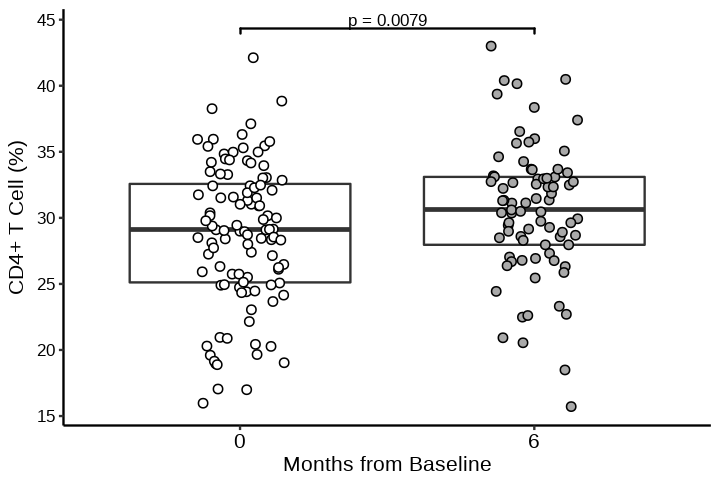

In [102]:
CD4_cell_6mo = ggplot(cells.Sul.6mo , aes(x=as.factor(time.from.exposure.months), y=CD4_positive_alpha_beta_T_cell)) + testTheme +
labs(y="CD4+ T Cell (%)") + geom_signif(comparisons=list(c("0", "6")),
                                                       annotations = c("p = 0.0079"),
                                                       step_increase = 0.09, vjust = 0.14,
                               tip_length = 0.015, textsize=3.5)
CD4_cell_6mo

#### Figure 5B

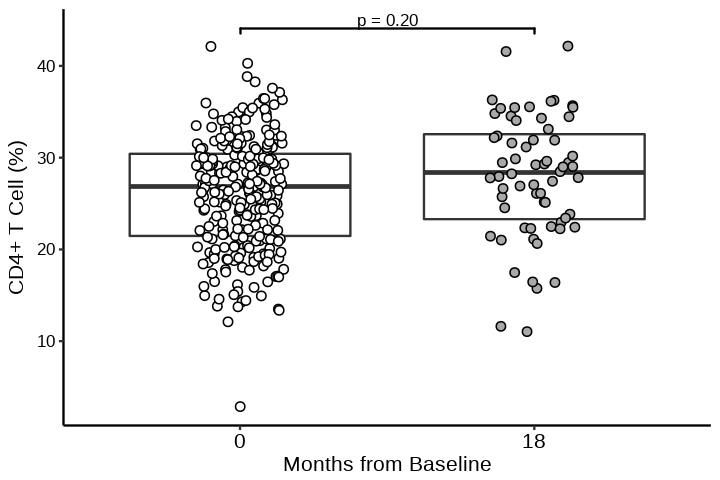

In [103]:
CD4_cell_18mo = ggplot(cells.Sul.18mo , aes(x=as.factor(time.from.exposure.months), y=CD4_positive_alpha_beta_T_cell)) + testTheme +
labs(y="CD4+ T Cell (%)") + geom_signif(comparisons=list(c("0", "18")),
                                                       annotations = c("p = 0.20"),
                                                       step_increase = 0.09, vjust = 0.14,
                               tip_length = 0.015, textsize=3.5)

CD4_cell_18mo

#### Figure 5C

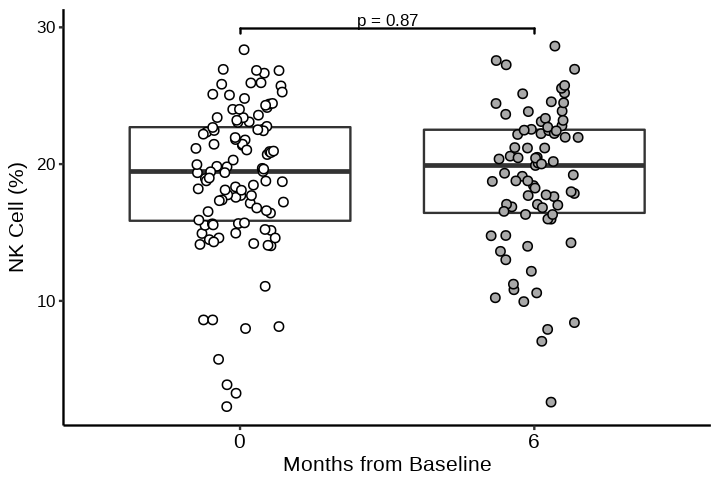

In [104]:
NK_cell_6mo = ggplot(cells.Sul.6mo , aes(x=as.factor(time.from.exposure.months), y=NK_cell)) + testTheme +
labs(y="NK Cell (%)") + geom_signif(comparisons=list(c("0", "6")),
                                                       annotations = c("p = 0.87"),
                                                       step_increase = 0.09, vjust = 0.14,
                               tip_length = 0.015, textsize=3.5)

NK_cell_6mo


#### Figure 5D

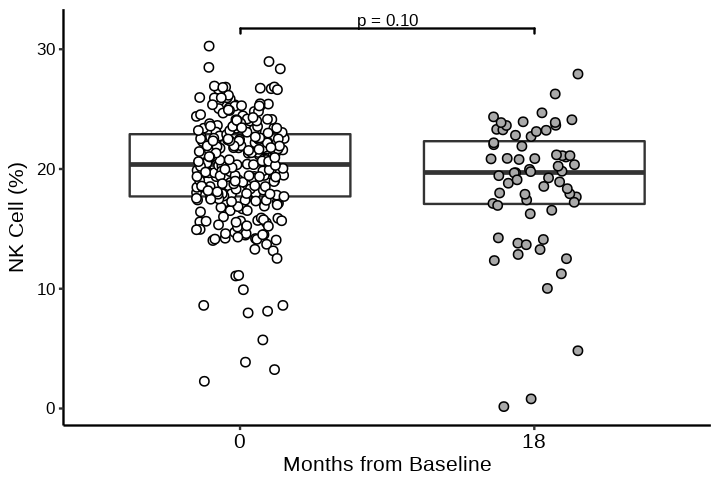

In [105]:
NK_cell_18mo = ggplot(cells.Sul.18mo , aes(x=as.factor(time.from.exposure.months), y=NK_cell)) + testTheme +
labs(y="NK Cell (%)") + geom_signif(comparisons=list(c("0", "18")),
                                                       annotations = c("p = 0.10"),
                                                       step_increase = 0.09, vjust = 0.14,
                               tip_length = 0.015, textsize=3.5)

NK_cell_18mo

### Reproduce Analysis for Figure 5

#### Load the data and perform limma differential expression analysis

In [6]:
source("utils_submission.R")

mouse.path = paste(path, "/data/GSE124688", sep="")
soft.mouse.file.name = "GSE124688_family.soft"
mouse.soft = getGEO(filename=paste(mouse.path, soft.mouse.file.name, sep="/"))
gsmlist = GSMList(mouse.soft)

Reading file....

Parsing....

Found 27 entities...

GPL6887 (1 of 28 entities)

GSM3541213 (2 of 28 entities)

GSM3541214 (3 of 28 entities)

GSM3541215 (4 of 28 entities)

GSM3541216 (5 of 28 entities)

GSM3541217 (6 of 28 entities)

GSM3541218 (7 of 28 entities)

GSM3541219 (8 of 28 entities)

GSM3541220 (9 of 28 entities)

GSM3541221 (10 of 28 entities)

GSM3541222 (11 of 28 entities)

GSM3541223 (12 of 28 entities)

GSM3541224 (13 of 28 entities)

GSM3541225 (14 of 28 entities)

GSM3541226 (15 of 28 entities)

GSM3541227 (16 of 28 entities)

GSM3541228 (17 of 28 entities)

GSM3541229 (18 of 28 entities)

GSM3541230 (19 of 28 entities)

GSM3541231 (20 of 28 entities)

GSM3541232 (21 of 28 entities)

GSM3541233 (22 of 28 entities)

GSM3541234 (23 of 28 entities)

GSM3541235 (24 of 28 entities)

GSM3541236 (25 of 28 entities)

GSM3541237 (26 of 28 entities)

GSM3541238 (27 of 28 entities)



In [7]:
# Make the data matrix from the VALUE columns from each GSM, a matrix of detection Pvalues and the pheno data

# Parse the expression matrix
mouse.exprs <- do.call('cbind',lapply(gsmlist,function(x) 
                                      {tab <- Table(x)
                                       return(tab$VALUE)
                                     }))
mouse.exprs <- data.frame(apply(mouse.exprs,2,function(x) {as.numeric(as.character(x))}))
rownames(mouse.exprs) = Table(gsmlist[[1]])$ID_REF

# Parse the Detection P value matrix
detectPval.matrix = do.call('cbind',lapply(gsmlist,function(x) 
                                      {tab <- Table(x)
                                       return(tab[, "Detection Pval"])
                                     }))
detectPval.matrix <- data.frame(apply(detectPval.matrix,2,function(x) {as.numeric(as.character(x))}))
rownames(detectPval.matrix) = Table(gsmlist[[1]])$ID_REF       

# Parse the pheno table
pheno = do.call('rbind', lapply(gsmlist, function(x)
    {chars = Meta(x)$characteristics_ch1
     newchars = chars
     newnames = chars
     i = 1
     for (char in chars) {
         new.name = strsplit(char, split=":")[[1]][1]
        new.data = as.character(sapply(char, function(x) {return(trimws(strsplit(x, split=":")[[1]][2]))}))
         newchars[i] = new.data
         newnames[i] = new.name
         i = i + 1
     }
     return(newchars)}
))

colnames(pheno) = c("strain", "infection.status", "time.point.days", "tissue", "gender")
pheno.data = data.frame(pheno)
pheno.data$time.point.days = as.numeric(as.character(pheno.data$time.point.days))

In [8]:
# Filter probes with a detection P value <= 0.01 in at least 10% of mice
det_pval_thresh = 0.01
PAL.10  = apply(detectPval.matrix <= det_pval_thresh, 1, mean) >= 0.10
mouse.exprs.fil = mouse.exprs[PAL.10,]

# Quantile normalize the data
mouse.exprs.qn = as.data.frame(normalize.quantiles(as.matrix(mouse.exprs.fil)))
colnames(mouse.exprs.qn) = colnames(mouse.exprs.fil)
rownames(mouse.exprs.qn) = rownames(mouse.exprs.fil)

# Set all values <10 to 10
mouse.exprs.qn[mouse.exprs.qn < 10] = 10

# Log2 transform data
mouse.exprs.log = log2(mouse.exprs.qn + 1)

mouse.tb = as.data.frame(t(mouse.exprs.log[,pheno.data$infection.status == "Mtb"]))
dim(mouse.tb)

pheno.data = droplevels(pheno.data[pheno.data$infection.status == "Mtb",])

pheno.data$stage = ifelse(pheno.data$time.point.days <= 60, "early","late")

[1]    20 16754

Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)

See spec(...) for full column specifications.

Using locally cached version of GPL10558 found here:
./data/GSE84152/GPL10558.soft 

Warning message:
“3270 parsing failures.
  row        col           expected    actual         file
29537 Unigene_ID 1/0/T/F/TRUE/FALSE Hs.571610 literal data
29538 Unigene_ID 1/0/T/F/TRUE/FALSE Hs.545780 literal data
29539 Unigene_ID 1/0/T/F/TRUE/FALSE Hs.554603 literal data
29540 Unigene_ID 1/0/T/F/TRUE/FALSE Hs.437179 literal data
29541 Unigene_ID 1/0/T/F/TRUE/FALSE Hs.128234 literal data
..... .......... .................. ......... ............
See problems(...) for more details.
”


ExpressionSet (storageMode: lockedEnvironment)
assayData: 47323 features, 470 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM2227793 GSM2227794 ... GSM2228262 (470 total)
  varLabels: title geo_accession ... wbc:ch1 (95 total)
  varMetadata: labelDescription
featureData
  featureNames: ILMN_1343291 ILMN_1343295 ... ILMN_3311190 (47323
    total)
  fvarLabels: ID Species ... GB_ACC (30 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 27837110 
Annotation: GPL10558 

              title ChIP hyb.chamber  dataset synchroset monkeyid time.point
GSM2227793  M16_150    1           1 Training         No      M16        150
GSM2227794    M17_3    1           1 Training         No      M17          3
GSM2227795  M8_Pre2    1           1 Training         No       M8          1
GSM2227796   M19_56    1           1 Training         No      M19         56
GSM2227797   M19_90    1           1 Training         No      M19         90
GSM2227798     M1_7    1           1 Training         No       M1          7
GSM2227799   M18_20    1           1 Training         No      M18         20
GSM2227800   M15_90    1           1 Training         No      M15         90
GSM2227801    M1_42    1           1 Training         No       M1         42
GSM2227802  M13_180    1           1 Training        Yes      M13        180
GSM2227803   M17_10    1           1 Training         No      M17         10
GSM2227804   M18_10    1           1 Training         No      M18         10

[1] "Genes expressed in at least 5 % of samples: 15083"
Found 1 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




Found 2691 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found12batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




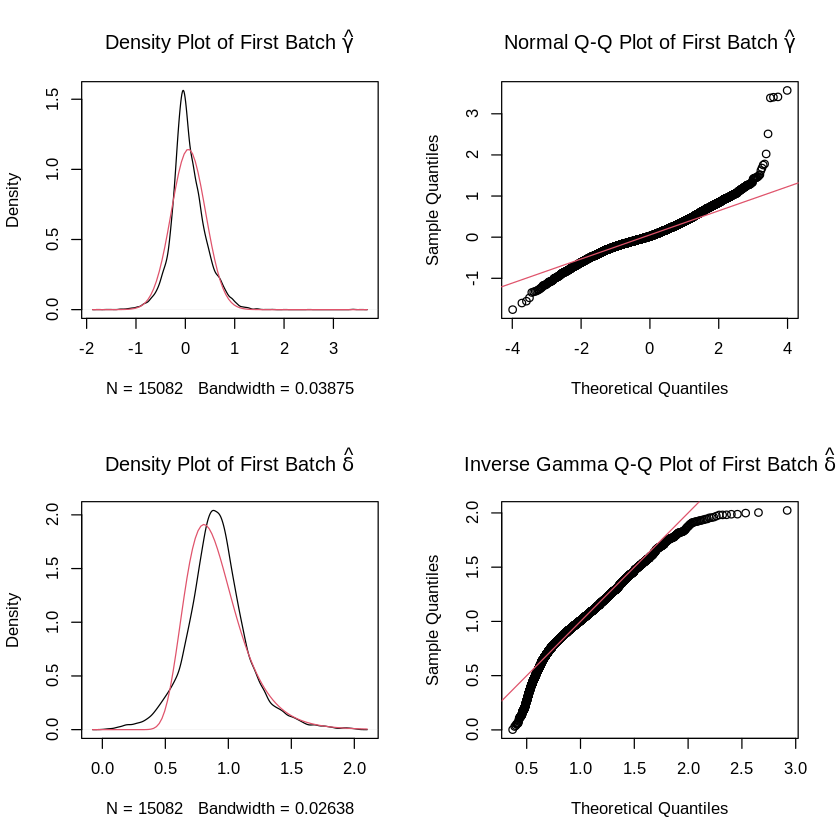

[1]   294 15083

[1] 294  13

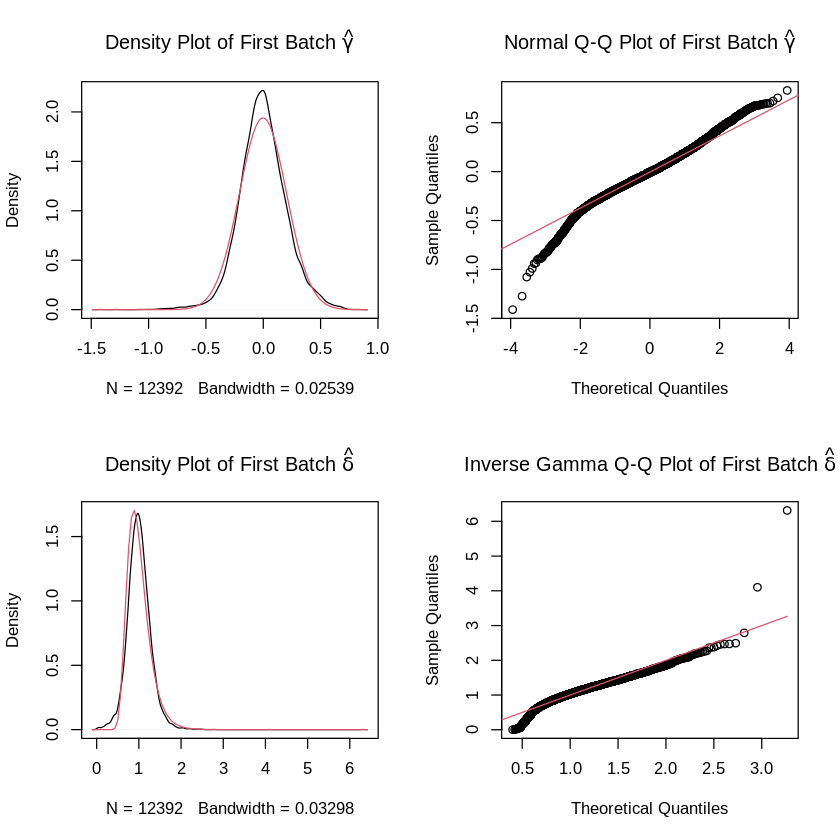

In [9]:
source("utils_submission.R")

monkey.path = paste(path, "/data/GSE84152", sep="")

monkey.gset = getGEO(filename=paste(monkey.path, "GSE84152_series_matrix.txt.gz", sep="/"), 
             destdir=monkey.path)

monkey.gset

raw.expres = read.table(file = paste(monkey.path, "GSE84152_non-normalized.txt", sep="/"), header=T , sep="\t")

pheno = filter.monkey.pheno(pData(monkey.gset))

PAL.5 = get.monkey.expressed.genes(raw.expres)

expres = process.monkey.exprs(exprs(monkey.gset), PAL.5)

modcombat<-model.matrix(~1, data=pheno)
combat_dataset= ComBat(dat=expres, batch=pheno$dataset, mod=modcombat, par.prior=TRUE, prior.plots=TRUE)
expres = ComBat(dat=combat_dataset, batch=pheno$hyb.chamber, mod=modcombat, par.prior=TRUE, prior.plots=TRUE)
  


expres = expres[, pheno$time.point > 10]
pheno = pheno[pheno$time.point > 10,]
pheno$time.period = as.factor(ifelse(pheno$time.point >= 90,
                                             "late",
                                             "early"))
expres = t(expres)

dim(expres)
dim(pheno)

In [10]:
source("utils_submission.R")

Sul.path = paste(path, "/data/GSE94438", sep="")

human.pheno.set = getGEO(filename=paste(Sul.path, "GSE94438_series_matrix.txt.gz", sep="/"),
             destdir=Sul.path)

human.pheno = filter.human.pheno(pData(human.pheno.set))

human.exprs.set = read.csv(file=paste(Sul.path, "GSE94438_rawCounts_GeneNames_AllSamples.csv", sep="/"), header=T, row.names = 1)
human.exprs = filter.human.exprs(human.exprs.set, human.pheno)

Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.

Using locally cached version of GPL11154 found here:
./data/GSE94438/GPL11154.soft 

Warning message in filter.human.pheno(pData(human.pheno.set)):
“NAs introduced by coercion”
Warning message in filter.human.pheno(pData(human.pheno.set)):
“NAs introduced by coercion”
Warning message in filter.human.pheno(pData(human.pheno.set)):
“NAs introduced by coercion”


           age code gender group site subjectid time.from.exposure.months
GSM2475704  NA  672     NA    NA   NA        NA                        NA
GSM2475705  NA  694     NA    NA   NA        NA                        NA
GSM2475706  NA  695     NA    NA   NA        NA                        NA
GSM2475722  NA  994     NA    NA   NA        NA                        NA
GSM2475742  NA 1061     NA    NA   NA        NA                        NA
GSM2475748  NA 1194     NA    NA   NA        NA                        NA
           time.to.tb.months
GSM2475704                NA
GSM2475705                NA
GSM2475706                NA
GSM2475722                NA
GSM2475742                NA
GSM2475748                NA
 [1] "GSM2475598" "GSM2475603" "GSM2475587" "GSM2475592" "GSM2475599"
 [6] "GSM2475604" "GSM2475360" "GSM2475387" "GSM2475362" "GSM2475389"
[11] "GSM2475402" "GSM2475555" "GSM2475361" "GSM2475388" "GSM2475359"
[16] "GSM2475390" "GSM2475588" "GSM2475593" "GSM2475591" "GSM2475596"

In [11]:
# Filter out genes whose counts are <= 5 in 50% of samples
exprs.j.keep = apply(human.exprs <= 5, 1, mean) <= 0.5

human.exprs.fil = human.exprs[exprs.j.keep,]

human.exprs.qn = as.data.frame(normalize.quantiles(as.matrix(human.exprs.fil)))
colnames(human.exprs.qn) = colnames(human.exprs.fil)
rownames(human.exprs.qn) = rownames(human.exprs.fil)
human.exprs.log = log2(human.exprs.qn + 1)

human.pheno.6mo = human.pheno

# Randomly sample 50% of AHRI site to training set and test set for this new human.pheno

AHRI.subj = unique(dplyr::filter(human.pheno, site == "AHRI")$subjectid)
set.seed(100)
AHRI.subj.train = sample(AHRI.subj, length(AHRI.subj) / 2)
human.pheno.6mo$dataset[human.pheno.6mo$subjectid %in% AHRI.subj.train] = "Training"

# Filter pheno and splice expression table to include only AHRI and MRC sites and to include only 0 and 6 month time points

human.pheno.6mo = droplevels(dplyr::filter(human.pheno.6mo, site %in% c("AHRI", "MRC"), time.from.exposure.months %in% c(0, 6)))
human.pheno.6mo$status = ifelse(human.pheno.6mo$group == "Control", "control", "progressor")

human.exprs.log.6mo = human.exprs.log[, colnames(human.exprs.log) %in% human.pheno.6mo$code]
human.exprs.log.6mo = t(human.exprs.log.6mo)

In [12]:
dim(human.pheno.6mo)
dim(human.exprs.log.6mo)

[1] 183  10

[1]   183 14842

In [13]:
dim(expres)
dim(pheno)

dim(mouse.tb)
dim(pheno.data)

dim(human.pheno.6mo)
dim(human.exprs.log.6mo)

[1]   294 15083

[1] 294  13

[1]    20 16754

[1] 20  6

[1] 183  10

[1]   183 14842

In [14]:
human = useMart("ensembl", dataset = "hsapiens_gene_ensembl")
mouse = useMart("ensembl", dataset = "mmusculus_gene_ensembl")

##### Human vs. Mouse Genes

mouse.probes = getBM(attributes = c("illumina_mousewg_6_v2", "ensembl_gene_id"),
                        filters="illumina_mousewg_6_v2",
                        values = colnames(mouse.tb), mart = mouse, uniqueRows=TRUE)

u.mouse.probes = mouse.probes[!duplicated(mouse.probes[,c('illumina_mousewg_6_v2')]),]

mouse.disco.genes = mouse.tb[,colnames(mouse.tb) %in% u.mouse.probes$illumina_mousewg_6_v2]
mouse.disco.genes = mouse.disco.genes[,match(u.mouse.probes$illumina_mousewg_6_v2,colnames(mouse.disco.genes))]
mouse.disco.genes = t(avereps(t(mouse.disco.genes), ID=u.mouse.probes$ensembl_gene_id))


mouse.disco.human = getLDS(attributes = c('ensembl_gene_id'),
 filters = c("ensembl_gene_id"),
    values = colnames(mouse.disco.genes), mart = mouse,
    attributesL = c("ensembl_gene_id"),
        martL=human)


mouse.disco.human.genes = mouse.disco.genes[,!(colnames(mouse.disco.genes) %in% 
                                               mouse.disco.human$Gene.stable.ID[duplicated(mouse.disco.human$Gene.stable.ID)]) &
                                           (colnames(mouse.disco.genes) %in% mouse.disco.human$Gene.stable.ID) &
                                           !(colnames(mouse.disco.genes) %in% 
                                             mouse.disco.human[mouse.disco.human$Gene.stable.ID.1 %in% 
                                                              mouse.disco.human$Gene.stable.ID.1[duplicated(mouse.disco.human$Gene.stable.ID.1)],]$Gene.stable.ID)]

mouse.disco.human.fil = mouse.disco.human[mouse.disco.human$Gene.stable.ID %in% colnames(mouse.disco.human.genes),]
mouse.disco.human.genes = mouse.disco.human.genes[,match(mouse.disco.human.fil$Gene.stable.ID, colnames(mouse.disco.human.genes))]
colnames(mouse.disco.human.genes) = mouse.disco.human.fil$Gene.stable.ID.1


human.disco.mouse.genes  = human.exprs.log.6mo[,colnames(human.exprs.log.6mo) %in% colnames(mouse.disco.human.genes)]
mouse.disco.human.genes = mouse.disco.human.genes[,colnames(mouse.disco.human.genes) %in% colnames(human.disco.mouse.genes)]
human.disco.mouse.genes = human.disco.mouse.genes[,match(colnames(mouse.disco.human.genes), colnames(human.disco.mouse.genes))]


Batch submitting query [=======>-----------------------]  25% eta: 38s

Batch submitting query [===============>---------------]  50% eta: 25s

Batch submitting query [======================>--------]  75% eta: 12s
                                                                      



In [15]:
##### Human vs. Monkey Genes

monkey.probes = getBM(attributes = c("illumina_humanht_12_v4", "ensembl_gene_id"),
                        filters="illumina_humanht_12_v4",
                        values = colnames(expres), mart = human,  uniqueRows=TRUE)


Batch submitting query [=======>-----------------------]  25% eta:  1m

Batch submitting query [===============>---------------]  50% eta: 47s

Batch submitting query [======================>--------]  75% eta: 26s
                                                                      



In [16]:
u.monkey.probes = monkey.probes[!duplicated(monkey.probes[,c('illumina_humanht_12_v4')]),]

monkey.disco.genes = expres[,colnames(expres) %in% u.monkey.probes$illumina_humanht_12_v4]
monkey.disco.genes = monkey.disco.genes[,match(u.monkey.probes$illumina_humanht_12_v4,colnames(monkey.disco.genes))]
monkey.disco.genes = t(avereps(t(monkey.disco.genes), ID=u.monkey.probes$ensembl_gene_id))


human.disco.monkey.genes  = human.exprs.log.6mo[,colnames(human.exprs.log.6mo) %in% colnames(monkey.disco.genes)]
monkey.disco.human.genes = monkey.disco.genes[,colnames(monkey.disco.genes) %in% colnames(human.disco.monkey.genes)]
human.disco.monkey.genes = human.disco.monkey.genes[,match(colnames(monkey.disco.human.genes), colnames(human.disco.monkey.genes))]

##### Monkey vs. Mouse Genes


mouse.disco.monkey.genes = mouse.disco.genes[,!(colnames(mouse.disco.genes) %in% 
                                               mouse.disco.human$Gene.stable.ID[duplicated(mouse.disco.human$Gene.stable.ID)]) &
                                           (colnames(mouse.disco.genes) %in% mouse.disco.human$Gene.stable.ID) &
                                           !(colnames(mouse.disco.genes) %in% 
                                             mouse.disco.human[mouse.disco.human$Gene.stable.ID.1 %in% 
                                                              mouse.disco.human$Gene.stable.ID.1[duplicated(mouse.disco.human$Gene.stable.ID.1)],]$Gene.stable.ID)]

mouse.disco.human.fil = mouse.disco.human[mouse.disco.human$Gene.stable.ID %in% colnames(mouse.disco.monkey.genes),]
mouse.disco.monkey.genes = mouse.disco.monkey.genes[,match(mouse.disco.human.fil$Gene.stable.ID, colnames(mouse.disco.monkey.genes))]
colnames(mouse.disco.monkey.genes) = mouse.disco.human.fil$Gene.stable.ID.1



mouse.disco.monkey.genes  = mouse.disco.monkey.genes[,colnames(mouse.disco.monkey.genes) %in% colnames(monkey.disco.genes)]
monkey.disco.mouse.genes = monkey.disco.genes[,colnames(monkey.disco.genes) %in% colnames(mouse.disco.monkey.genes)]
mouse.disco.monkey.genes = mouse.disco.monkey.genes[,match(colnames(monkey.disco.mouse.genes), colnames(mouse.disco.monkey.genes))]


#### Perform Limma differential expression 

##### Matching mouse and human genes. 

m.stage = as.factor(ifelse(pheno.data$stage == "early", 0, 1))
m.fit = lmFit(t(mouse.disco.human.genes), design=model.matrix(~m.stage))
m.fit = eBayes(m.fit)
m.tt = topTable(m.fit, coef=2, number=dim(mouse.disco.human.genes)[2], sort.by="none")
h.stage = as.factor(ifelse(human.pheno.6mo$time.from.exposure.months==0, 1, 0))
h.fit = lmFit(t(human.disco.mouse.genes), design=model.matrix(~h.stage))
h.fit = eBayes(h.fit)
h.tt = topTable(h.fit, coef=2, number=dim(human.disco.mouse.genes)[2], sort.by="none")


##### Matching human and monkey genes.

mo.stage = as.factor(ifelse(pheno$time.period == "early", 0, 1))
mo.fit = lmFit(t(monkey.disco.human.genes), design=model.matrix(~mo.stage))
mo.fit = eBayes(mo.fit)
mo.tt = topTable(mo.fit, coef=2, number=dim(monkey.disco.human.genes)[2], sort.by="none")
hu.stage = as.factor(ifelse(human.pheno.6mo$time.from.exposure.months==0, 1, 0))
hu.fit = lmFit(t(human.disco.monkey.genes), design=model.matrix(~hu.stage))
hu.fit = eBayes(hu.fit)
hu.tt = topTable(hu.fit, coef=2, number=dim(human.disco.monkey.genes)[2], sort.by="none")

##### Matching monkey and mouse genes.

mon.stage = as.factor(ifelse(pheno$time.period == "early", 0, 1))
mon.fit = lmFit(t(monkey.disco.mouse.genes), design=model.matrix(~mon.stage))
mon.fit = eBayes(mon.fit)
mon.tt = topTable(mon.fit, coef=2, number=dim(monkey.disco.mouse.genes)[2], sort.by="none")
mus.stage = as.factor(ifelse(pheno.data$stage == "early", 0, 1))
mus.fit = lmFit(t(mouse.disco.monkey.genes), design=model.matrix(~mus.stage))
mus.fit = eBayes(mus.fit)
mus.tt = topTable(mus.fit, coef=2, number=dim(mouse.disco.monkey.genes)[2], sort.by="none")

#### Perform disco pathway analysis

In [17]:
##### Sets for module overlap between species pairs

overlap = list()
concordants = list()
discordants = list()


##### Human vs. Mouse

gene_symbols_disco = getBM(attributes = c("hgnc_symbol", "ensembl_gene_id"),
                        filters="ensembl_gene_id",
                        values = rownames(h.tt), mart = human)


Batch submitting query [===============>---------------]  50% eta:  2s
                                                                      



Warning message in .xcheck(x):
“names(x) is NULL. Generating default names”
Warning message in .xcheck(x):
“names(x) is NULL. Generating default names”


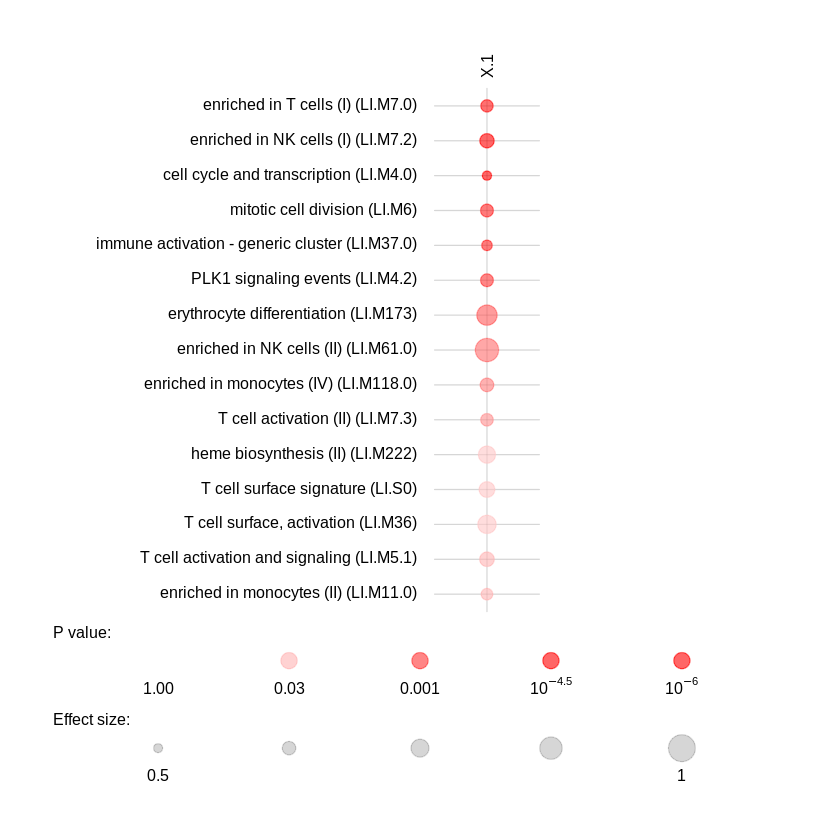

Warning message in .xcheck(x):
“names(x) is NULL. Generating default names”


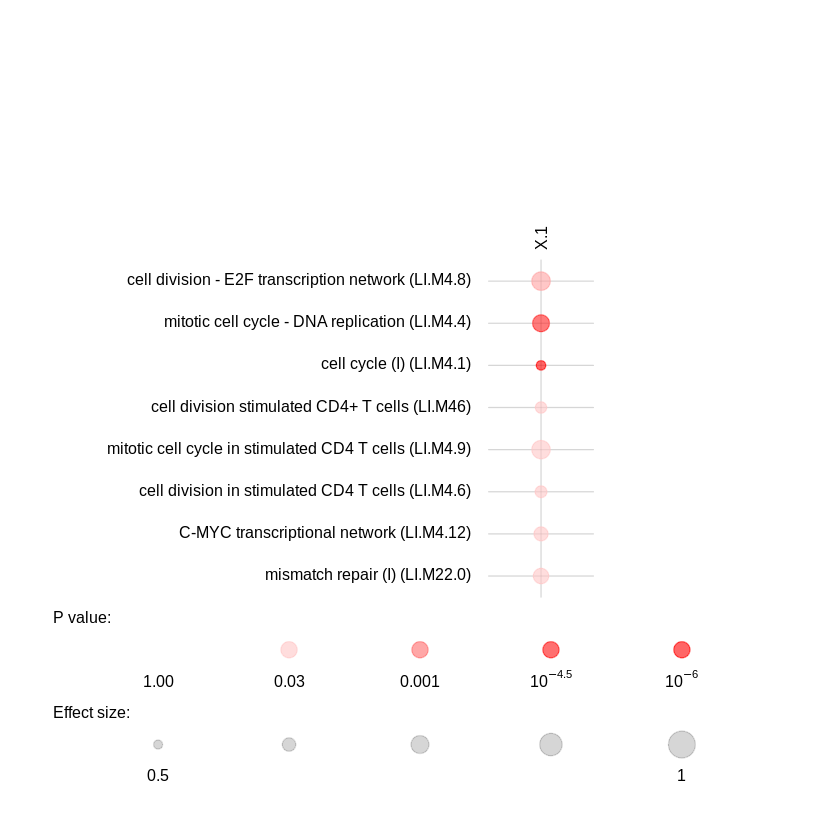

Warning message in .xcheck(x):
“names(x) is NULL. Generating default names”


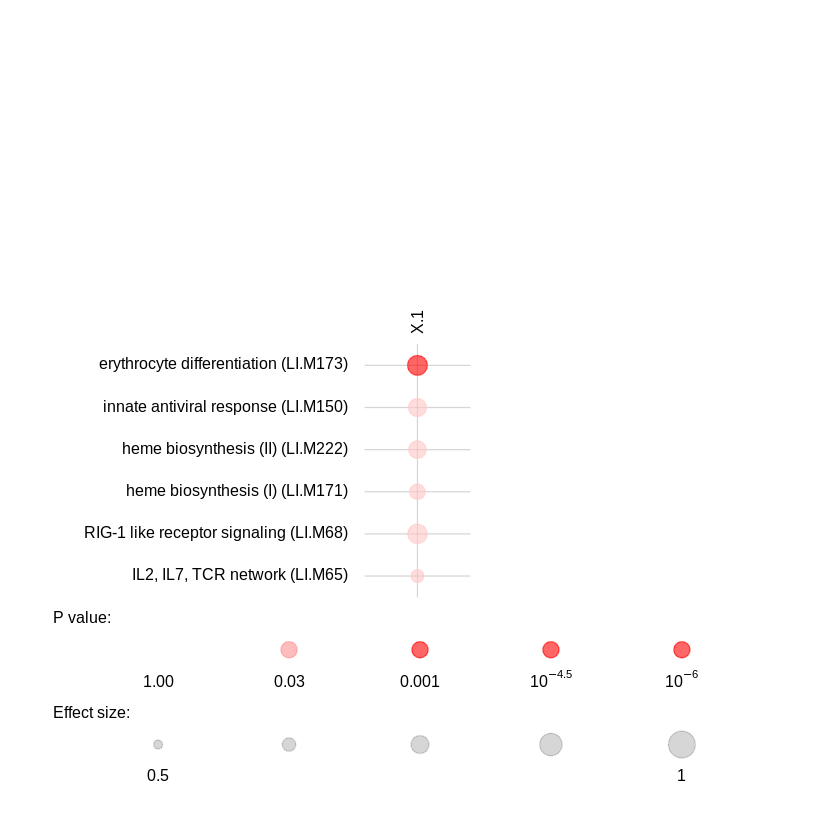

Warning message in .xcheck(x):
“names(x) is NULL. Generating default names”


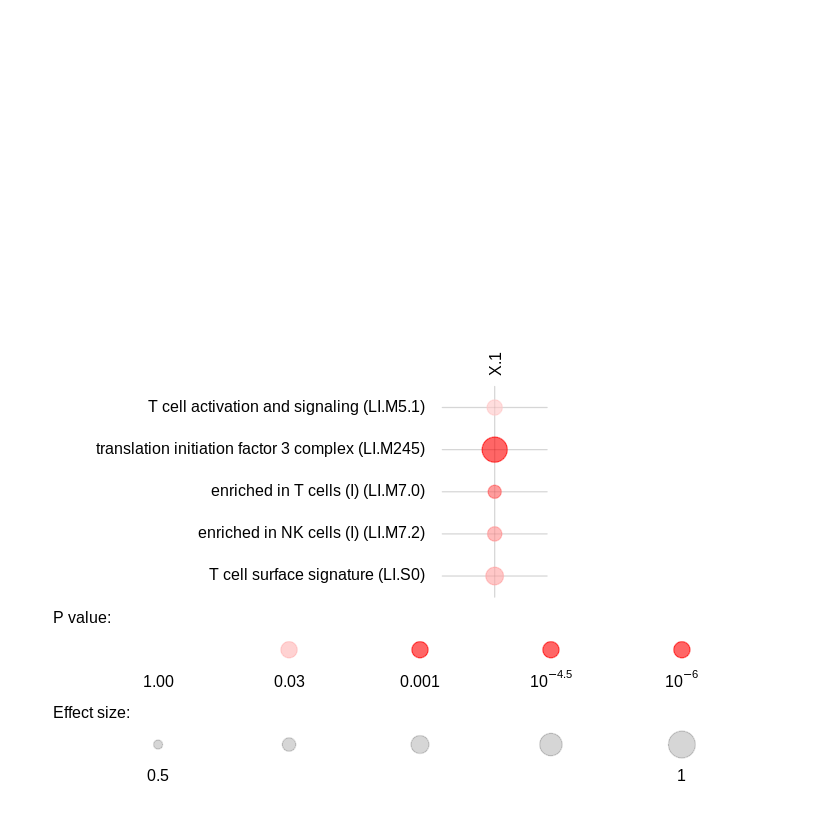

Warning message in .xcheck(x):
“names(x) is NULL. Generating default names”


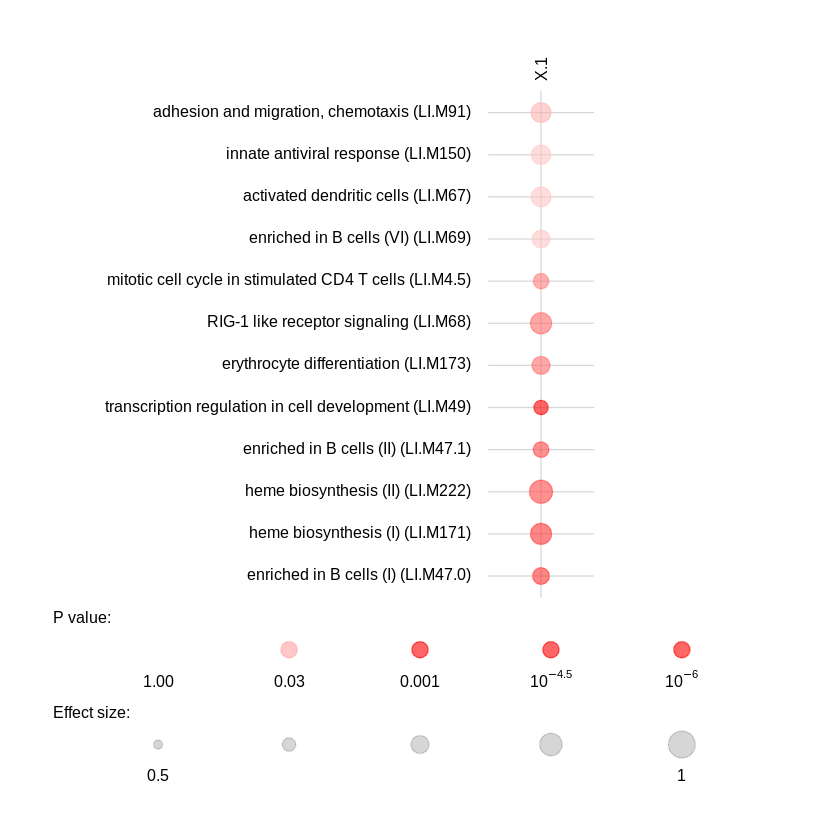

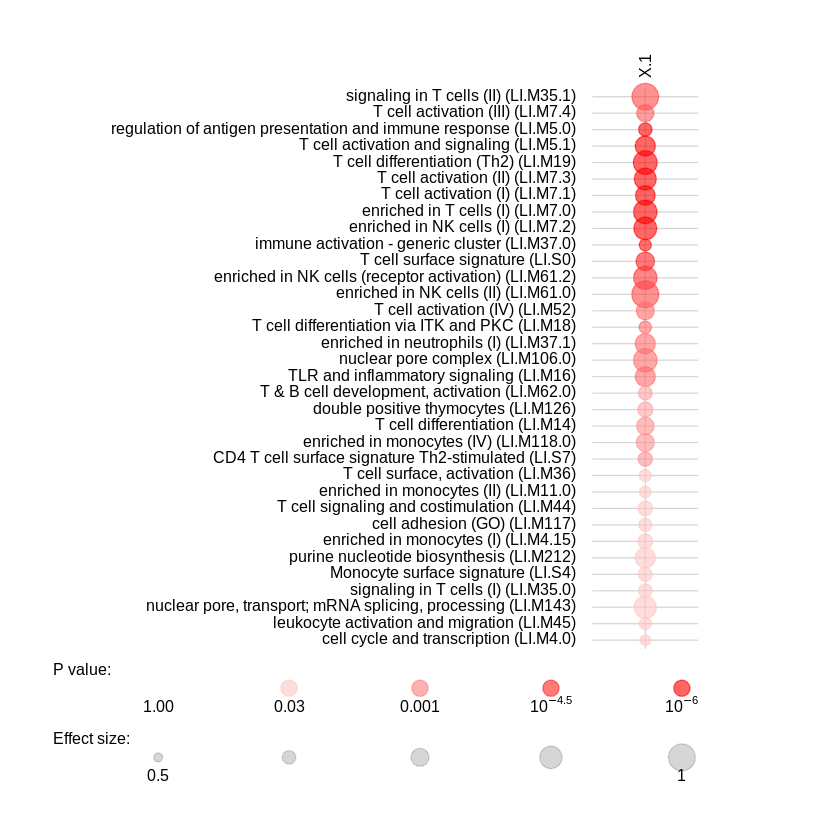

In [18]:
gs = gene_symbols_disco[gene_symbols_disco$hgnc_symbol!='',]
h.tt.fil = h.tt[rownames(h.tt) %in% gs$ensembl_gene_id,]
m.tt.fil = m.tt[rownames(m.tt) %in% gs$ensembl_gene_id,]
gs.match = gs[match(rownames(h.tt.fil), gs$ensembl_gene_id),]
rownames(m.tt.fil) = gs.match$hgnc_symbol
rownames(h.tt.fil) = gs.match$hgnc_symbol

disco.h.m = makeMatchedOrtholog(c("human","mouse"), rownames(h.tt.fil), h.tt.fil$logFC, m.tt.fil$logFC, h.tt.fil$P.Value, m.tt.fil$P.Value)
disco.s.h.m = disco.score(disco.h.m)
ord <- order(disco.s.h.m, decreasing = TRUE)
concordant <- tmodCERNOtest(toupper(disco.h.m$genes)[ord])

concordants$human_mouse = concordant
overlap$human.mouse = as.character(concordant$ID)

tmodPanelPlot(list(concordant), text.cex=0.8,  filter.unknown=TRUE,
              pval.thr=1.0)


ord <- order(disco.s.h.m, decreasing = FALSE)
concordant <- tmodCERNOtest(toupper(disco.h.m$genes)[ord])
modtable <- percentGenes(disco.h.m, tmod[concordant$ID])

discordants$human_mouse = concordant
overlap$human.mouse = c(overlap$human.mouse, as.character(concordant$ID))

tmodPanelPlot(list(concordant), text.cex=0.8,  filter.unknown=TRUE,
              pval.thr=1.0)


##### Human vs. Monkey

hu.m.result = convert.to.gene.symbols(hu.tt, mo.tt, rownames(hu.tt))

disco.hu.m = makeMatchedOrtholog(c("human","monkey"), rownames(hu.m.result$tt.1), 
                                hu.m.result$tt.1$logFC, 
                                hu.m.result$tt.2$logFC, 
                                hu.m.result$tt.1$P.Value, 
                                hu.m.result$tt.2$P.Value)

disco.s.hu.m = disco.score(disco.hu.m)
ord <- order(disco.s.hu.m, decreasing = TRUE)
concordant <- tmodCERNOtest(toupper(disco.hu.m$genes)[ord])

concordants$human_monkey = concordant
overlap$human.monkey = as.character(concordant$ID)

tmodPanelPlot(list(concordant), text.cex=0.8,  filter.unknown=TRUE,
              pval.thr=1.0)


ord <- order(disco.s.hu.m, decreasing = FALSE)
concordant <- tmodCERNOtest(toupper(disco.hu.m$genes)[ord])

discordants$human_monkey = concordant
overlap$human.monkey = c(overlap$human.monkey, as.character(concordant$ID))

tmodPanelPlot(list(concordant), text.cex=0.8,   filter.unknown=TRUE,
              pval.thr=1.0)

##### Monkey vs. Mouse

mon.mus.result = convert.to.gene.symbols(mon.tt, mus.tt, rownames(mon.tt))

disco.mon.mus = makeMatchedOrtholog(c("monkey","mouse"), rownames(mon.mus.result$tt.1), 
                                mon.mus.result$tt.1$logFC, 
                                mon.mus.result$tt.2$logFC, 
                                mon.mus.result$tt.1$P.Value, 
                                mon.mus.result$tt.2$P.Value)
disco.s.mon.mus = disco.score(disco.mon.mus)


ord <- order(disco.s.mon.mus, decreasing = TRUE)
concordant <- tmodCERNOtest(toupper(disco.mon.mus$genes)[ord])

concordants$monkey_mouse = concordant
overlap$monkey.mouse = as.character(concordant$ID)

tmodPanelPlot(list(concordant), text.cex=0.8,  filter.unknown=TRUE,
              pval.thr=1.0)


ord <- order(disco.s.mon.mus, decreasing = FALSE)
concordant <- tmodCERNOtest(toupper(disco.mon.mus$genes)[ord])

discordants$monkey_mouse = concordant
overlap$monkey.mouse = c(overlap$monkey.mouse, as.character(concordant$ID))

tmodPanelPlot(list(concordant), text.cex=0.8,  filter.unknown=TRUE,
              pval.thr=1.0)

#### Figure 5

In [19]:
print(names(concordants))

[1] "human_mouse"  "human_monkey" "monkey_mouse"


In [20]:
total_pathways = list(concordants[[1]], discordants[[1]],
                     concordants[[2]], discordants[[2]],
                     concordants[[3]], discordants[[3]])

l_names = c("human vs. mouse concordant", "human vs. mouse discordant", "human vs. monkey concordant", 
  "human vs. monkey discordant","monkey vs. mouse concordant",  "monkey vs. mouse discordant")

names(total_pathways) = l_names

In [21]:
pdf("paper_figures/Disco_analysis_new.pdf")
tmodPanelPlot(total_pathways, text.cex=0.5, plot.cex=0.5,  filter.unknown=TRUE,
              pval.thr=0.10, grid="none", legend.style="tall")
dev.off()

png 
  2

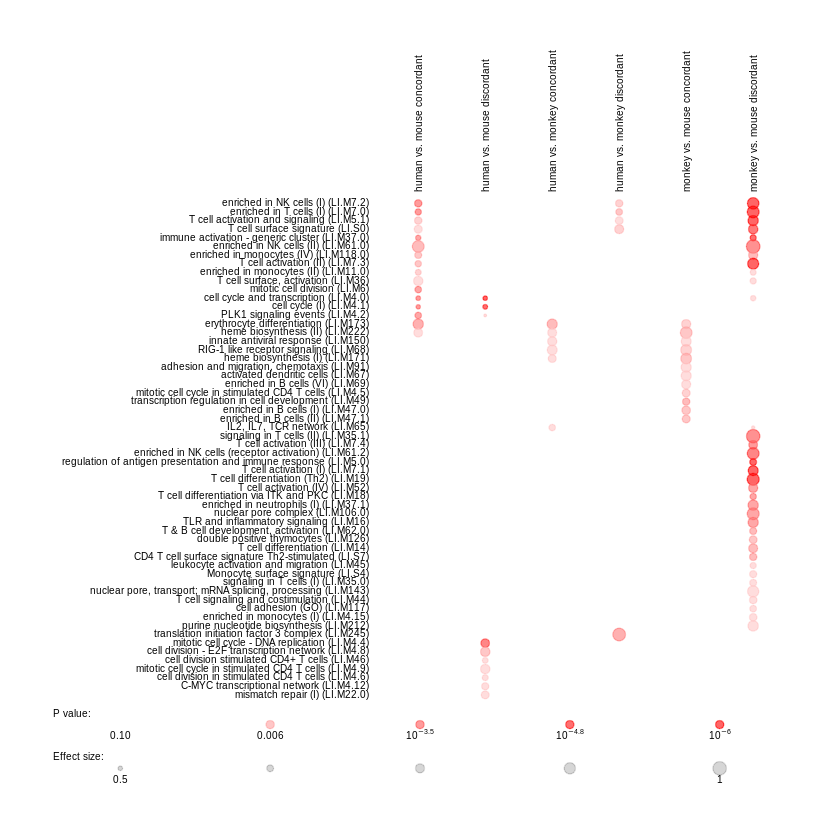

In [22]:
tmodPanelPlot(total_pathways, text.cex=0.5, plot.cex=0.5,  filter.unknown=TRUE,
              pval.thr=0.10, grid="none", legend.style="tall")

## Figure 5 Attempted Validation of Human 6-gene signature in all species

- This code reproduces the analysis of Figure 5, showing that "Application of reduced 6-gene expression signature of time since active TB exposure to adolescent M.tb infection acquisition cohort confirms its identification of recent infection in humans."


### Load and Install Required Libraries

In [3]:
if (!require("preprocessCore")) {
  source("https://bioconductor.org/biocLite.R")
  biocLite("preprocessCore")
  library("preprocessCore")
}

source("https://bioconductor.org/biocLite.R")
if (!require("Biobase")) {
  biocLite("Biobase")
  library("Biobase")
}
if (!require("GEOquery")) {
  biocLite("GEOquery")
  library("GEOquery")
}

if (!require("ggplot2")) {
  install.packages("ggplot2")
  library("ggplot2")
}

if (!require("glmnet")) {
  install.packages("glmnet")
  library("glmnet")
}

if (!require("caret")) {
  install.packages("caret")
  library("caret")
}
if (!require("dplyr")) {
  install.packages("dplyr")
  library("dplyr")
}

if (!require("ggsignif")) {
  install.packages("ggsignif")
  library("ggsignif")
}

if (!require("doParallel")) {
  install.packages("doParallel")
  library("doParallel")
}

if (!require("cowplot")) {
  install.packages("cowplot")
  library("cowplot")
}

if (!require("e1071")) {
  install.packages("e1071")
  library("e1071")
}

if (!require("pROC")) {
    # pROC 1.12.0 is required, and may not be the default installation:
    packageUrl<- "https://cran.r-project.org/src/contrib/Archive/pROC/pROC_1.12.0.tar.gz"
    install.packages(packageUrl, repos=NULL, type='source')
    library("pROC")
}

if (!require("MetaIntegrator")) {
    
  # First install several dependencies required by MetaIntegrator 2.0.0
    if (!require("multtest")) {
      biocLite("multtest")
      library("multtest")
    }

    if (!require("GEOmetadb")) {
      biocLite("GEOmetadb")
      library("GEOmetadb")
    }
    
    if (!require("biomaRt")) {
      biocLite("biomaRt")
      library("biomaRt")
    }
    
    install.packages(c("ggpubr", "ROCR", "pracma", "COCONUT" , "Metrics", "manhattanly", "snplist", "DT", "pheatmap", "HGNChelper"))
    
    # Now install MetaIntegrator. Version 2.0.0 is required to use ImmunoStates
    packageUrl = "https://cran.r-project.org/src/contrib/MetaIntegrator_2.0.0.tar.gz"
    install.packages(packageUrl, repos=NULL, type='source')
    library("MetaIntegrator")
}

if (!require("stringr")) {
  install.packages("stringr")
  library("stringr")
}

Loading required package: preprocessCore
Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, 

### Load and process the data from the ARCHS4 resource for GC6-74 and ACS

### To download data from the ARCHS4 resource
 - In a web browser go to https://amp.pharm.mssm.edu/archs4/data.html
 - (If have not done already) Search for GSE94438 (GC6-74) and click the download link (a zipped folder with a gene_count.tsv file is downloaded)
 - Do the same for for GSE79362 (ACS) 
 - Move the respective files into their data/GSE... folder in this repository and rename: "gene_count_GSE[GSE # here].tsv"
 
### Download Adolescent M.tb Infection Acquisition Cohort data at gene level

- Follow the steps in the notebook, "Downloading Mtb Acquisition Adolescent Data at gene level.ipynb"

In [4]:
source("utils_submission.R")

Sul.path = paste(path, "/data/GSE94438", sep="")

Sul.pheno.set = getGEO(filename=paste(Sul.path, "GSE94438_series_matrix.txt.gz", sep="/"),
             destdir=Sul.path)

Sul.pheno = filter.human.pheno(pData(Sul.pheno.set))

# Common names for progressor
Sul.pheno$group = ifelse(Sul.pheno$group == "Control", "control", "progressor")

Sul.exprs = read.table(paste(Sul.path, "gene_count_GSE94438.tsv", sep="/"), header=T, row.names=1)
Sul.exprs = filter.HUMAN.exprs(Sul.exprs, Sul.pheno) 

Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: verification
Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-2 (2017-12-21) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
Loading required package: boot

Attaching package: ‘boot’

The following object is masked from ‘package:lattice’:

    melanoma

Loading required package: CircStats
Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading

           age code gender group site subjectid time.from.exposure.months
GSM2475704  NA  672     NA    NA   NA        NA                        NA
GSM2475705  NA  694     NA    NA   NA        NA                        NA
GSM2475706  NA  695     NA    NA   NA        NA                        NA
GSM2475722  NA  994     NA    NA   NA        NA                        NA
GSM2475742  NA 1061     NA    NA   NA        NA                        NA
GSM2475748  NA 1194     NA    NA   NA        NA                        NA
           time.to.tb.months
GSM2475704                NA
GSM2475705                NA
GSM2475706                NA
GSM2475722                NA
GSM2475742                NA
GSM2475748                NA
 [1] "GSM2475598" "GSM2475603" "GSM2475587" "GSM2475592" "GSM2475599"
 [6] "GSM2475604" "GSM2475360" "GSM2475387" "GSM2475362" "GSM2475389"
[11] "GSM2475402" "GSM2475555" "GSM2475361" "GSM2475388" "GSM2475359"
[16] "GSM2475390" "GSM2475588" "GSM2475593" "GSM2475591" "GSM2475596"

In [5]:
ACS.path = paste(path, "/data/GSE79362", sep="")

ACS.pheno.set = getGEO(filename=paste(ACS.path, "GSE79362_series_matrix.txt.gz", sep="/"),
             destdir=Sul.path)

ACS.pheno = filter.ACS.pheno(pData(ACS.pheno.set))

ACS.pheno$group = ifelse(ACS.pheno$group == "control (non-progressor)", "control", "progressor")

ACS.exprs = read.table(paste(ACS.path, "gene_count_GSE79362.tsv", sep="/"), header=T, row.names=1)
ACS.exprs = filter.HUMAN.exprs(ACS.exprs, ACS.pheno)

Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL11154 found here:
./data/GSE94438/GPL11154.soft 
Warning message in filter.ACS.pheno(pData(ACS.pheno.set)):
“NAs introduced by coercion”

[1] "about to return new data frame"
[1] "Identical column and rownames between exprs and pheno tables?"
[1] TRUE


In [6]:
ado.path =  paste(path, "/data/GSE116014", sep="")
ado.exprs = read.csv(paste(ado.path, "GSE116014_gene_exprs.csv", sep="/"), header=T, row.names=1)
ado.pheno = read.csv(paste(ado.path, "GSE116014_pheno.csv", sep="/"), header=T, row.names=1)

colnames(ado.pheno) = gsub("\\.\\.", "\\.", gsub("days\\.","days", gsub("\\.ch1","",colnames(ado.pheno))))


ado.pheno = ado.pheno[,c('draw.day',
                         'latent.tb.status.at.blood.draw',
                         'patientid',
                         'relative.time.from.conversion.days',
                         'time.of.conversion.days',
                         'tissue')]
num.f = c  ('draw.day',
                         'relative.time.from.conversion.days',
                         'time.of.conversion.days')
            
for (f in num.f) {
    ado.pheno[,f] = as.numeric(ado.pheno[,f])
}


In [7]:
# Filter out genes whose counts are <= 5 in 50% of samples
exprs.j.keep = apply(Sul.exprs <= 5, 1, mean) <= 0.5

exprs.fil = Sul.exprs[exprs.j.keep,]

exprs.qn = as.data.frame(normalize.quantiles(as.matrix(exprs.fil)))
colnames(exprs.qn) = colnames(exprs.fil)
rownames(exprs.qn) = rownames(exprs.fil)
Sul.exprs.log = log2(exprs.qn + 1)

In [8]:
# Filter out genes whose counts are <= 5 in 50% of samples
exprs.j.keep = apply(ACS.exprs <= 5, 1, mean) <= 0.5

exprs.fil = ACS.exprs[exprs.j.keep,]

exprs.qn = as.data.frame(normalize.quantiles(as.matrix(exprs.fil)))
colnames(exprs.qn) = colnames(exprs.fil)
rownames(exprs.qn) = rownames(exprs.fil)
ACS.exprs.log = log2(exprs.qn + 1)

In [9]:
ado.all.exprs = 2 ^ ado.exprs

# Filter out genes whose counts are <= 10 in 50% of samples or more
exprs.j.keep.ado = apply(ado.all.exprs <= 10, 1, mean) <= 0.5

ado.exprs.fil = ado.all.exprs[exprs.j.keep.ado,]

exprs.qn = as.data.frame(normalize.quantiles(as.matrix(ado.exprs.fil)))
colnames(exprs.qn) = colnames(ado.exprs.fil)
rownames(exprs.qn) = rownames(ado.exprs.fil)
ado.exprs.log = log2(exprs.qn + 1)

In [10]:
Sul.exprs.log = t(Sul.exprs.log)
ACS.exprs.log = t(ACS.exprs.log)
ado.exprs.log = t(ado.exprs.log)

In [11]:
Sul.pheno.6mo = Sul.pheno

# Randomly sample 50% of AHRI site to training set and test set for this new Sul.pheno

AHRI.subj = unique(dplyr::filter(Sul.pheno, site == "AHRI")$subjectid)
set.seed(100)
AHRI.subj.train = sample(AHRI.subj, length(AHRI.subj) / 2)
Sul.pheno.6mo$dataset[Sul.pheno.6mo$subjectid %in% AHRI.subj.train] = "Training"


# dplyr::filter pheno and expression table to include only AHRI and MRC sites and to include only 0 and 6 month time points

Sul.pheno.6mo = droplevels(Sul.pheno.6mo[Sul.pheno.6mo$site %in% c("AHRI", "MRC") & Sul.pheno.6mo$time.from.exposure.months %in% c(0, 6),])

Sul.exprs.log.6mo = Sul.exprs.log[rownames(Sul.exprs.log) %in% row.names(Sul.pheno.6mo),]

Sul.pheno.6mo.train = droplevels(Sul.pheno.6mo[ Sul.pheno.6mo$dataset == "Training",])
Sul.pheno.6mo.test = droplevels(Sul.pheno.6mo[ Sul.pheno.6mo$dataset != "Training",])

Sul.exprs.train = Sul.exprs.log.6mo[row.names(Sul.pheno.6mo.train),]
Sul.exprs.test = Sul.exprs.log.6mo[row.names(Sul.pheno.6mo.test),]

In [12]:
Sul.pheno.risk = Sul.pheno

# Randomly sample 50% of AHRI site to training set and test set for this new Sul.pheno

AHRI.subj = unique(dplyr::filter(Sul.pheno, site == "AHRI")$subjectid)
set.seed(100)
AHRI.subj.train = sample(AHRI.subj, length(AHRI.subj) / 2)
Sul.pheno.risk$dataset[Sul.pheno.risk$subjectid %in% AHRI.subj.train] = "Training"

Sul.pheno.risk.test = droplevels(Sul.pheno.risk[Sul.pheno.risk$site %in% c("AHRI", "MRC") & Sul.pheno.risk$dataset != "Training",])
Sul.exprs.log.test = Sul.exprs.log[rownames(Sul.exprs.log) %in% row.names(Sul.pheno.risk.test),]

Sul.pheno.risk.SUN = droplevels(Sul.pheno.risk[Sul.pheno.risk$site %in% c("SUN"),])
Sul.exprs.log.SUN = Sul.exprs.log[rownames(Sul.exprs.log) %in% row.names(Sul.pheno.risk.SUN),]


ACS.pheno.subj = ACS.pheno
ACS.pheno.subj$subjectid = as.factor(extract_id(ACS.pheno$title))
ACS.pheno.subj = ACS.pheno.subj[!is.na(ACS.pheno.subj$subjectid),]
ACS.exprs.subj = ACS.exprs.log[rownames(ACS.exprs.log) %in% rownames(ACS.pheno.subj),]
identical(rownames(ACS.exprs.subj), rownames(ACS.pheno.subj))

dim(Sul.pheno.risk.test)
dim(Sul.exprs.log.test)
dim(Sul.pheno.risk.SUN)
dim(Sul.exprs.log.SUN)
dim(ACS.pheno.subj)
dim(ACS.exprs.subj)

[1] TRUE

[1] 88  9

[1]    88 17617

[1] 198   9

[1]   198 17617

[1] 264  10

[1]   264 17202

### Perform Forward Gene Selection to Identify 6 genes associated with recent exposure in Humans

- The identity of the 6 genes may be different in this run than in the analysis of the paper (may be an issue with a random seed). The reader could modify the calculateScore function in utils_submission.R to verify whether the reported properties of the 6-gene signature in the paper are similar to the genes that the reader obtains.

In [13]:
set.seed(100)
folds.6mo = groupKFold(Sul.pheno.6mo.train$subjectid, k=10)
for (fold in lapply(folds.6mo, function(x) {Sul.pheno.6mo.train$subjectid[x]}))
    print(length((as.character(fold))))

lapply(folds.6mo, function(x, y) table(y[x]), y = Sul.pheno.6mo.train$subjectid)

time.period.from.exposure = as.factor(ifelse(Sul.pheno.6mo.train$time.from.exposure.months == "0", "early", "late"))
test.time.period.from.exposure = as.factor(ifelse(Sul.pheno.6mo.test$time.from.exposure.months == "0", "early", "late"))

[1] 112
[1] 107
[1] 98
[1] 99
[1] 101
[1] 103
[1] 102
[1] 103
[1] 105
[1] 105


$Fold01

  07/G189   07/G274   07/G277   07/G300   07/G351   07/G354   07/G368   07/G370 
        1         1         1         0         1         1         1         1 
  07/G419   08/G136   08/G141   08/G160   08/G245   08/G260   08/G324   08/G333 
        1         1         1         1         1         2         2         1 
  08/G343   08/G367   08/G400   08/G407   08/G415   08/G423   08/G424   08/G433 
        1         2         1         1         1         1         1         2 
  08/G493   08/G494   08/G541   08/G587   08/G596   08/G606   08/G613   08/G643 
        1         1         1         1         1         1         1         1 
  08/G652   08/G654   08/G695   08/G701   08/G703   08/G714   08/G715   08/G726 
        2         1         1         1         2         1         1         1 
  08/G782   08/G788   08/G797   08/G800   08/G810   08/G814   08/G893   09/G120 
        1         1         2         1         1         1         1         1 
  09/G133   09/G135

In [14]:
start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

print("Made the clusters")

myFunc <- caretSBF
myFunc$summary <- twoClassSummary
myFunc$score <- function(x, y) {
  out <- wilcox.test(x ~ y)$p.value # Will have warnings due to ties; ignore for now.
  out
}

filtercontrol.lm = sbfControl(functions = myFunc, method = "cv",  index=folds.6mo,  allowParallel=TRUE) 
set.seed(10)
wilcoxWithFilter.lm = sbf(Sul.exprs.train, as.factor(Sul.pheno.6mo.train$time.from.exposure.months), sbfControl = filtercontrol.lm)

print("Did the feature selection")
stopCluster(cluster)
registerDoSEQ()


end_time <- Sys.time()
print(end_time - start_time)

opt.Sul.only.vars = wilcoxWithFilter.lm$optVariables

[1] "Made the clusters"
[1] "Did the feature selection"
Time difference of 14.92363 mins


In [15]:
Sul.exprs.meta = Sul.exprs.train[,colnames(Sul.exprs.train) %in% opt.Sul.only.vars]

In [19]:
length(opt.Sul.only.vars)

[1] 2636

Computing effect sizes...
Computing summary effect sizes...
Computing Fisher's output...

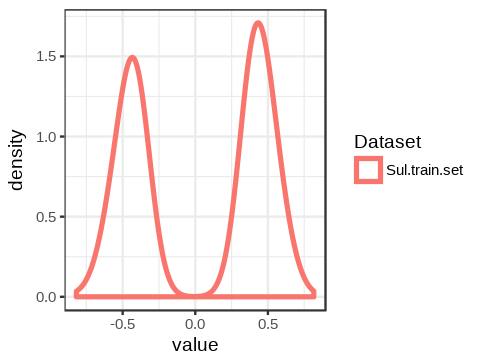

In [16]:
gene.keys = opt.Sul.only.vars
names(gene.keys) = opt.Sul.only.vars

class = ifelse(time.period.from.exposure=="late", 1, 0)
names(class) = rownames(Sul.exprs.meta)

Sul.data = list(class, t(Sul.exprs.meta), gene.keys, Sul.pheno.6mo.train, "Sul.train.set")
names(Sul.data) = c("class","expr","keys","pheno","formattedName")


Sul.Meta = list(Sul.data)
names(Sul.Meta) = c(Sul.data$formattedName)

Meta = list()
Meta$originalData = Sul.Meta


Meta = runMetaAnalysis(Meta)

Meta = filterGenes(Meta, FDRThresh=1.0)

In [17]:
# I think 1.04 was the forward threshold, I'll have to do it again though to confirm
forwardRes.big = forwardSearch(Meta, Meta$filterResults[[1]], forwardThresh=1.04)
forwardRes.big

Converting probes:genes for gene list for all discovery GEMs.   done. 
next best= 83.81841 
Adding  ZNF608 83.81841 
next best= 5.757152 
Adding  ZNF69 89.57556 
next best= 4.183769 
Adding  PYURF 93.75933 
next best= 4.791667 
Adding  APLF 98.551 
next best= 3.146766 
Adding  TLCD2 101.6978 
next best= 2.503109 
Adding  TUBGCP4 104.2009 
next best= 1.037002 

Final discovery AUCs from forward search genes:
Sul.train.set 0.906 
mean AUC: 0.906 


$posGeneNames
[1] "ZNF69"   "PYURF"   "TUBGCP4"

$negGeneNames
[1] "ZNF608" "APLF"   "TLCD2" 

$effectSizeThresh
[1] 0

$FDRThresh
[1] 1

$numberStudiesThresh
[1] 1

$heterogeneityPvalThresh
[1] 0

$isLeaveOneOut
[1] FALSE

$filterDescription
[1] "MetaFilter from version 1.0. Forward search with forwardThresh=1.04"

$timestamp
[1] "2019-10-22 11:44:56 CDT"


### Use 6 gene signature to predict time since exposure in GC6-74 test set, and Adolescent Acquisition Cohort. Test its abillity to predict risk of TB in GC6-74 and ACS cohorts.

[1] "This is the AUC:"
Area under the curve: 0.8635
[1] "This is the AUC p-value:"
[1] 1.710173e-11
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.7968-0.9302 (DeLong)
[1] "This is the AUC:"
Area under the curve: 0.6792
[1] "This is the AUC p-value:"
[1] 0.0054721
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.5512-0.8071 (DeLong)


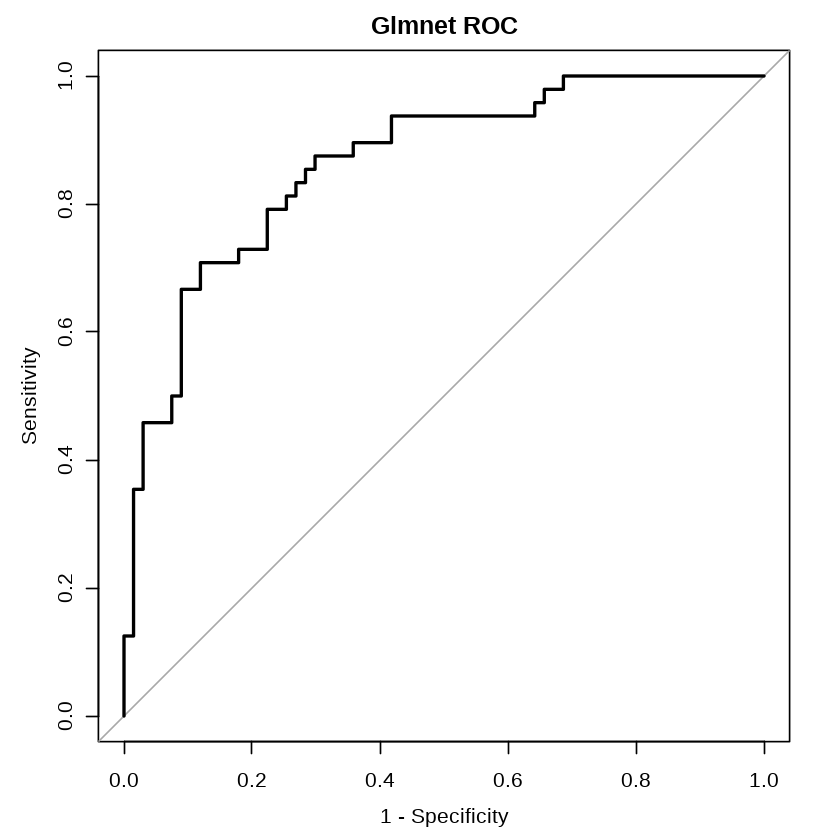

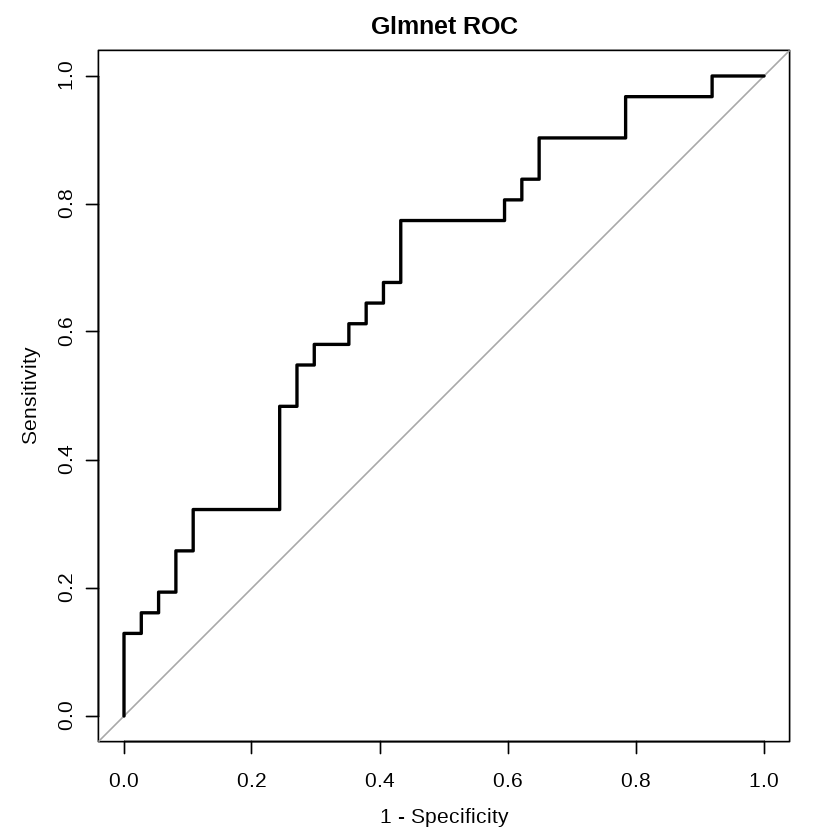

In [14]:
Sul.exprs.meta.scores= calculateScore(Sul.exprs.train, posGenes, negGenes)


Sul.train.ROC.score <- my.roc(Sul.exprs.meta.scores,
                        time.period.from.exposure,
                     "late", title="Glmnet ROC")

Sul.exprs.test.scores = calculateScore(Sul.exprs.test, posGenes, negGenes)

Sul.test.ROC.score <- my.roc(Sul.exprs.test.scores,
                        test.time.period.from.exposure,
                     "late", title="Glmnet ROC")

In [45]:
ado.exprs.scores = calculateScore(ado.exprs.log, posGenes, negGenes)
ado.pheno$scores = ado.exprs.scores

In [48]:
summary(ado.pheno)

    draw.day     latent.tb.status.at.blood.draw        patientid 
 Min.   :180.0   Mode :logical                  ID#: 04/1154: 4  
 1st Qu.:180.0   FALSE:24                       ID#: 07/0675: 4  
 Median :360.0   TRUE :58                       ID#: 04/0017: 3  
 Mean   :403.9                                  ID#: 04/0041: 3  
 3rd Qu.:540.0                                  ID#: 04/0693: 3  
 Max.   :720.0                                  ID#: 04/0702: 3  
                                                (Other)     :62  
 relative.time.from.conversion.days time.of.conversion.days   tissue  
 Min.   :-360.000                   Min.   :180.0           blood:82  
 1st Qu.:-180.000                   1st Qu.:180.0                     
 Median :   0.000                   Median :450.0                     
 Mean   :   2.195                   Mean   :401.7                     
 3rd Qu.: 180.000                   3rd Qu.:540.0                     
 Max.   : 360.000                   Max.   :54

In [161]:
table(ado.pheno$relative.time.from.conversion.days)
ado.pheno$scores[ado.pheno$relative.time.from.conversion.days == 360]


-360 -180    0  180  360 
   7   17   27   30    1 

[1] 0.4736985

In [57]:
ado.pheno.ex = dplyr::filter(ado.pheno, relative.time.from.conversion.days < 360)

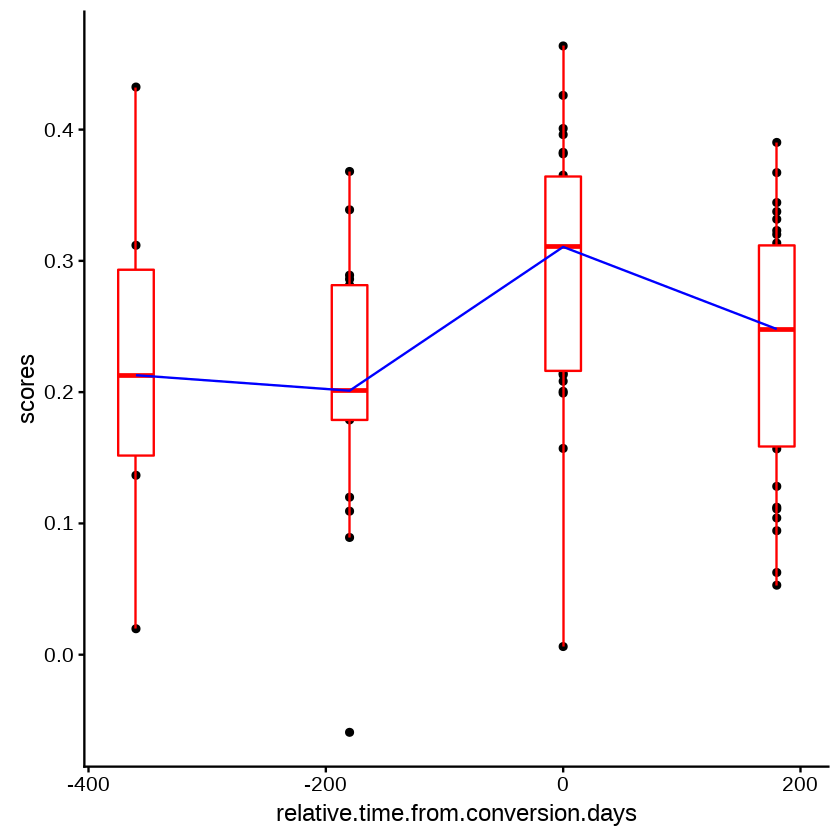

In [59]:
ado.long.plot = ggplot(ado.pheno.ex, aes(x=relative.time.from.conversion.days, y=scores)) + 
geom_point() + 
        geom_boxplot(aes(x=relative.time.from.conversion.days, y=scores, group=relative.time.from.conversion.days), outlier.shape=NA, colour = "red", fill="white", width=30) +
stat_summary(aes(y = scores,group=1), fun.y=median, colour="blue", geom="line",group=1)

ado.long.plot

[1] "This is the AUC:"
Area under the curve: 0.7222
[1] "This is the AUC p-value:"
[1] 0.003014451
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.5794-0.8651 (DeLong)
[1] "This is the AUC:"
Area under the curve: 0.6822
[1] "This is the AUC p-value:"
[1] 0.003859619
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.5586-0.8057 (DeLong)


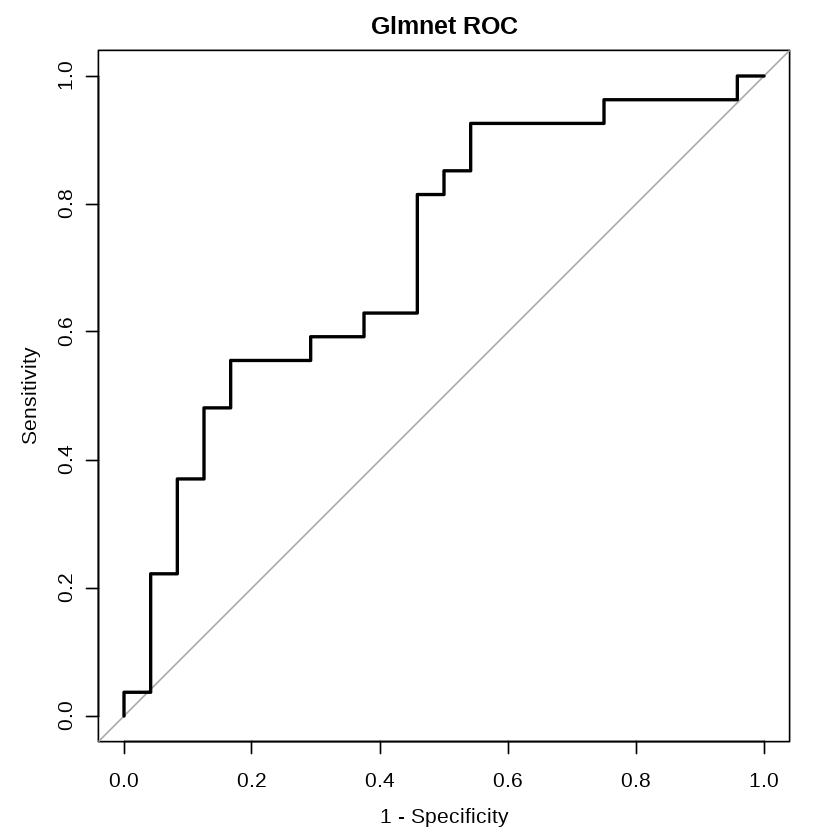

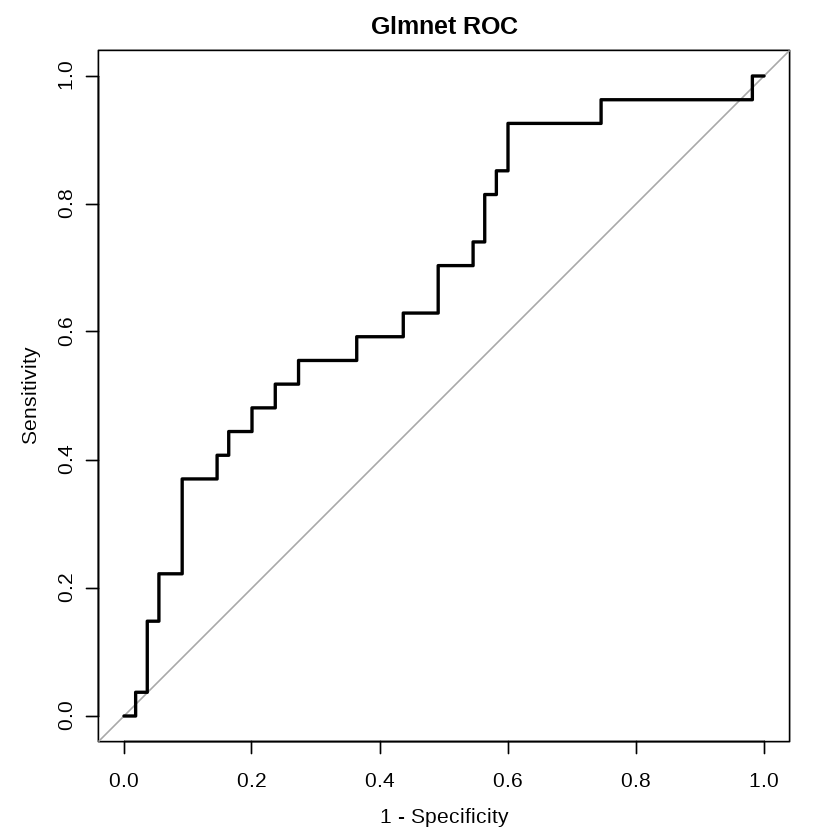

In [61]:
ado.pheno.preinfect = dplyr::filter(ado.pheno, relative.time.from.conversion.days %in% c(-360, -180,0))
ado.pheno.preinfect$relative.time.from.conversion.days = as.factor(ifelse(ado.pheno.preinfect$relative.time.from.conversion.days==0, "conversion", "pre-conversion"))

ado.val.pre.infect <- my.roc(ado.pheno.preinfect$scores,
                        ado.pheno.preinfect$relative.time.from.conversion.days,
                     "conversion", title="Glmnet ROC")

ado.pheno.vsall = dplyr::filter(ado.pheno, relative.time.from.conversion.days %in% c(-360, -180,0, 180, 360))
ado.pheno.vsall$relative.time.from.conversion.days = as.factor(ifelse(ado.pheno.vsall$relative.time.from.conversion.days==0, "recent", "remote"))

ado.val.vs.all<- my.roc(ado.pheno.vsall$scores,
                        ado.pheno.vsall$relative.time.from.conversion.days,
                     "recent", title="Glmnet ROC")

In [145]:
table(ado.pheno.preinfect$time.of.conver)
summary(ado.pheno.preinfect)

table(ado.pheno.vsall$time.of.conver)
summary(ado.pheno.vsall)


180 360 540 
  9  14  28 

    draw.day     latent.tb.status.at.blood.draw        patientid 
 Min.   :180.0   Mode :logical                  ID#: 04/1154: 3  
 1st Qu.:180.0   FALSE:24                       ID#: 07/0675: 3  
 Median :360.0   TRUE :27                       ID#: 04/0017: 2  
 Mean   :317.6                                  ID#: 04/0041: 2  
 3rd Qu.:360.0                                  ID#: 04/0693: 2  
 Max.   :540.0                                  ID#: 04/0702: 2  
                                                (Other)     :37  
 relative.time.from.conversion.days time.of.conversion.days   tissue  
 conversion    :27                  Min.   :180.0           blood:51  
 pre-conversion:24                  1st Qu.:360.0                     
                                    Median :540.0                     
                                    Mean   :427.1                     
                                    3rd Qu.:540.0                     
                                    Max.   :54


180 360 540 
 22  19  41 

    draw.day     latent.tb.status.at.blood.draw        patientid 
 Min.   :180.0   Mode :logical                  ID#: 04/1154: 4  
 1st Qu.:180.0   FALSE:24                       ID#: 07/0675: 4  
 Median :360.0   TRUE :58                       ID#: 04/0017: 3  
 Mean   :403.9                                  ID#: 04/0041: 3  
 3rd Qu.:540.0                                  ID#: 04/0693: 3  
 Max.   :720.0                                  ID#: 04/0702: 3  
                                                (Other)     :62  
 relative.time.from.conversion.days time.of.conversion.days   tissue  
 recent:27                          Min.   :180.0           blood:82  
 remote:55                          1st Qu.:180.0                     
                                    Median :450.0                     
                                    Mean   :401.7                     
                                    3rd Qu.:540.0                     
                                    Max.   :54

[1] "This is the AUC:"
Area under the curve: 0.6289
[1] "This is the AUC p-value:"
[1] 0.09510112
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.4595-0.7984 (DeLong)
[1] "This is the AUC:"
Area under the curve: 0.5135
[1] "This is the AUC p-value:"
[1] 0.6027293
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.3977-0.6294 (DeLong)


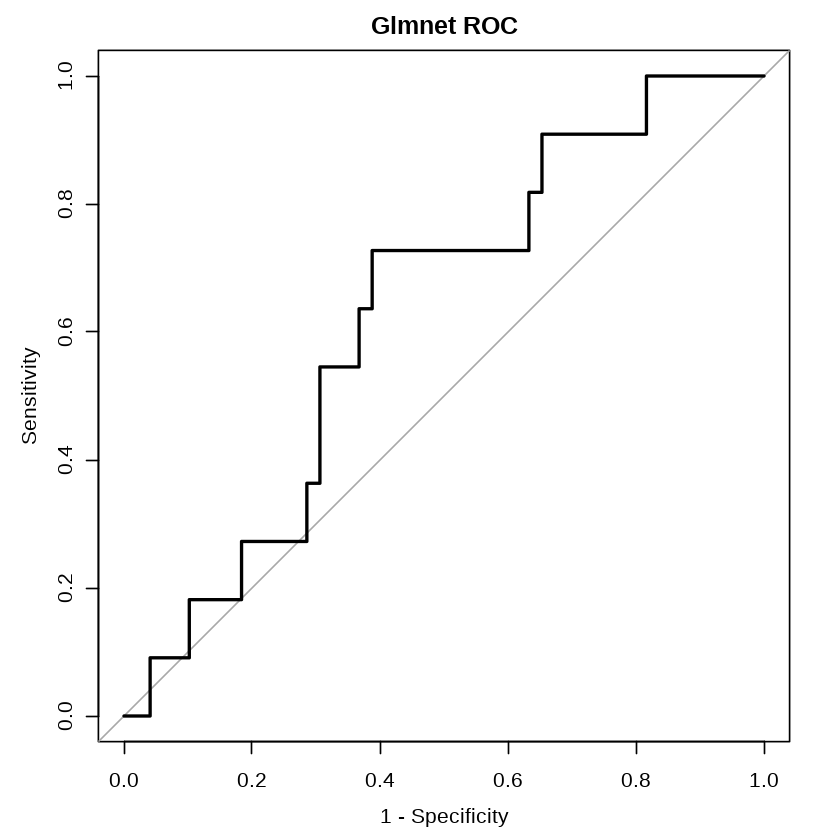

[1] "This is the AUC:"
Area under the curve: 0.548
[1] "This is the AUC p-value:"
[1] 0.7812002
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.434-0.6619 (DeLong)


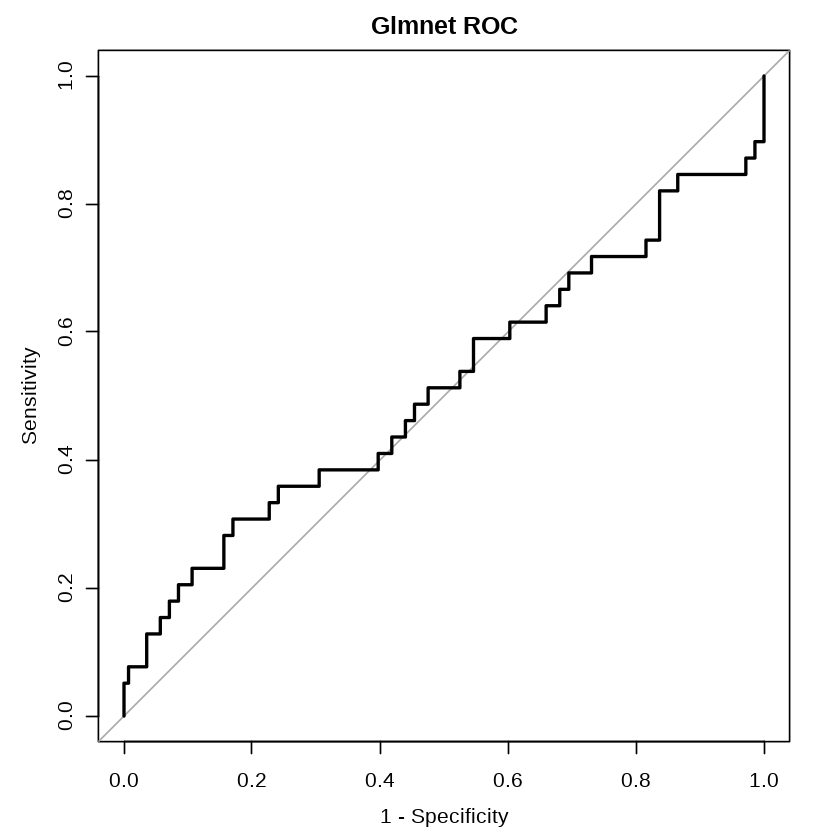

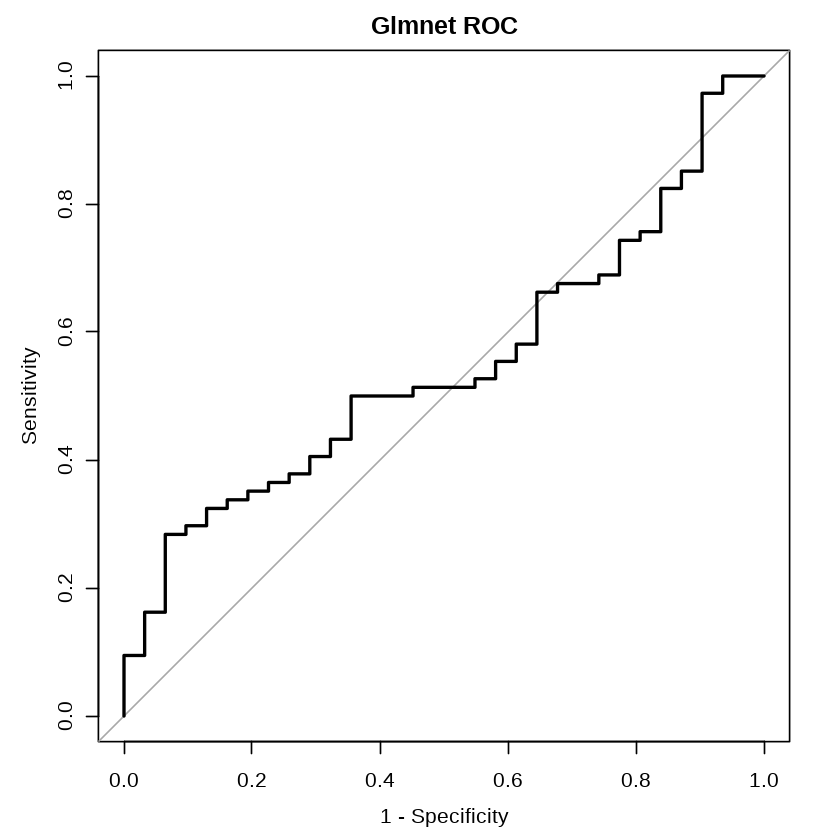

In [38]:
test.scores = calculateScore(Sul.exprs.log.test, posGenes, negGenes)
SUN.scores = calculateScore(Sul.exprs.log.SUN, posGenes, negGenes)
ACS.scores = calculateScore(ACS.exprs.subj, posGenes, negGenes)

test.max = tapply(test.scores, Sul.pheno.risk.test$subjectid, max)

test.dis = Sul.pheno.risk.test[!duplicated(Sul.pheno.risk.test[,c('subjectid')]),]

test.dis = test.dis[match(names(test.max),test.dis$subjectid),]
test.dis$score = test.max

Sul.test.ROC.risk.score <- my.roc(test.dis$score,
                        test.dis$group,
                     "progressor", title="Glmnet ROC")

SUN.max = tapply(SUN.scores, Sul.pheno.risk.SUN$subjectid,max)

SUN.dis = Sul.pheno.risk.SUN[!duplicated(Sul.pheno.risk.SUN[,c('subjectid')]),]

SUN.dis = SUN.dis[match(names(SUN.max),SUN.dis$subjectid),]
SUN.dis$score = SUN.max

Sul.SUN.ROC.risk.score <- my.roc(SUN.dis$score,
                        SUN.dis$group,
                     "progressor", title="Glmnet ROC")



ACS.max = tapply(ACS.scores, ACS.pheno.subj$subjectid, max)

ACS.dis = ACS.pheno.subj[!duplicated(ACS.pheno.subj[,c('subjectid')]),]

ACS.dis = ACS.dis[match(names(ACS.max),ACS.dis$subjectid),]
ACS.dis$score = ACS.max

Sul.ACS.ROC.risk.score <- my.roc(ACS.dis$score,
                        ACS.dis$group,
                     "control", title="Glmnet ROC")

In [152]:
table(test.dis$group)
table(SUN.dis$group)


   control progressor 
        49         11 


   control progressor 
       141         39 

In [150]:
length(unique(ACS.dis$subjectid))
dim(ACS.dis)
table(ACS.dis$group)
summary(ACS.dis)

[1] 105

[1] 105  11


   control progressor 
        74         31 

                                           title         age       
 Non-progressor (01_0934D020uL01_0934_L1.LB1) : 1   Min.   :12.00  
 Non-progressor (01_0940D030uL01_0940_L6.LB10): 1   1st Qu.:14.00  
 Non-progressor (030697PAXGENEDAY0_L2.LB11)   : 1   Median :16.00  
 Non-progressor (030711PAXGENEDAY0_L4.LB23)   : 1   Mean   :15.42  
 Non-progressor (030714PAXGENEDAY0_L3.LB21)   : 1   3rd Qu.:17.00  
 Non-progressor (04_0699D025uL04_0699_L3.LB6) : 1   Max.   :18.00  
 (Other)                                      :99                  
      bin        gender      ethnicity  previous.diagnosis.of.tb
 17     :19   female:72   black   : 7   n:94                    
 6      : 9   male  :33   coloured:98   y:11                    
 13     : 6                                                     
 16     : 6                                                     
 21     : 6                                                     
 25     : 6                                                     
 

In [73]:
human = useMart("ensembl", dataset = "hsapiens_gene_ensembl")
mouse = useMart("ensembl", dataset = "mmusculus_gene_ensembl")

HGNC.symbol MGI.symbol ILLUMINA.MouseWG.6.V2.probe
1  PYURF       Pyurf      ILMN_2521182               
2  PYURF       Pyurf      ILMN_2629610               
3  TRIM7       Trim7      ILMN_1254904               
4  TRIM7       Trim7                                 
5  TRIM7       Trim7      ILMN_1258293               
6  BEAN1       Bean1      ILMN_2698221               
7  ZNF608      Zfp608     ILMN_1243263               
8  ZNF608      Zfp608     ILMN_2559976               
9  ZNF608      Zfp608     ILMN_2939367               
10 ZNF608      Zfp608                                
11 TUBGCP4     Tubgcp4    ILMN_1257622               
12 TUBGCP4     Tubgcp4                               
13 TUBGCP4     Tubgcp4    ILMN_2548458               
14 TUBGCP4     Tubgcp4    ILMN_1255751

HGNC.symbol MGI.symbol ILLUMINA.MouseWG.6.V2.probe
1 TRIM7       Trim7      ILMN_1258293               
2 BEAN1       Bean1      ILMN_2698221               
3 ZNF608      Zfp608     ILMN_1243263               
4 ZNF608      Zfp608     ILMN_2939367               
5 TUBGCP4     Tubgcp4    ILMN_1257622               
6 TUBGCP4     Tubgcp4    ILMN_2548458

[1] "This is the AUC:"
Area under the curve: 0.8021
[1] "This is the AUC p-value:"
[1] 0.01262205
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.6043-0.9999 (DeLong)


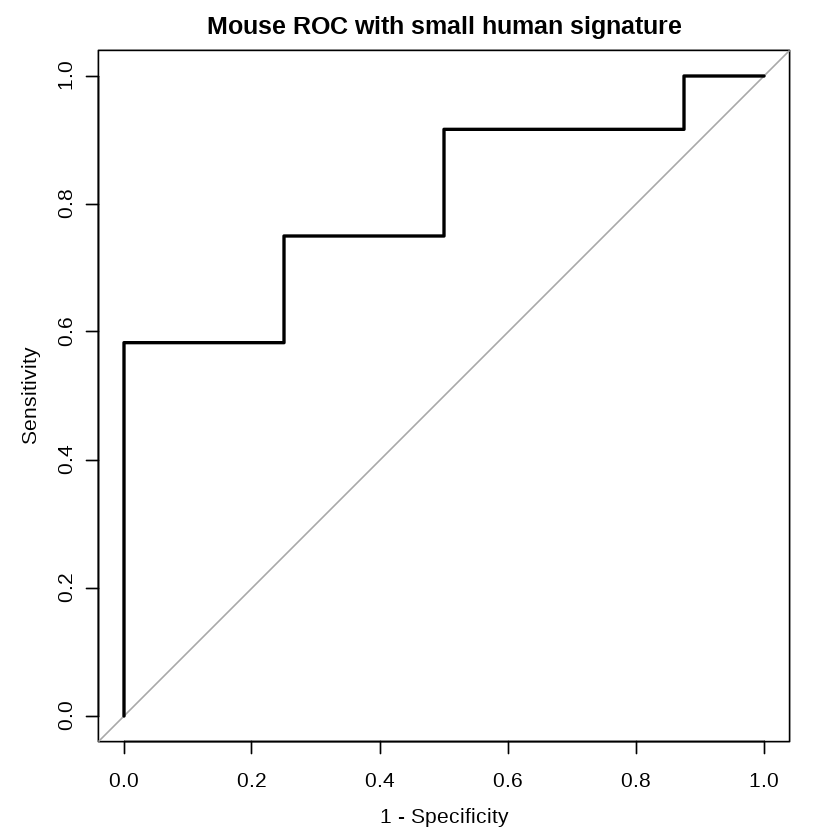

In [74]:
human.to.mouse = getLDS(attributes = c("hgnc_symbol"),
          filters = c("hgnc_symbol"),
          values = c(posGenes, negGenes), mart = human,
          attributesL = c('mgi_symbol', "illumina_mousewg_6_v2"),
          martL=mouse)

human.to.mouse

human.to.mouse = dplyr::filter(human.to.mouse, ILLUMINA.MouseWG.6.V2.probe != '')

mouse.tb.human = mouse.tb[,colnames(mouse.tb) %in% human.to.mouse$ILLUMINA.MouseWG.6.V2.probe]

dplyr::filter(human.to.mouse,ILLUMINA.MouseWG.6.V2.probe %in% colnames(mouse.tb.human) )

mouse.sign = data.frame(TRIM7 = mouse.tb.human$ILMN_1258293,
                       BEAN1 = mouse.tb.human$ILMN_2698221,
                       ZNF608 = log2(rowMeans(cbind(2^mouse.tb.human$ILMN_1243263, 2^mouse.tb.human$ILMN_2939367), na.rm=TRUE)),
                       TUBGCP4 = log2(rowMeans(cbind(2^mouse.tb.human$ILMN_1257622, 2^mouse.tb.human$ILMN_2548458), na.rm=TRUE)))
rownames(mouse.sign) = row.names(mouse.tb)

mouse.human.ROC <- my.roc(calculateScore(mouse.sign, posGenes, negGenes),
                        pheno.data$stage,
                     "late", title="Mouse ROC with small human signature")

In [153]:
dim(mouse.sign)

[1] 20  4

In [155]:
dim(pheno.data)

[1] 20  6

In [157]:
table(pheno.data$stage)


early  late 
    8    12 

In [158]:
summary(pheno)

     title          ChIP      hyb.chamber      dataset    synchroset
 M1_120 :  1   2      : 11   5      : 32   Test    :147   No :256   
 M1_150 :  1   20     : 11   9      : 32   Training:147   Yes: 38   
 M1_180 :  1   24     : 10   1      : 31                            
 M1_20  :  1   14     :  9   4      : 31                            
 M1_30  :  1   7      :  9   2      : 28                            
 M1_42  :  1   15     :  8   8      : 28                            
 (Other):288   (Other):236   (Other):112                            
    monkeyid     time.point     infection.time clinical.status  description 
 M1     :  8   Min.   : 20.00   D20    :38     Active:118      M1_120 :  1  
 M11    :  8   1st Qu.: 30.00   D42    :38     Latent:176      M1_150 :  1  
 M12    :  8   Median : 56.00   D56    :38                     M1_180 :  1  
 M13    :  8   Mean   : 83.93   M3     :38                     M1_20  :  1  
 M14    :  8   3rd Qu.:120.00   D30    :37                     

In [156]:
summary(pheno.data)

     strain   infection.status time.point.days         tissue      gender  
 C57BL/6:20   Mtb:20           Min.   : 30     Whole Blood:20   female:20  
                               1st Qu.: 60                                 
                               Median : 90                                 
                               Mean   : 90                                 
                               3rd Qu.:120                                 
                               Max.   :150                                 
    stage          
 Length:20         
 Class :character  
 Mode  :character  
                   
                   
                   

hgnc_symbol illumina_humanht_12_v4
1 PYURF       ILMN_1672366

[1] 1

[1] 1

NULL

[1] "ILMN_2055271" "ILMN_1755321" "ILMN_1814092" "ILMN_2061446" "ILMN_3237396"
[6] "ILMN_1688755"

[1] "This is the AUC:"
Area under the curve: 0.5175
[1] "This is the AUC p-value:"
[1] 0.6985346
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.451-0.584 (DeLong)


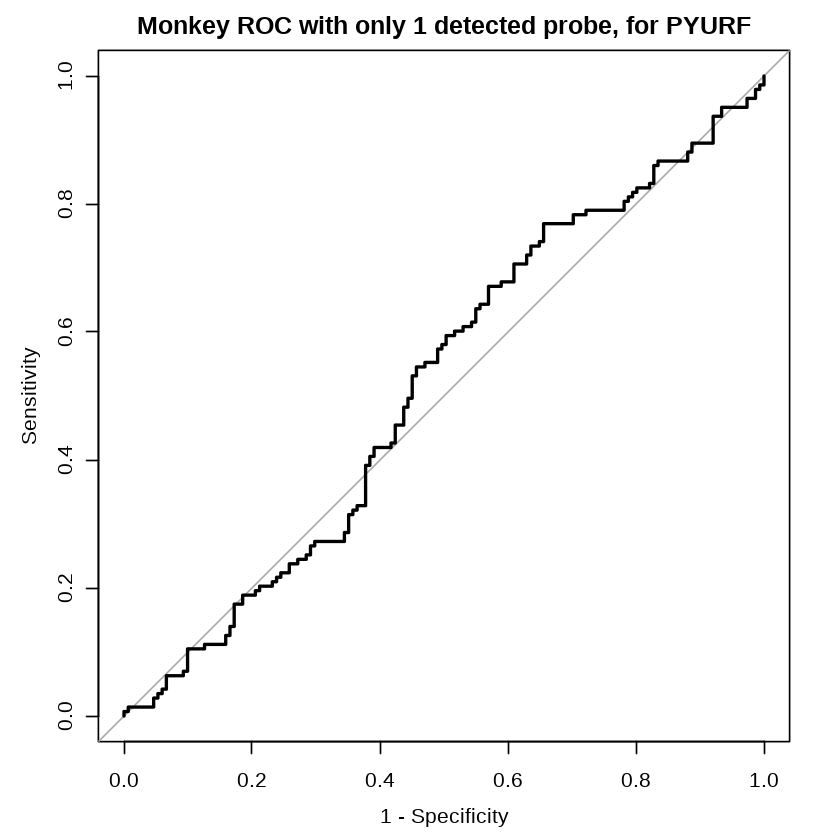

In [75]:
human.to.monkey = getBM(attributes = c("hgnc_symbol", "illumina_humanht_12_v4"),
                        filters="hgnc_symbol",
                        values = c(posGenes, negGenes), mart = human)

human.to.monkey = dplyr::filter(human.to.monkey, illumina_humanht_12_v4!='', illumina_humanht_12_v4 %in% colnames(expres))
human.to.monkey

sum(human.to.monkey$illumina_humanht_12_v4 %in% colnames(expres))
sum(human.to.monkey$illumina_humanht_12_v4 %in% featureNames(monkey.gset))

monkey.expres = data.frame(expres)

dim(colnames(expres))

head(colnames(expres))

monkey.human.ROC <- my.roc(monkey.expres$ILMN_1672366,
                        pheno$time.period,
                     "late", title="Monkey ROC with only 1 detected probe, for PYURF")

### Figure 5A

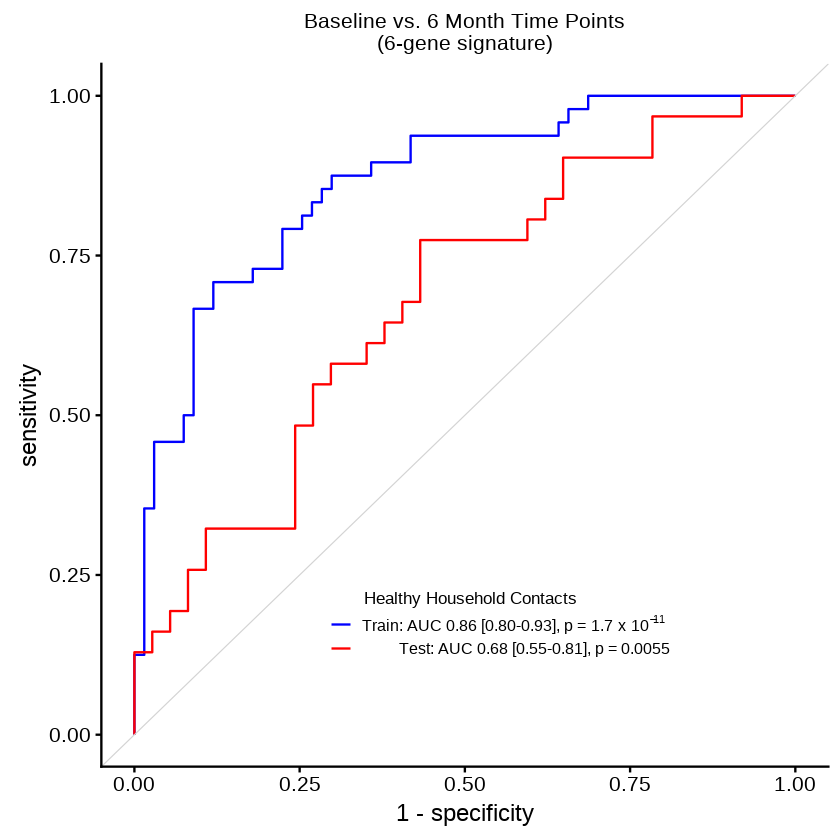

In [128]:
human.exposure.plot.6genes = ggroc(list(CV=Sul.train.ROC.score, 
                                           test=Sul.test.ROC.score), 
                                      legacy.axes=TRUE) +
                geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.25) + 
                ggtitle("Baseline vs. 6 Month Time Points\n(6-gene signature)") + theme(plot.title = element_text(size=12, face="plain")) +
                scale_color_manual(name="       Healthy Household Contacts",
                                  labels=c("CV" =expression("Train: AUC 0.86 [0.80-0.93], p ="~1.7~ "x" ~10^{-11} ~ ""),
                                           "test"=expression("Test: AUC 0.68 [0.55-0.81], p = 0.0055")),
                                  values=c("CV"="blue", "test"="red")) +
            theme(legend.position=c(0.30,0.20), legend.title = element_text(size=10), legend.text = element_text(size=9)) 
human.exposure.plot.6genes 

### Figure S5

In [141]:
dim(ado.exprs.log)
sum(colnames(ado.exprs.log) %in% c(posGenes, negGenes))
colnames(ado.exprs.log)[colnames(ado.exprs.log) %in% c(posGenes, negGenes)]

[1]    82 17875

[1] 3

[1] "TRIM7"   "ZNF608"  "TUBGCP4"

png 
  2

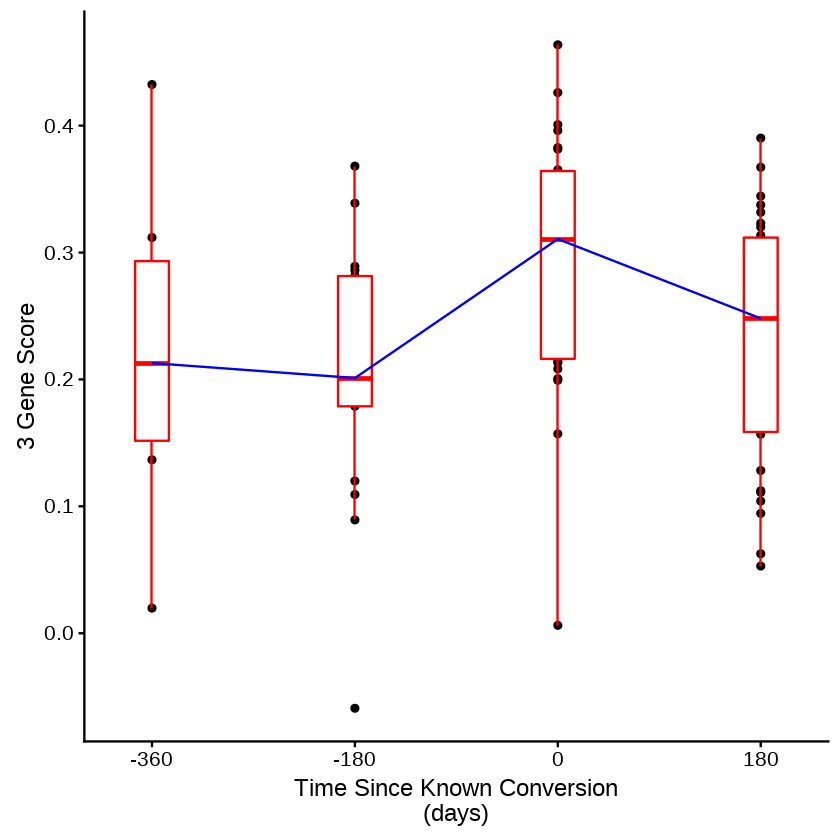

In [159]:
break_points = c(-360, -180, 0, 180)

ado.S3 = ggplot(ado.pheno.ex, aes(x=relative.time.from.conversion.days, y=scores)) + 
geom_point() + 
        geom_boxplot(aes(x=relative.time.from.conversion.days, y=scores, group=relative.time.from.conversion.days), outlier.shape=NA, colour = "red", fill="white", width=30) +
stat_summary(aes(y = scores,group=1), fun.y=median, colour="blue", geom="line",group=1) +
labs(x="Time Since Known Conversion\n(days)", y="3 Gene Score") +


        scale_x_continuous(breaks=break_points, limits = c(min(break_points)-30, max(break_points)+30))
ado.S3

pdf("paper_figures/FigureS3_2ndresubmission.pdf")
ado.S3
dev.off()

### Figure 5B

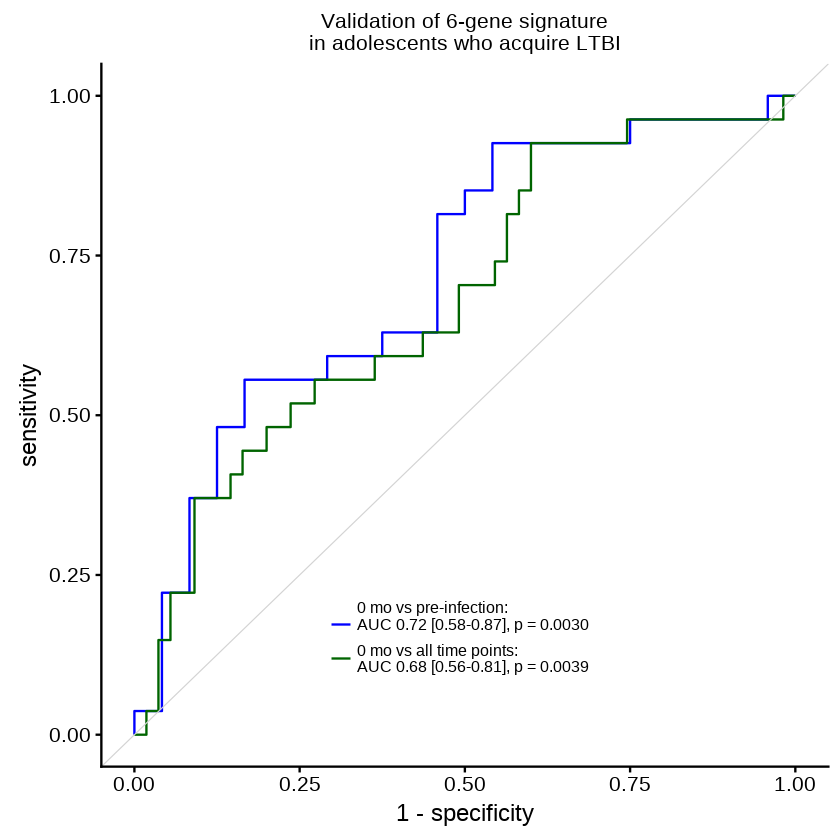

In [129]:
ado.validation.plot = ggroc(list(pre.infect=ado.val.pre.infect, 
                                           vs.all=ado.val.vs.all), 
                                      legacy.axes=TRUE) +
                geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.25) + 
                ggtitle("Validation of 6-gene signature\nin adolescents who acquire LTBI") + theme(plot.title = element_text(size=12, face="plain")) +
                scale_color_manual(name="",
                                  labels=c("pre.infect" ="0 mo vs pre-infection:\nAUC 0.72 [0.58-0.87], p = 0.0030\n",
                                           "vs.all"="0 mo vs all time points:\nAUC 0.68 [0.56-0.81], p = 0.0039"),
                                  values=c("pre.infect"="blue", "vs.all"="darkgreen")) +
            theme(legend.position=c(0.30,0.20), legend.title = element_text(size=12), legend.text = element_text(size=9))#,

ado.validation.plot

### Figure 5C

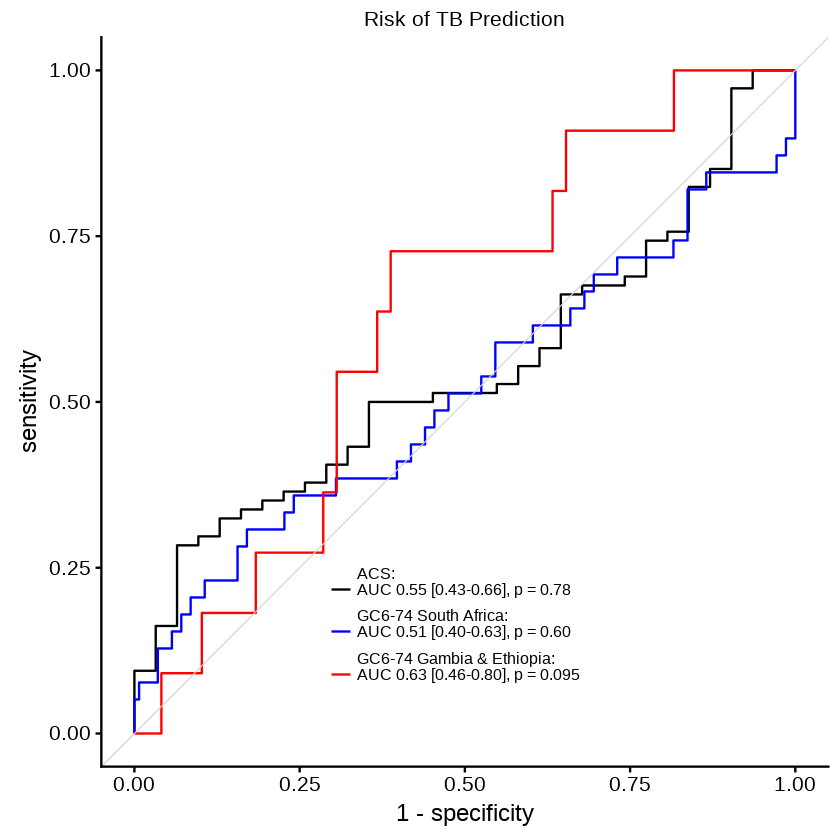

In [130]:
human.recentexposure.risk.plot = ggroc(list(test=Sul.test.ROC.risk.score, 
                                           SUN=Sul.SUN.ROC.risk.score,
                                            ACS=Sul.ACS.ROC.risk.score), 
                                      legacy.axes=TRUE) +
                geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.25) + 
                ggtitle("Risk of TB Prediction") + theme(plot.title = element_text(size=12, face="plain")) +
                scale_color_manual(name="", 
                                  labels=c("test" ="GC6-74 Gambia & Ethiopia:\nAUC 0.63 [0.46-0.80], p = 0.095\n",
                                           "SUN"="GC6-74 South Africa:\nAUC 0.51 [0.40-0.63], p = 0.60\n",
                                           "ACS"="ACS:\nAUC 0.55 [0.43-0.66], p = 0.78\n"),
                                  values=c("test"="red", "SUN"="blue", "ACS"="black")) +
            theme(legend.position=c(0.30,0.20), legend.title = element_text(size=12), legend.text = element_text(size=9))  
human.recentexposure.risk.plot

### Figure 5D

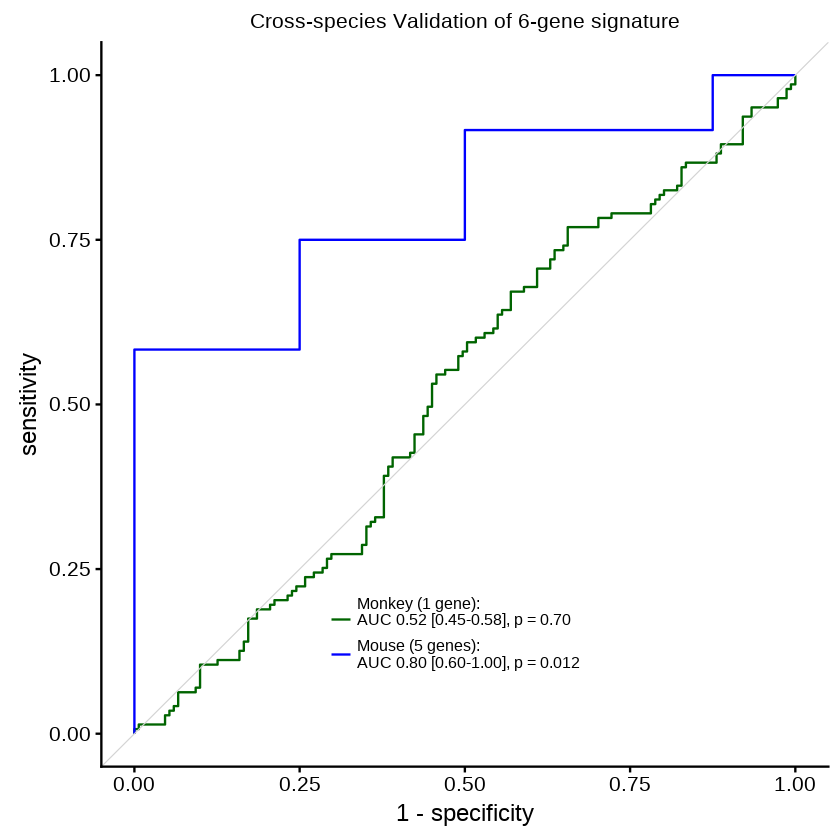

In [131]:
mouse.monkey.plot = ggroc(list(mouse=mouse.human.ROC, 
                                           monkey=monkey.human.ROC), 
                                      legacy.axes=TRUE) +
                geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.25) + 
                ggtitle("Cross-species Validation of 6-gene signature") + theme(plot.title = element_text(size=12, face="plain")) +
                scale_color_manual(name="",
                                  labels=c("mouse" ="Mouse (5 genes):\nAUC 0.80 [0.60-1.00], p = 0.012",
                                           "monkey"="Monkey (1 gene):\nAUC 0.52 [0.45-0.58], p = 0.70\n"),
                                  values=c("mouse"="blue", "monkey"="darkgreen")) +
            theme(legend.position=c(0.30,0.20), legend.title = element_text(size=12), legend.text = element_text(size=9))#,

mouse.monkey.plot

### Plot all main figures in Figure 5

In [132]:
Figure.5 = plot_grid(human.exposure.plot.6genes , ado.validation.plot, human.recentexposure.risk.plot, mouse.monkey.plot,
                    labels=toupper(c(letters[1:4], align="h")), ncol=2)


figures.dir = "paper_figures/"
save_plot(paste(figures.dir, "TSI_paper_Figure5_2ndresubmission_validation.pdf", sep="/"), Figure.5, ncol=2, nrow=2)


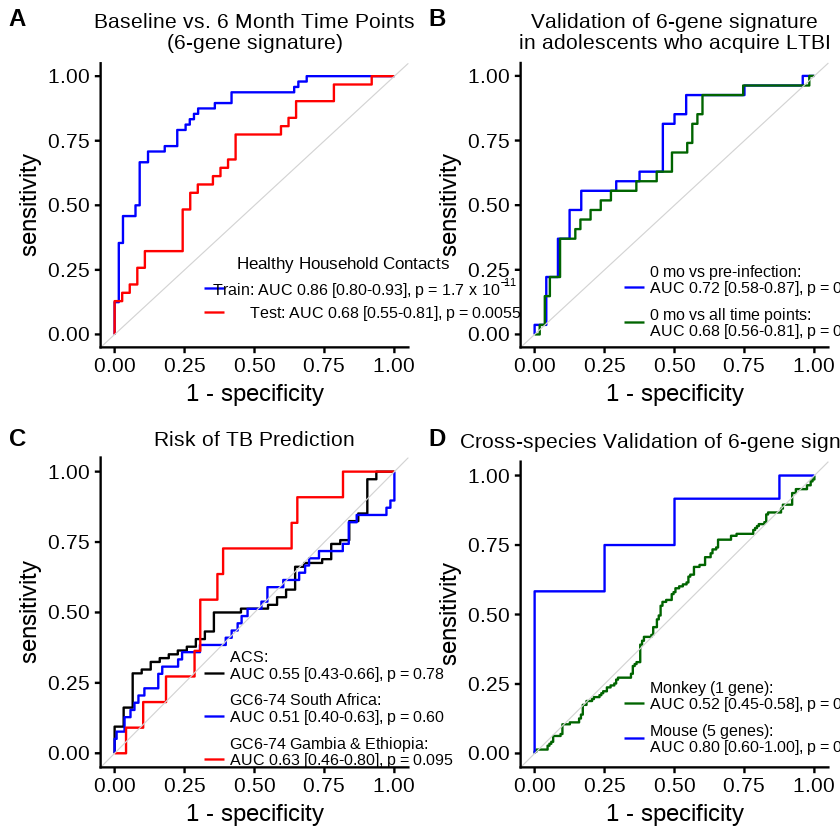

In [133]:
Figure.5